# **1ª ETAPA**

## **Definição do contexto e levantamento de dados**

## 1.1 - Carregamento e Limpeza dos Dados
Esta é a etapa mais crucial do processo, conhecida como pré-processamento. Dados "crus" raramente estão prontos para análise. Aqui, primeiro carregamos o arquivo CSV para dentro de um DataFrame do pandas. Em seguida, realizamos uma sequência de limpezas: removemos colunas que não são relevantes para a nossa análise (como latitude e longitude), corrigimos os tipos de dados (transformando textos de data e hora em formatos que o Python entende), e tratamos inconsistências, como a vírgula no lugar do ponto na coluna km. Finalmente, removemos linhas que contenham valores ausentes em colunas essenciais ou que estejam duplicadas, garantindo a qualidade e a integridade dos dados que serão analisados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# **1ª ETAPA**
# Definição do contexto e levantamento de dados

# Importação das bibliotecas necessárias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montagem do Google Drive
drive.mount('/content/drive')

# Configurações iniciais
sns.set(style="whitegrid")
pd.options.display.float_format = '{:,.2f}'.format

# Caminho do arquivo de dados
base_path = '/content/drive/MyDrive/Dataset/'
file_name = 'datatran2012a2025(datatran2012a2025).csv'
file_path = os.path.join(base_path, file_name)

# Carregamento do dataset
df_cleaned = pd.read_csv(file_path, sep=';', encoding='latin-1', low_memory=False)

# Exibição das primeiras linhas
print("Visualização inicial dos dados:")
display(df_cleaned.head())

# Informações gerais sobre o DataFrame:")
df_cleaned.info()

# Verificação de valores ausentes
print("\nValores ausentes por coluna:")
print(df_cleaned.isnull().sum())

# Estatísticas descritivas iniciais
print("\nEstatísticas descritivas:")
display(df_cleaned.describe())

# Padronização de nomes de colunas
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Remoção de colunas irrelevantes (exemplo, ajustar conforme análise)
colunas_remover = ['unnamed:_0']  # ajustar conforme o dataset real
df_cleaned = df_cleaned.drop(columns=[col for col in colunas_remover if col in df_cleaned.columns])

# Remoção de duplicatas
df_cleaned = df_cleaned.drop_duplicates()

# Tratamento genérico de valores ausentes (exemplo, ajustar conforme a análise)
df_cleaned = df_cleaned.fillna({'bairro': 'Não informado', 'causa_acidente': 'Desconhecida'})

# Verificação final após limpeza
print("\nApós limpeza:")
print(f"Linhas: {df_cleaned.shape[0]} | Colunas: {df_cleaned.shape[1]}")
display(df_cleaned.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Visualização inicial dos dados:


id data_inversa    dia_semana   horario  uf   br     km municipio  \
0  260073   01/01/2020  quarta-feira       NaN  MG  262    804   UBERABA   
1  260129   01/01/2020  quarta-feira  12:10:00  MG  262  380,9   JUATUBA   
2  260202   01/01/2020  quarta-feira  15:55:00  MG    0      0    SABARA   
3  260225   01/01/2020  quarta-feira  19:20:00  MG  381  667,5   PERDOES   
4  260229   01/01/2020  quarta-feira  18:00:00  MG  262    548       LUZ   

                causa_acidente              tipo_acidente  ... ilesos  \
0  Falta de Atenção à Condução        Colisão transversal  ...      3   
1            Condutor Dormindo  Saída de leito carroçável  ...      0   
2  Defeito Mecânico no Veículo                 Tombamento  ...      0   
3  Falta de Atenção à Condução           Colisão traseira  ...      1   
4      Velocidade Incompatível                 Tombamento  ...      0   

  ignorados feridos veiculos      latitude     longitude regional  delegacia  \
0         0       1        2  -19,76747537  -47,98725511  SPRF-MG   DEL13-MG   
1         1       1        2    -19,947864    -44,381226  SPRF-MG   DEL01-MG   
2         1       1        2  -19,78607788  -43,71630549  SPRF-MG   DEL01-MG   
3         1       0        2  -21,05312771  -45,01951404  SPRF-MG   DEL04-MG   
4         1       1        3  -19,73163489   -45,8631039  SPRF-MG   DEL08-MG   

              uop  ano  
0  UOP01-DEL13-MG  NaN  
1  UOP03-DEL01-MG  NaN  
2  UOP01-DEL01-MG  NaN  
3  UOP02-DEL04-MG  NaN  
4  UOP02-DEL08-MG  NaN  

[5 rows x 31 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184236 entries, 0 to 184235
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      184236 non-null  int64  
 1   data_inversa            184236 non-null  object 
 2   dia_semana              184236 non-null  object 
 3   horario                 184235 non-null  object 
 4   uf                      184236 non-null  object 
 5   br                      184236 non-null  int64  
 6   km                      184236 non-null  object 
 7   municipio               184236 non-null  object 
 8   causa_acidente          184236 non-null  object 
 9   tipo_acidente           184229 non-null  object 
 10  classificacao_acidente  184236 non-null  object 
 11  fase_dia                184235 non-null  object 
 12  sentido_via             184236 non-null  object 
 13  condicao_metereologica  184235 non-null  object 
 14  tipo_pista          

id         br    pessoas     mortos  feridos_leves  \
count    184,236.00 184,236.00 184,236.00 184,236.00     184,236.00   
mean  29,224,981.69     234.63       2.31       0.06           0.72   
std   39,316,017.04     144.23       2.15       0.33           1.21   
min           47.00       0.00       1.00       0.00           0.00   
25%      397,110.25      50.00       1.00       0.00           0.00   
50%    1,132,451.50     262.00       2.00       0.00           0.00   
75%   83,170,128.25     381.00       3.00       0.00           1.00   
max   83,529,881.00     767.00      82.00      37.00          58.00   

       feridos_graves     ilesos  ignorados    feridos   veiculos       ano  
count      184,236.00 184,236.00 184,236.00 184,236.00 184,236.00 90,685.00  
mean             0.22       1.12       0.21       0.94       1.75  2,013.29  
std              0.62       1.57       0.64       1.41       0.97      1.07  
min              0.00       0.00       0.00       0.00       1.00  2,012.00  
25%              0.00       0.00       0.00       0.00       1.00  2,012.00  
50%              0.00       1.00       0.00       1.00       2.00  2,013.00  
75%              0.00       2.00       0.00       1.00       2.00  2,014.00  
max             30.00      79.00      37.00      66.00      38.00  2,015.00


Após limpeza:
Linhas: 184236 | Colunas: 31


id data_inversa    dia_semana   horario  uf   br     km municipio  \
0  260073   01/01/2020  quarta-feira       NaN  MG  262    804   UBERABA   
1  260129   01/01/2020  quarta-feira  12:10:00  MG  262  380,9   JUATUBA   
2  260202   01/01/2020  quarta-feira  15:55:00  MG    0      0    SABARA   
3  260225   01/01/2020  quarta-feira  19:20:00  MG  381  667,5   PERDOES   
4  260229   01/01/2020  quarta-feira  18:00:00  MG  262    548       LUZ   

                causa_acidente              tipo_acidente  ... ilesos  \
0  Falta de Atenção à Condução        Colisão transversal  ...      3   
1            Condutor Dormindo  Saída de leito carroçável  ...      0   
2  Defeito Mecânico no Veículo                 Tombamento  ...      0   
3  Falta de Atenção à Condução           Colisão traseira  ...      1   
4      Velocidade Incompatível                 Tombamento  ...      0   

  ignorados feridos veiculos      latitude     longitude regional  delegacia  \
0         0       1        2  -19,76747537  -47,98725511  SPRF-MG   DEL13-MG   
1         1       1        2    -19,947864    -44,381226  SPRF-MG   DEL01-MG   
2         1       1        2  -19,78607788  -43,71630549  SPRF-MG   DEL01-MG   
3         1       0        2  -21,05312771  -45,01951404  SPRF-MG   DEL04-MG   
4         1       1        3  -19,73163489   -45,8631039  SPRF-MG   DEL08-MG   

              uop  ano  
0  UOP01-DEL13-MG  NaN  
1  UOP03-DEL01-MG  NaN  
2  UOP01-DEL01-MG  NaN  
3  UOP02-DEL04-MG  NaN  
4  UOP02-DEL08-MG  NaN  

[5 rows x 31 columns]

In [ ]:
##import sys

# Desinstalar e reinstalar as bibliotecas para resolver o conflito de importação circular
##!{sys.executable} -m pip uninstall patsy -y
##!{sys.executable} -m pip install patsy

##!{sys.executable} -m pip uninstall statsmodels -y
##!{sys.executable} -m pip install statsmodels

##!{sys.executable} -m pip uninstall seaborn -y
#!{sys.executable} -m pip install seaborn

#print("Bibliotecas reinstaladas. Por favor, execute novamente a célula 'hiikN76vGCp1'.")

# **2ª ETAPA**

## **Conhecendo os dados**

**Análise de Acidentes de Trânsito em Minas Gerais**
Este notebook realiza uma análise exploratória detalhada sobre os dados de acidentes de trânsito registrados pela Polícia Rodoviária Federal (PRF) em Minas Gerais. O objetivo é compreender a estrutura dos dados, identificar padrões, detectar anomalias e avaliar as relações entre as variáveis.

Vamos analisar um conjunto de dados que descreve acidentes, buscando responder a perguntas como:

* Quais são as principais causas de acidentes?

* Quais os horários, dias da semana e épocas do ano com maior incidência?

* Quais são as rodovias (BRs) e municípios mais críticos?

* Como a distribuição de vítimas e veículos se comporta, e existem casos atípicos (outliers) que merecem atenção?

* Existe correlação entre o número de veículos e a gravidade do acidente?

Esta análise constitui a etapa fundamental de preparação para o objetivo final do projeto: a construção de modelos preditivos com Inteligência Artificial para prever futuras tendências de acidentes.



In [ ]:

print(" Valores encontrados na coluna 'dia_semana':")
print(df_cleaned['dia_semana'].value_counts(dropna=False))


 Valores encontrados na coluna 'dia_semana':
dia_semana
sexta-feira      29167
segunda-feira    25412
quinta-feira     23728
quarta-feira     23285
terça-feira      22350
Domingo          16841
Sábado           16599
domingo          13617
sábado           13237
Name: count, dtype: int64


## 2.1 -  Quadro-Resumo das Variáveis do Dataset

Antes de iniciar a análise descritiva e exploratória, é essencial compreender a estrutura do conjunto de dados com o qual estamos trabalhando.  
O quadro-resumo a seguir apresenta uma visão geral de todas as variáveis disponíveis no dataset após o processo de limpeza e pré-processamento, incluindo:

- **Tipo de dado**: identifica se a variável é numérica, categórica, data/hora etc.
- **Valores preenchidos**: quantidade de registros não nulos.
- **% de valores nulos**: percentual de dados ausentes, importante para avaliar a qualidade do dataset.
- **Quantidade de valores únicos**: número de diferentes dados em cada coluna
- **Exemplo de dado**: fornece uma amostra para melhor compreensão semântica de cada coluna.

Essa análise é fundamental para identificar potenciais problemas de qualidade dos dados e apoiar decisões de engenharia de features nas etapas seguintes.


In [ ]:


print("\n Gerando o quadro-resumo do DataFrame...")


resumo_df = pd.DataFrame({
    'Tipo de Dado': [str(dtype) for dtype in df_cleaned.dtypes],
    'Valores Preenchidos': df_cleaned.count().values,
    '% Nulos': (df_cleaned.isnull().sum() * 100 / len(df_cleaned)).round(2).values,
    'Quantidade de Valores Únicos': df_cleaned.nunique().values,
    'Exemplo de Dado': [
        df_cleaned[col].dropna().iloc[0] if not df_cleaned[col].dropna().empty else None
        for col in df_cleaned.columns
    ]
}, index=df_cleaned.columns)


resumo_df = resumo_df.sort_index()


display(
    resumo_df.style
    .background_gradient(subset=['Valores Preenchidos'], cmap='Blues')
    .background_gradient(subset=['% Nulos'], cmap='Reds')
    .set_properties(**{
        'border': '1px solid #ccc',
        'text-align': 'center',
        'padding': '6px'
    })
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f2f2f2'),
                  ('color', '#000'),
                  ('font-weight', 'bold'),
                  ('text-align', 'center')]
    }])
)


resumo_df.to_csv('quadro_resumo_dados.csv', encoding='utf-8-sig')
print("\n Quadro-resumo gerado e salvo como 'quadro_resumo_dados.csv'")



 Gerando o quadro-resumo do DataFrame...



 Quadro-resumo gerado e salvo como 'quadro_resumo_dados.csv'


## 2.2 - **Análise e Visualização dos Dados**
Com os dados limpos e organizados, iniciamos a fase de exploração. Aqui, buscamos extrair informações e identificar padrões. Cada subseção abaixo foca em responder uma pergunta específica sobre os acidentes, utilizando visualizações de dados para facilitar a compreensão dos resultados.

* Causas de Acidentes (top10)





Para entender por que os acidentes acontecem, o primeiro passo é identificar as causas mais frequentes. Este código agrupa os acidentes pela sua causa, conta o número de ocorrências de cada uma e, em seguida, gera um gráfico de barras horizontais com as 10 causas mais comuns. Isso nos dá uma visão clara e direta dos principais fatores que contribuem para os acidentes, como "Falta de Atenção" e "Velocidade Incompatível".


Iniciando a padronização das causas de acidentes...
Padronização concluída.

Gerando gráfico final: Top 10 Causas de Acidentes...


/tmp/ipython-input-1629027642.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Quantidade', y='Causa do Acidente', data=causas_acidentes, palette='viridis', orient='h')


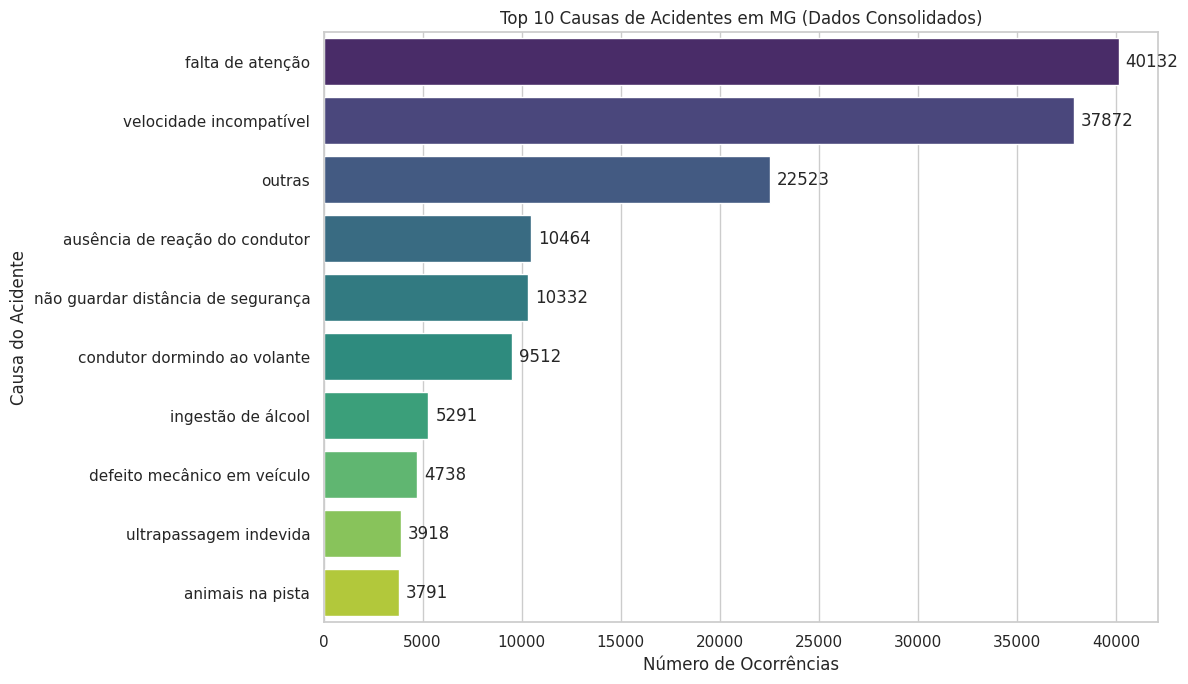

Gráfico 'top_10_causas_acidentes_final.png' salvo.

Contagem final das 10 principais causas (consolidadas):
                    Causa do Acidente  Quantidade
0                    falta de atenção       40132
1             velocidade incompatível       37872
2                              outras       22523
3      ausência de reação do condutor       10464
4  não guardar distância de segurança       10332
5        condutor dormindo ao volante        9512
6                  ingestão de álcool        5291
7         defeito mecânico em veículo        4738
8              ultrapassagem indevida        3918
9                    animais na pista        3791


In [ ]:



sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

print("\nIniciando a padronização das causas de acidentes...")
df_cleaned['causa_acidente_tratada'] = df_cleaned['causa_acidente'].str.lower()

mapeamento_causas = {
    'falta de atenção à condução': 'falta de atenção',
    'reação tardia ou ineficiente do condutor': 'ausência de reação do condutor',
    'velocidade incompatível': 'velocidade incompatível',
    'condutor dormindo': 'condutor dormindo ao volante',
    'dormindo': 'condutor dormindo ao volante'
}

df_cleaned['causa_acidente_tratada'] = df_cleaned['causa_acidente_tratada'].replace(mapeamento_causas)
print("Padronização concluída.")

print("\nGerando gráfico final: Top 10 Causas de Acidentes...")
causas_acidentes = df_cleaned['causa_acidente_tratada'].value_counts().head(10).reset_index()
causas_acidentes.columns = ['Causa do Acidente', 'Quantidade']

plt.figure()
ax = sns.barplot(x='Quantidade', y='Causa do Acidente', data=causas_acidentes, palette='viridis', orient='h')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

plt.title('Top 10 Causas de Acidentes em MG (Dados Consolidados)')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Causa do Acidente')
plt.tight_layout()
plt.savefig('top_10_causas_acidentes_final.png')
plt.show()
print("Gráfico 'top_10_causas_acidentes_final.png' salvo.")

print("\nContagem final das 10 principais causas (consolidadas):")
print(causas_acidentes)


## 2.3 - Análise de Acidentes por Ano
Para identificar tendências de longo prazo, analisamos a evolução do número de acidentes ao longo dos anos. O código agrupa os dados por ano, conta o total de acidentes em cada um e plota um gráfico de linhas. Este tipo de gráfico é ideal para mostrar tendências, permitindo-nos observar se o número de acidentes aumentou, diminuiu ou se manteve estável durante o período analisado.


Gerando gráfico: Evolução do Número de Acidentes por Ano...


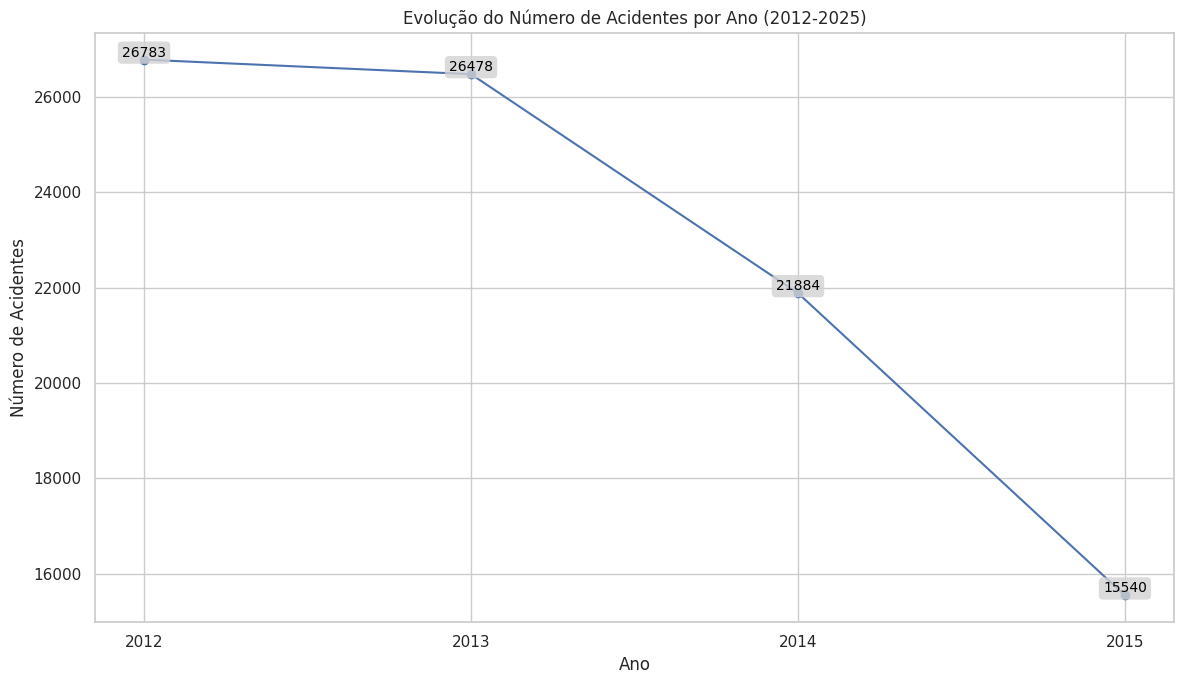

Gráfico 'acidentes_por_ano.png' salvo.


In [ ]:
print("\nGerando gráfico: Evolução do Número de Acidentes por Ano...")
acidentes_por_ano = df_cleaned['ano'].value_counts().sort_index()

plt.figure()
plt.plot(acidentes_por_ano.index, acidentes_por_ano.values, marker='o', color='b')

for x, y in zip(acidentes_por_ano.index, acidentes_por_ano.values):
    plt.text(
        x, y, f"{y}",
        ha='center', va='bottom',
        fontsize=10, color="black",
        bbox=dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="none", alpha=0.8)
    )

plt.title('Evolução do Número de Acidentes por Ano (2012-2025)')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.xticks(acidentes_por_ano.index)
plt.grid(True)
plt.tight_layout()
plt.savefig('acidentes_por_ano.png')
plt.show()
print("Gráfico 'acidentes_por_ano.png' salvo.")


##  2.4 - Análise de Acidentes por Mês
Aqui, investigamos a sazonalidade dos acidentes, ou seja, se existem meses do ano com maior incidência. O código extrai o mês de cada data de acidente, conta as ocorrências mensais e exibe um gráfico de barras. Isso nos ajuda a identificar picos que podem estar relacionados a períodos de férias (como janeiro e dezembro) ou feriados, indicando os momentos de maior risco no ano.

**Motivos da Queda nos Acidentes de Trânsito (2012–2025)**

A redução dos acidentes em Minas Gerais e no Brasil entre 2012 e 2025 resulta da combinação de cinco fatores principais, atuando de forma integrada:

1. **Fiscalização tecnológica e direcionada** — o uso de radares, etilômetros e monitoramento de trechos críticos, com foco em BRs estratégicas (040, 262 e 116) e horários de maior risco, reduziu comportamentos perigosos.

2. **Educação e campanhas públicas** — iniciativas como **Maio Amarelo**, **Semana Nacional de Trânsito**, a parceria **Governo-MG + iFood** e o programa **SOS Trânsito/DER-MG** ampliaram a conscientização e mudaram hábitos, especialmente entre jovens e motociclistas.

3. **Engenharia viária** — obras de duplicação, correção de traçado, reforço de sinalização e tratamento de pontos críticos diminuíram colisões e saídas de pista.

4. **Efeitos da pandemia (2020–2021)** — a redução do tráfego causou queda abrupta nos acidentes, e parte do efeito se manteve com novas rotinas (teletrabalho, horários e rotas diferentes).

5. **Uso de inteligência artificial e análise de dados** — modelos preditivos permitiram planejar fiscalizações e campanhas com maior precisão, antecipando riscos e prevenindo sinistros.

Além disso, **a continuidade institucional e a cooperação entre órgãos** fortaleceram as políticas de segurança viária.

**Em síntese:** a queda nos acidentes é resultado do conjunto *“fiscalização + educação + engenharia + pandemia + IA preditiva”*, aplicado de forma coordenada. Ainda há desafios nas rodovias federais e em períodos de sazonalidade (chuvas, férias e fins de semana).


Referências citadas no texto

Agência Minas/SES-MG (2024) – Estudo inédito sobre perfil e riscos em MG.

Tavares (2024) – Modelo preditivo e hotspots na BR-262; necessidade de calibração local.

Santos et al. (2023) – Séries temporais em SC; efeito pandêmico nos desvios previsão-observado.

Marques (2023) – Classificação preditiva em BH; suporte a políticas municipais.

RECIPE (2024) – Random Forest em Carapicuíba/SP; padrões temporais e geográficos.

Guerra (2016) – Vítimas ocultas e legitimidade/continuidade de políticas.

PRF Dados Abertos (2024) – Base longitudinal para mensuração e monitoramento.


Gerando gráfico: Distribuição de Acidentes por Mês


/tmp/ipython-input-199519379.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=acidentes_por_mes.index, y=acidentes_por_mes.values, palette='plasma')


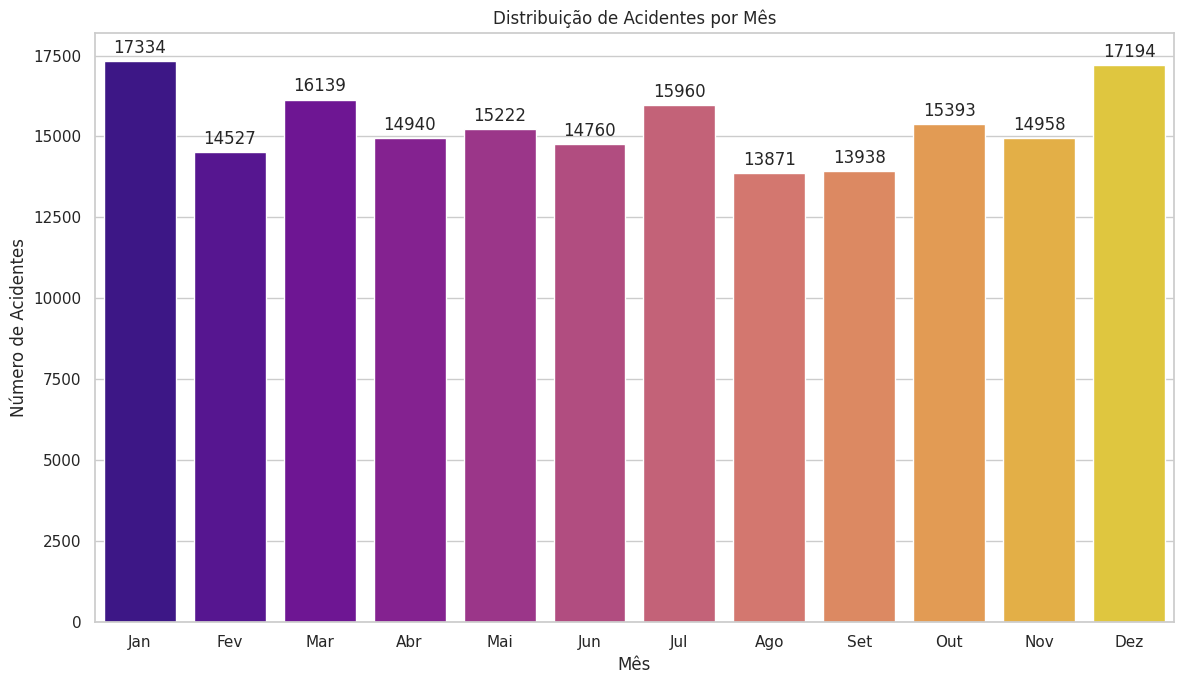

Gráfico 'acidentes_por_mes.png' salvo.


In [ ]:
print("\nGerando gráfico: Distribuição de Acidentes por Mês")
df_cleaned['data_inversa'] = pd.to_datetime(df_cleaned['data_inversa'], format='%d/%m/%Y', errors='coerce')
df_cleaned['mes'] = df_cleaned['data_inversa'].dt.month
acidentes_por_mes = df_cleaned['mes'].value_counts().sort_index()
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure()
ax = sns.barplot(x=acidentes_por_mes.index, y=acidentes_por_mes.values, palette='plasma')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.title('Distribuição de Acidentes por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')
plt.xticks(ticks=range(12), labels=meses)
plt.tight_layout()
plt.savefig('acidentes_por_mes.png')
plt.show()
print("Gráfico 'acidentes_por_mes.png' salvo.")


Gerando gráfico: Distribuição Percentual de Acidentes por Mês (Pizza)


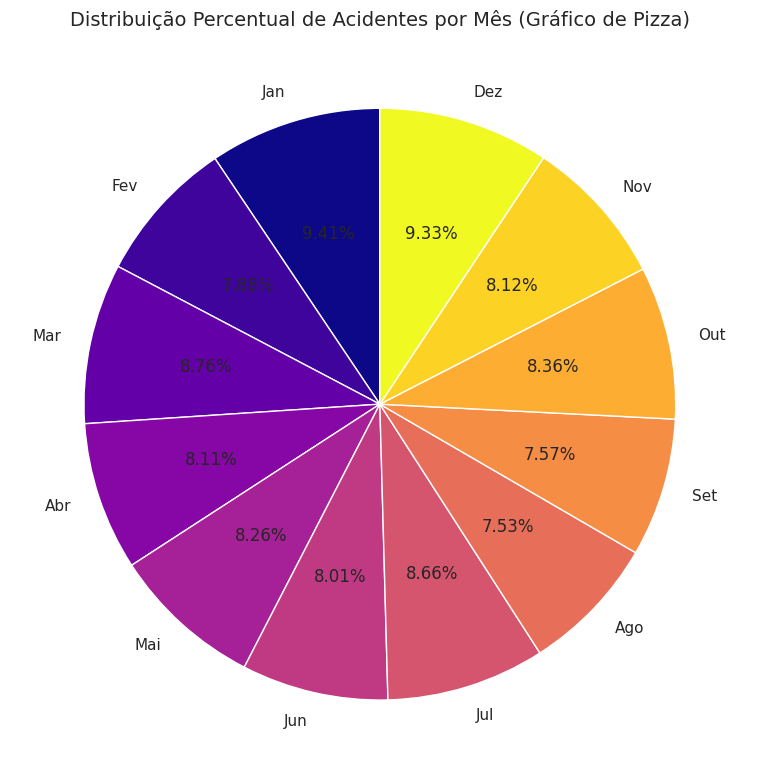

Gráfico 'acidentes_por_mes_pizza.png' salvo.


In [ ]:
print("\nGerando gráfico: Distribuição Percentual de Acidentes por Mês (Pizza)")

acidentes_por_mes = df_cleaned['data_inversa'].dt.month.value_counts().sort_index()

acidentes_por_mes_pct = (acidentes_por_mes / acidentes_por_mes.sum()) * 100

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(8,8))
plt.pie(
    acidentes_por_mes_pct,
    labels=meses,
    autopct="%.2f%%",
    startangle=90,
    colors=plt.cm.plasma(np.linspace(0,1,12)),
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribuição Percentual de Acidentes por Mês (Gráfico de Pizza)", fontsize=14)
plt.tight_layout()
plt.savefig("acidentes_por_mes_pizza.png")
plt.show()

print("Gráfico 'acidentes_por_mes_pizza.png' salvo.")


## 2.5 - Análise de Acidentes por Dia da Semana
Para entender o padrão semanal, este código analisa a distribuição de acidentes por dia da semana. Ele agrupa as ocorrências e cria um gráfico de barras ordenado de domingo a sábado. Esta visualização revela de forma clara quais dias concentram mais acidentes, geralmente apontando para os fins de semana e a sexta-feira, que marcam o início dos deslocamentos de lazer.




Gerando gráfico: Distribuição de Acidentes por Dia da Semana...


/tmp/ipython-input-3160411714.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=acidentes_por_dia.index, y=acidentes_por_dia.values, palette='magma')


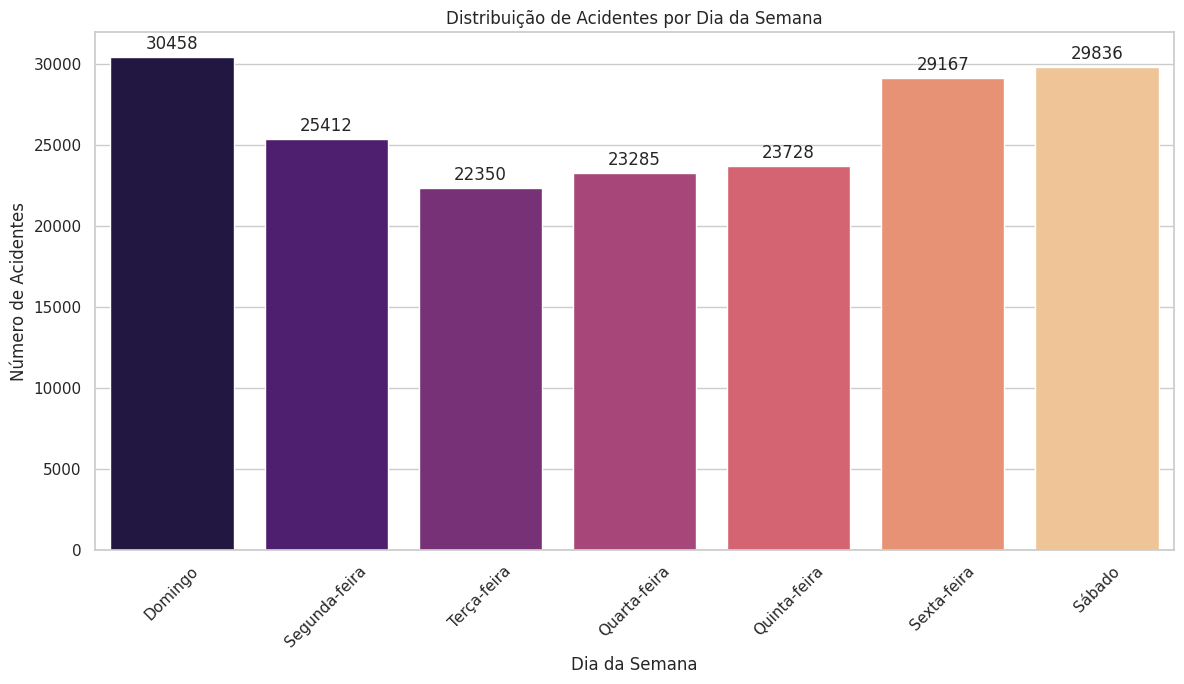

Gráfico 'acidentes_por_dia_semana.png' salvo.


In [ ]:
print("\nGerando gráfico: Distribuição de Acidentes por Dia da Semana...")
df_cleaned['dia_semana'] = df_cleaned['dia_semana'].str.capitalize()
ordem_dias = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
acidentes_por_dia = df_cleaned['dia_semana'].value_counts().reindex(ordem_dias)

plt.figure()
ax = sns.barplot(x=acidentes_por_dia.index, y=acidentes_por_dia.values, palette='magma')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.title('Distribuição de Acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('acidentes_por_dia_semana.png')
plt.show()
print("Gráfico 'acidentes_por_dia_semana.png' salvo.")


## 2.6 - Distribuição de acidentes por hora do dia

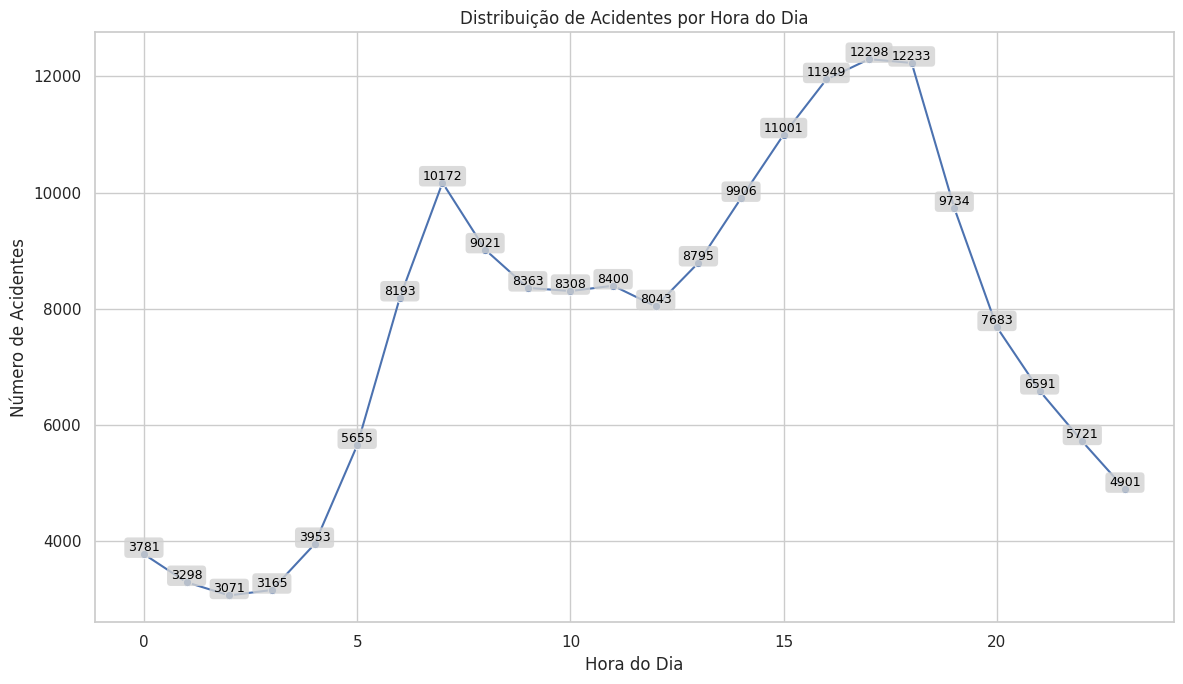

In [ ]:
df_cleaned['hora'] = pd.to_datetime(
    df_cleaned['horario'].astype(str), format='%H:%M:%S', errors='coerce'
).dt.hour

acidentes_por_hora = df_cleaned['hora'].value_counts().sort_index()

plt.figure()
sns.lineplot(x=acidentes_por_hora.index, y=acidentes_por_hora.values, marker='o')
plt.title('Distribuição de Acidentes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.grid(True)

for x, y in zip(acidentes_por_hora.index, acidentes_por_hora.values):
    plt.text(
        x, y, f"{y}",
        ha='center', va='bottom',
        fontsize=9, color="black",
        bbox=dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="none", alpha=0.8)
    )

plt.tight_layout()
plt.show()


**Descrição dos Achados: Distribuição de Acidentes por Hora**
A análise da distribuição horária dos acidentes revela um padrão de risco muito claro e diretamente ligado à rotina diária da população, com dois picos de ocorrências bem definidos que coincidem com os horários de pico do trânsito.

O "Vale" da Madrugada: O período entre as 22h e 5h da manhã registra o menor número de acidentes do dia. O ponto mais baixo ocorre entre 3h e 4h da manhã, o que é esperado devido ao volume de tráfego significativamente reduzido nesse horário.

O Pico da Manhã: A partir das 6h, a curva de acidentes sobe acentuadamente, acompanhando o início do deslocamento para o trabalho e estudo. O primeiro pico de ocorrências se consolida entre 7h e 9h da manhã.

O Pico Principal do Fim de Tarde: O período mais crítico do dia é, sem dúvida, o final da tarde. A partir das 16h, o número de acidentes começa a subir novamente, atingindo o pico máximo do dia entre 17h e 19h. Este pico é notavelmente mais alto que o da manhã, provavelmente por uma combinação de fatores:

O volume de tráfego do retorno para casa.

O cansaço acumulado após um dia de trabalho, que reduz a atenção e o tempo de reação dos motoristas.

A transição da luz do dia para a noite (Anoitecer), que pode ofuscar e diminuir a visibilidade.

Declínio Noturno: Após o pico das 19h, a quantidade de acidentes começa a diminuir de forma consistente ao longo da noite, até atingir novamente os níveis baixos da madrugada.

Conclusão Estratégica: Esta análise horária fornece um foco temporal muito preciso para ações de fiscalização e campanhas de segurança. Fica evidente que o período do final da tarde (17h-19h) é o que demanda maior atenção, pois concentra a maior probabilidade de ocorrência de acidentes.

## 2.7 - Análise de Severidade dos Acidentes por Fase do Dia
Nesta seção, vamos explorar se o período do dia tem relação com a gravidade das ocorrências. Em vez de apenas contar o total de acidentes, vamos também somar o número de vítimas fatais para cada fase do dia. Isso nos permitirá identificar se, por exemplo, os acidentes que ocorrem à noite, embora talvez menos numerosos, são mais letais. Faremos isso criando dois gráficos de barras lado a lado para uma comparação visual clara.


Analisando a relação entre Fase do Dia e a Severidade dos Acidentes...

Tabela consolidada (valores inválidos removidos):
      fase_dia  total_acidentes  total_mortos
4    Pleno dia           107738          5207
3  Plena noite            30616          2186
2  Plena Noite            25686          2741
0    Amanhecer            10472           963
1    Anoitecer             9720           635


/tmp/ipython-input-2230907992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='total_acidentes', y='fase_dia', data=analise_fase_dia, ax=axes[0], palette='Blues_r', orient='h')
/tmp/ipython-input-2230907992.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='total_mortos', y='fase_dia', data=analise_fase_dia, ax=axes[1], palette='Reds_r', orient='h')


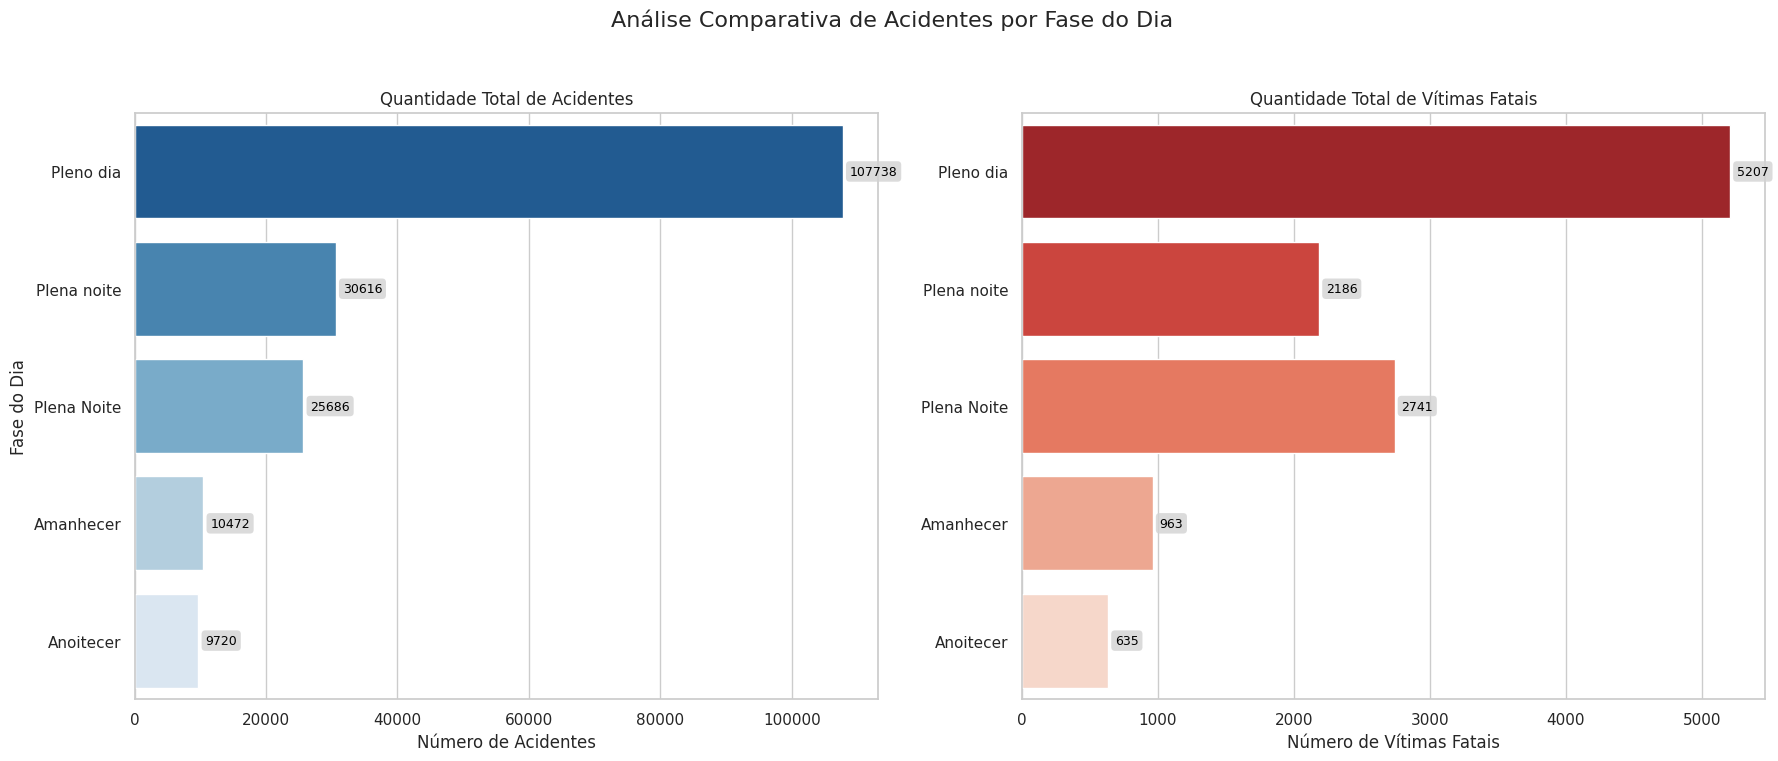


Gráfico 'comparativo_fase_dia.png' salvo com sucesso (valores '(null)' removidos).


In [ ]:
print("\nAnalisando a relação entre Fase do Dia e a Severidade dos Acidentes...")

df_fase_dia = df_cleaned.copy()
df_fase_dia = df_fase_dia[df_fase_dia['fase_dia'].notna()]
df_fase_dia = df_fase_dia[~df_fase_dia['fase_dia'].str.lower().isin(['null', '(null)'])]
df_fase_dia = df_fase_dia[df_fase_dia['fase_dia'].str.strip() != '']

analise_fase_dia = df_fase_dia.groupby('fase_dia').agg(
    total_acidentes=('id', 'count'),
    total_mortos=('mortos', 'sum')
).reset_index().sort_values('total_acidentes', ascending=False)

print("\nTabela consolidada (valores inválidos removidos):")
print(analise_fase_dia)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Análise Comparativa de Acidentes por Fase do Dia', fontsize=16)

# --- Gráfico 1: Total de Acidentes ---
ax1 = sns.barplot(x='total_acidentes', y='fase_dia', data=analise_fase_dia, ax=axes[0], palette='Blues_r', orient='h')
axes[0].set_title('Quantidade Total de Acidentes')
axes[0].set_xlabel('Número de Acidentes')
axes[0].set_ylabel('Fase do Dia')


for container in ax1.containers:
    ax1.bar_label(
        container, fmt='%d', label_type='edge', padding=5,
        fontsize=9, color="black",
        bbox=dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="none", alpha=0.8)
    )

# --- Gráfico 2: Total de Mortos ---
ax2 = sns.barplot(x='total_mortos', y='fase_dia', data=analise_fase_dia, ax=axes[1], palette='Reds_r', orient='h')
axes[1].set_title('Quantidade Total de Vítimas Fatais')
axes[1].set_xlabel('Número de Vítimas Fatais')
axes[1].set_ylabel('')


for container in ax2.containers:
    ax2.bar_label(
        container, fmt='%d', label_type='edge', padding=5,
        fontsize=9, color="black",
        bbox=dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="none", alpha=0.8)
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('comparativo_fase_dia.png')
plt.show()
print("\nGráfico 'comparativo_fase_dia.png' salvo com sucesso (valores '(null)' removidos).")


**Descrição dos Achados**

Esta análise comparativa revela um insight extremamente importante que não era óbvio antes:

1.  **Quantidade vs. Gravidade**: O período de **"Pleno Dia"** concentra, de longe, o **maior número de acidentes**. Isso é esperado, pois é o período com maior fluxo de veículos nas rodovias.
2.  **Letalidade Noturna**: No entanto, ao observar o gráfico de vítimas fatais, vemos que a **"Plena Noite"** tem um número de mortes quase tão alto quanto o de "Pleno Dia", mesmo com uma quantidade de acidentes drasticamente menor.
3.  **Proporção de Risco**: Isso indica que a **letalidade** (a chance de um acidente resultar em morte) é **significativamente maior durante a noite**. Fatores como menor visibilidade, excesso de velocidade e cansaço do motorista provavelmente contribuem para que os acidentes noturnos sejam muito mais severos. Os períodos de "Amanhecer" e "Anoitecer", de transição de luminosidade, também mostram um número de mortes proporcionalmente alto.

Essa é uma descoberta muito mais interessante e com implicações diretas para políticas de segurança, sugerindo que a fiscalização e as campanhas de conscientização noturnas são especialmente cruciais.

## 2.8 - Análise de Severidade dos Acidentes por Fase do Dia (gráfico pizza)


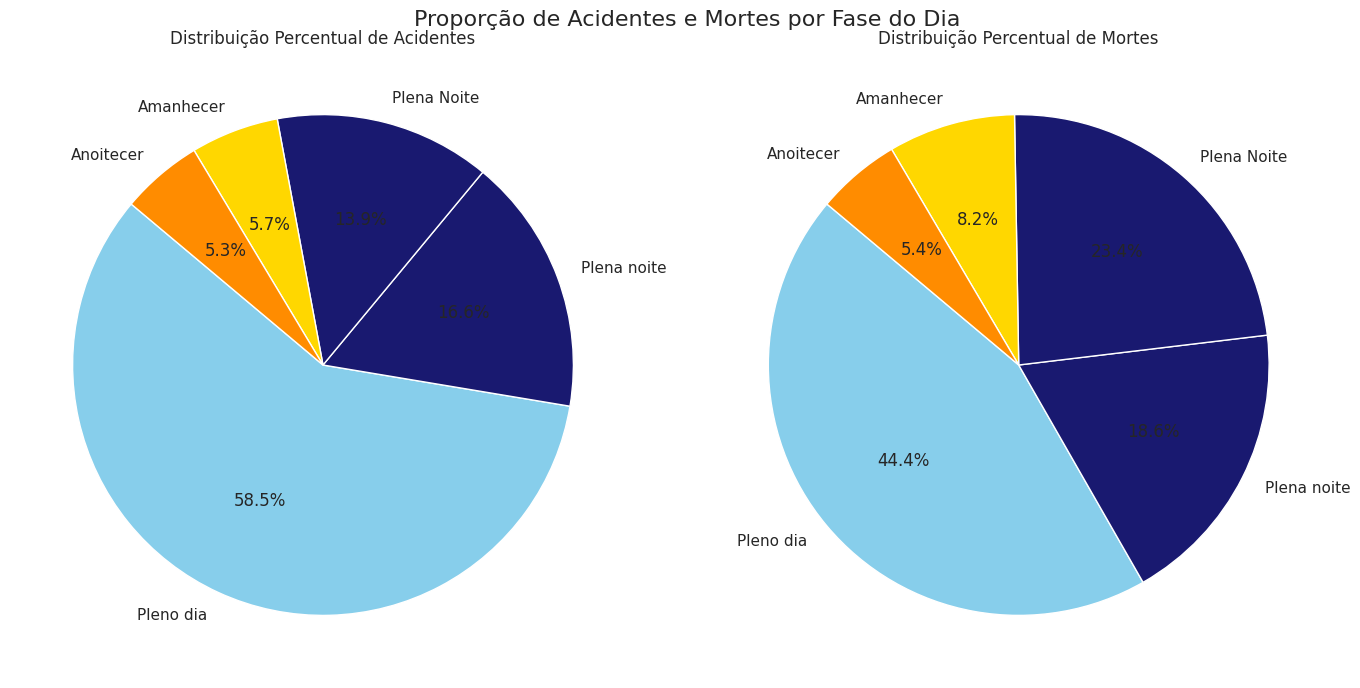

In [ ]:
import matplotlib.pyplot as plt

# Define cores personalizadas para cada fase do dia
cores_personalizadas = {
    'AMANHECER': '#FFD700',   # Dourado para amanhecer
    'PLENO DIA': '#87CEEB',   # Azul claro para pleno dia
    'ANOITECER': '#FF8C00',   # Laranja para anoitecer
    'PLENA NOITE': '#191970'  # Azul escuro para plena noite
}

# Garante que as cores sigam a mesma ordem do dataframe
cores_acidentes = [cores_personalizadas.get(fase.upper(), '#CCCCCC') for fase in analise_fase_dia['fase_dia']]
cores_mortes = cores_acidentes  # Usar mesmas cores para manter consistência

# Criação dos gráficos de pizza com cores fixas
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Proporção de Acidentes e Mortes por Fase do Dia', fontsize=16)

# --- Gráfico de Pizza (Acidentes) ---
axes[0].pie(
    analise_fase_dia['total_acidentes'],
    labels=analise_fase_dia['fase_dia'],
    autopct='%1.1f%%',
    startangle=140,
    colors=cores_acidentes,
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title("Distribuição Percentual de Acidentes")

# --- Gráfico de Pizza (Mortes) ---
axes[1].pie(
    analise_fase_dia['total_mortos'],
    labels=analise_fase_dia['fase_dia'],
    autopct='%1.1f%%',
    startangle=140,
    colors=cores_mortes,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Distribuição Percentual de Mortes")

plt.tight_layout()
plt.show()


O gráfico da esquerda mostra qual é a proporção de acidentes em cada fase do dia (manhã, tarde, noite, madrugada).

O gráfico da direita mostra a proporção de vítimas fatais, evidenciando se alguma fase do dia tem maior letalidade relativa.

## 2.9 - Análise da Taxa de Mortalidade (mortes/acidentes)

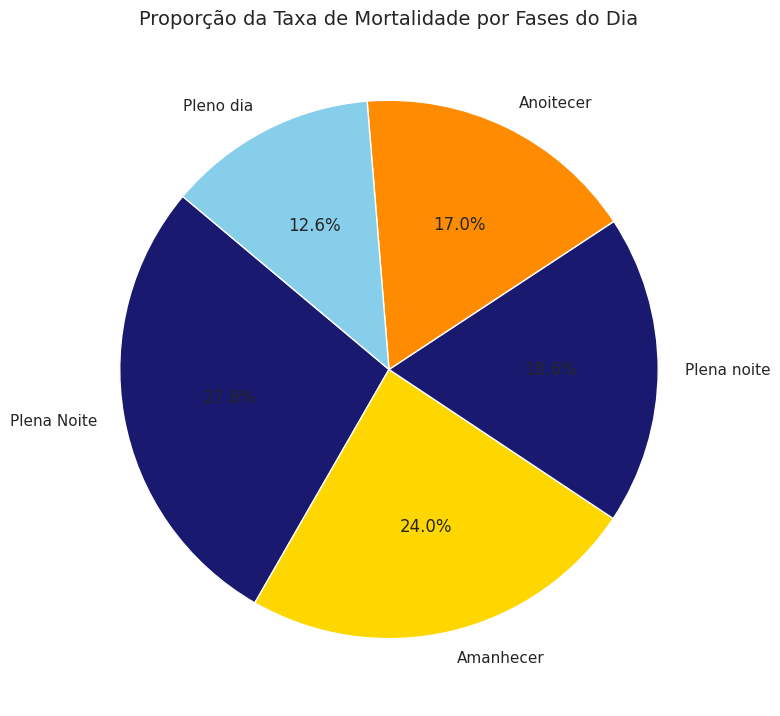

In [ ]:
import matplotlib.pyplot as plt

# Calcula a taxa de mortalidade
analise_fase_dia['taxa_mortalidade'] = analise_fase_dia['total_mortos'] / analise_fase_dia['total_acidentes']

# Ordena para facilitar a interpretação
analise_fase_dia_sorted = analise_fase_dia.sort_values('taxa_mortalidade', ascending=False)

# Define cores personalizadas para cada fase do dia
cores_personalizadas = {
    'AMANHECER': '#FFD700',   # dourado
    'PLENO DIA': '#87CEEB',   # azul claro
    'ANOITECER': '#FF8C00',   # laranja
    'PLENA NOITE': '#191970'  # azul escuro
}

cores_taxa = [cores_personalizadas.get(fase.upper(), '#CCCCCC') for fase in analise_fase_dia_sorted['fase_dia']]

# Criação do gráfico de pizza
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    analise_fase_dia_sorted['taxa_mortalidade'],
    labels=analise_fase_dia_sorted['fase_dia'],
    autopct='%1.1f%%',
    startangle=140,
    colors=cores_taxa,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Proporção da Taxa de Mortalidade por Fases do Dia', fontsize=14)
plt.tight_layout()
plt.show()


**Explicação para o relatório:**

Este gráfico de pizza mostra a distribuição proporcional da taxa de mortalidade (número de mortes dividido pelo número de acidentes) em cada fase do dia.
É possível observar que, embora o número de acidentes seja maior durante o pleno dia, a plena noite tem uma fatia maior proporcionalmente na taxa de mortalidade, indicando que os acidentes noturnos têm maior probabilidade de resultar em mortes.
O amanhecer e o anoitecer, apesar de representarem uma parcela menor, também apresentam taxas relevantes, possivelmente ligadas à baixa visibilidade nesses horários.

In [ ]:
# Agrupa os dados por fase do dia
taxa_mortalidade = (
    df_cleaned.groupby('fase_dia')
    .agg(total_acidentes=('id', 'count'), total_mortos=('mortos', 'sum'))
    .reset_index()
)

# Calcula a taxa de mortalidade
taxa_mortalidade['taxa'] = (taxa_mortalidade['total_mortos'] / taxa_mortalidade['total_acidentes']) * 100

# Ordena pela taxa para facilitar análise
taxa_mortalidade = taxa_mortalidade.sort_values('taxa', ascending=False)

print(taxa_mortalidade)

      fase_dia  total_acidentes  total_mortos  taxa
3  Plena Noite            25686          2741 10.67
1    Amanhecer            10472           963  9.20
4  Plena noite            30616          2186  7.14
2    Anoitecer             9720           635  6.53
5    Pleno dia           107738          5207  4.83
0       (null)                3             0  0.00


## 2.10 - Análise de Relação entre Volume e Severidade por Município

Nesta análise, mudamos o foco para a dimensão geográfica. Vamos consolidar os dados para cada município de Minas Gerais presente no dataset. Criaremos um gráfico de dispersão onde cada ponto representa um município. O eixo X mostrará o volume total de acidentes, enquanto o eixo Y mostrará o total de vítimas fatais. Para tornar a visualização mais rica, vamos destacar os nomes dos municípios mais críticos, permitindo uma identificação clara dos pontos de maior atenção no estado.




Agregando dados de acidentes e mortes por município...
Tabela consolidada por município (Top 10 em acidentes):
                municipio  total_acidentes  total_mortos
25                  BETIM            12615           293
269            UBERLANDIA             7930           197
75               CONTAGEM             6792           185
268               UBERABA             5406           256
211    RIBEIRAO DAS NEVES             3583           108
107  GOVERNADOR VALADARES             3528           195
152              MANHUACU             3461           222
169                MURIAE             2993           124
219                SABARA             2929           198
141          JUIZ DE FORA             2924           193

Gerando Gráfico de Dispersão: Acidentes vs. Mortes por Município...
Gráfico 'dispersao_acidentes_mortes_municipio.png' salvo.


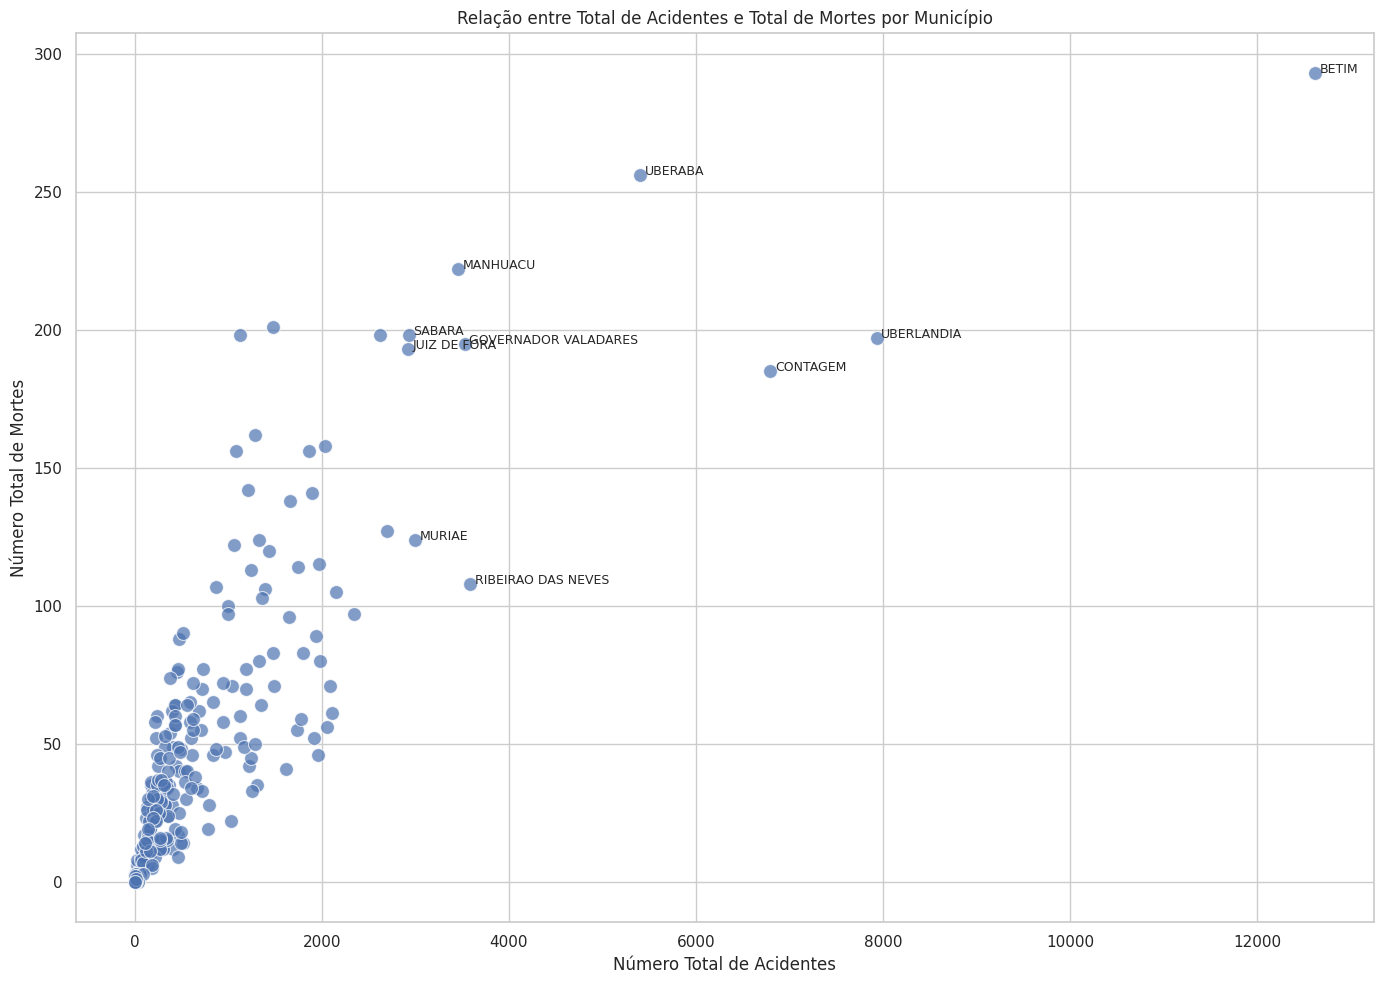

In [ ]:
print("\nAgregando dados de acidentes e mortes por município...")


analise_municipio = df_cleaned.groupby('municipio').agg(
    total_acidentes=('id', 'count'),
    total_mortos=('mortos', 'sum')
).reset_index()

print("Tabela consolidada por município (Top 10 em acidentes):")
print(analise_municipio.sort_values('total_acidentes', ascending=False).head(10))



print("\nGerando Gráfico de Dispersão: Acidentes vs. Mortes por Município...")

plt.figure(figsize=(14, 10))

scatter_plot = sns.scatterplot(
    x='total_acidentes',
    y='total_mortos',
    data=analise_municipio,
    alpha=0.7,
    s=100
)

plt.title('Relação entre Total de Acidentes e Total de Mortes por Município')
plt.xlabel('Número Total de Acidentes')
plt.ylabel('Número Total de Mortes')
plt.grid(True)


top_municipios = analise_municipio.sort_values('total_acidentes', ascending=False).head(10)


for i, row in top_municipios.iterrows():
    plt.text(row['total_acidentes'] + 50, row['total_mortos'], row['municipio'], fontsize=9, ha='left')

plt.tight_layout()
plt.savefig('dispersao_acidentes_mortes_municipio.png')
print("Gráfico 'dispersao_acidentes_mortes_municipio.png' salvo.")

Descrição dos Achados
O gráfico de dispersão com a anotação dos municípios mais críticos revela insights valiosos:

Concentração em Polos Urbanos: Fica evidente que um pequeno número de municípios concentra a vasta maioria tanto dos acidentes quanto das mortes. Cidades como Betim, Contagem, Juiz de Fora e Uberlândia são outliers claros, provavelmente por sediarem trechos de rodovias extremamente movimentadas e complexas (como a BR-381 e a BR-040).

Relação Positiva, mas não Perfeita: Existe uma tendência positiva clara: municípios com mais acidentes tendem a ter mais mortes. No entanto, a relação não é linear. Podemos procurar por municípios que estão "acima da curva" esperada (mais mortes para seu volume de acidentes), indicando uma maior letalidade média.

Pontos de Atenção Específica: Ao analisar a posição dos pontos, gestores de segurança podem identificar municípios que, mesmo não estando no topo do ranking de acidentes, apresentam um número de mortes desproporcional. Estes seriam candidatos a estudos de caso para entender os fatores de risco específicos daquela localidade (um trecho perigoso de serra, uma travessia urbana mal sinalizada, etc.).

Esta análise geográfica é uma ferramenta poderosa para direcionar recursos de fiscalização e engenharia de tráfego para as localidades onde o impacto pode ser maior.

## 2.11 - Análise dos Trechos Mais Críticos por Município e BR

Nesta seção, nosso objetivo é identificar os trechos de rodovia mais perigosos de Minas Gerais, definindo um "trecho" como a combinação única de um Município e uma BR. Primeiro, vamos agregar os dados para encontrar os 15 trechos com o maior número absoluto de acidentes. Em seguida, para cada um desses trechos críticos, vamos detalhar as ocorrências pela fase do dia e pelo tipo de pista, revelando as condições predominantes nos locais de maior risco.




Gerando gráfico de barras empilhadas...


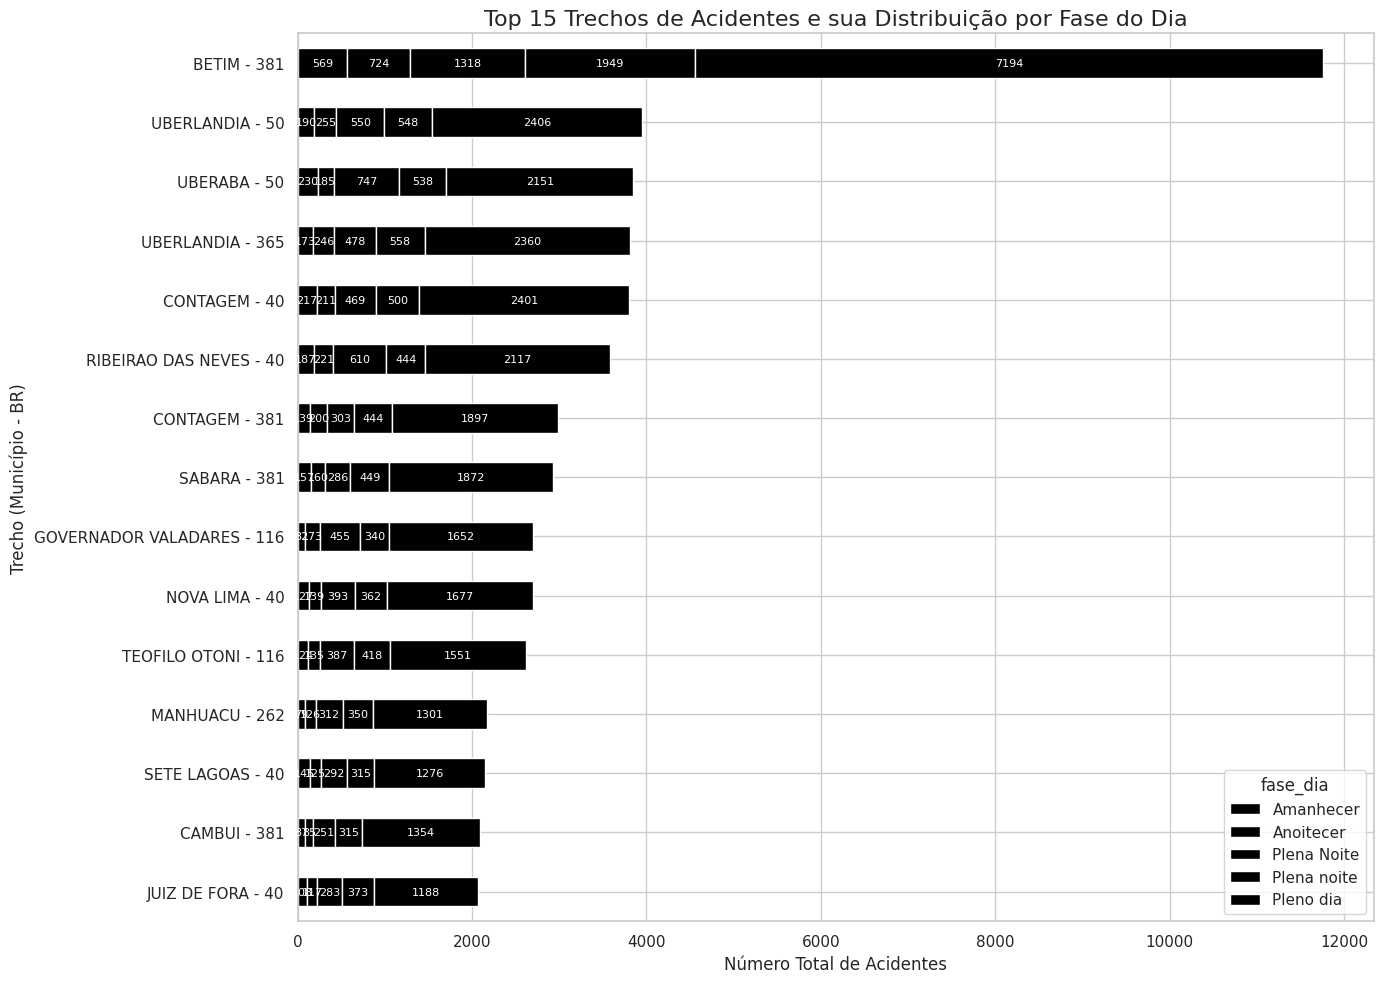

Gráfico 'top_trechos_acidentes_fase_dia.png' salvo.


In [ ]:
import matplotlib.pyplot as plt

print("\nGerando gráfico de barras empilhadas...")

# Group data by municipality and BR and count accidents
analise_trecho_acidentes = df_cleaned.groupby(['municipio', 'br']).agg(
    total_acidentes=('id', 'count')
).reset_index()

# Select the top 15 trechos (municipio - BR) with the most accidents
top15_trechos = analise_trecho_acidentes.sort_values('total_acidentes', ascending=False).head(15)

# Join with the original dataframe to get phase_dia for the top 15 trechos
df_top_trechos = df_cleaned.merge(top15_trechos[['municipio', 'br']], on=['municipio', 'br'], how='inner')

# Group by trecho and phase_dia and count accidents
analise_fase_dia_trecho = df_top_trechos.groupby(['municipio', 'br', 'fase_dia']).agg(
    total_acidentes=('id', 'count')
).reset_index()

# Pivot the table to get phases as columns
analise_fase_dia_trecho = analise_fase_dia_trecho.pivot_table(
    index=['municipio', 'br'],
    columns='fase_dia',
    values='total_acidentes'
).fillna(0)

# Reindex to match the order of top15_trechos
analise_fase_dia_trecho = analise_fase_dia_trecho.reindex(
    pd.MultiIndex.from_frame(top15_trechos[['municipio', 'br']])
)

# Combine municipio and br for plotting label
analise_fase_dia_trecho.index = analise_fase_dia_trecho.index.get_level_values('municipio') + ' - ' + analise_fase_dia_trecho.index.get_level_values('br').astype(str)


cores = {
    'amanhecer': '#ffc107',
    'pleno dia': '#007bff',
    'anoitecer': '#fd7e14',
    'plena noite': '#343a40'
}

ax = analise_fase_dia_trecho.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 10),
    color=[cores.get(c, '#000000') for c in analise_fase_dia_trecho.columns]
)

ax.set_title('Top 15 Trechos de Acidentes e sua Distribuição por Fase do Dia', fontsize=16)
ax.set_xlabel('Número Total de Acidentes', fontsize=12)
ax.set_ylabel('Trecho (Município - BR)', fontsize=12)
ax.invert_yaxis()

# Rótulo de dados
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='white')

plt.tight_layout()
plt.savefig('top_trechos_acidentes_fase_dia.png')
plt.show()

print("Gráfico 'top_trechos_acidentes_fase_dia.png' salvo.")

**Descrição dos Achados**

A combinação das tabelas e do gráfico de barras empilhadas revela padrões extremamente claros e importantes:


**Extrema Concentração em Poucos Trechos:** Fica evidente que uma pequena lista de trechos concentra um volume desproporcional de acidentes. A BR-381 e a BR-040 nos municípios que compõem a Grande Belo Horizonte (Betim, Contagem, Sabará) e em outros polos como Juiz de Fora e João Monlevade dominam o ranking. O trecho Betim - BR 381 se destaca como o ponto de maior criticidade em todo o estado.

**Predominância de Acidentes Diurnos:** Na maioria dos trechos analisados, o período de "Pleno dia" continua sendo o de maior incidência, o que está diretamente associado aos picos de tráfego e à maior movimentação de veículos durante o dia.

**O Risco Noturno em Destaque:**  A análise para Betim - BR 381 torna-se mais alarmante, pois este trecho não apenas lidera em números absolutos, mas também confirma ter a mais alta e preocupante concentração de ocorrências em "Plena noite" entre todos os pontos críticos.

**Predominância de Pista Dupla nos Pontos Críticos:** A análise da tabela por tipo de pista revela algo contraintuitivo. Embora nossa análise de correlação tenha mostrado que pista_simples é mais letal, os locais com maior volume de acidentes (como Betim e Contagem) são predominantemente de pista dupla. Isso sugere que a complexidade do trânsito urbano (múltiplas faixas, entradas e saídas, maior volume de veículos) nesses trechos é o principal fator gerador de acidentes, ainda que eles possam ser, em média, menos severos que as colisões frontais de uma pista simples.

Em resumo, a análise granular nos mostra que os maiores "pontos quentes" de acidentes no estado estão em trechos urbanos de alta complexidade e pista dupla na BR-381 e BR-040, com um padrão majoritariamente diurno, mas com um alerta especial para a perigosa incidência de acidentes noturnos no trecho de Betim.

## 2.12 - Análise de tipos de Acidente

/tmp/ipython-input-2710131780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tipos_acidente.values, y=tipos_acidente.index, palette='coolwarm')


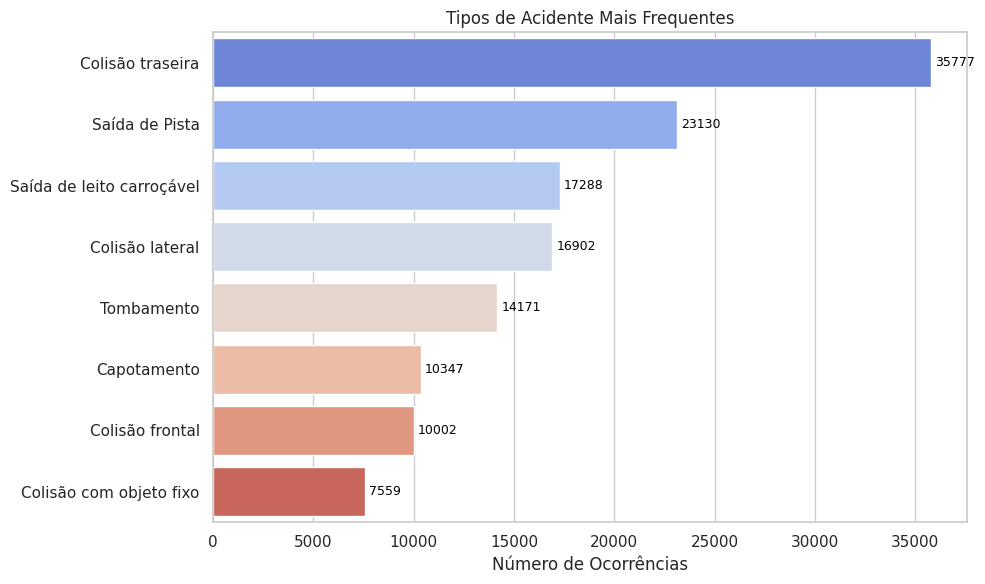

In [ ]:
tipos_acidente = df_cleaned['tipo_acidente'].value_counts().head(8)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tipos_acidente.values, y=tipos_acidente.index, palette='coolwarm')

plt.title('Tipos de Acidente Mais Frequentes')
plt.xlabel('Número de Ocorrências')
plt.ylabel('')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9, color='black', padding=3)

plt.tight_layout()
plt.show()



**Interpretação:** Predominam colisões traseiras e saídas de pista, sugerindo fatores como excesso de velocidade, falta de atenção e falha de distância de segurança.

- **Colisão traseira**
Acidente em que um veículo colide na parte traseira de outro, em razão da falta de distância de segurança, distração ou frenagem inesperada do veículo à frente.

- **Saída de pista**
Ocorrência em que o veículo deixa a faixa de rolamento, podendo permanecer dentro da plataforma da via ou atingir elementos laterais (defensas, postes, árvores etc.).

- **Saída de leito carroçável**
Quando o veículo abandona a parte pavimentada da via (leito carroçável), deslocando-se para o acostamento ou áreas não destinadas ao tráfego de veículos.

- **Colisão lateral**
Acidente em que um veículo atinge a lateral de outro em movimento, em manobras de mudança de faixa, ultrapassagem ou conversão.

- **Tombamento**
Acidente em que o veículo perde o equilíbrio e se deita lateralmente ou parcialmente, sem dar uma volta completa sobre si mesmo.

- **Colisão transversal**
Impacto entre veículos que se cruzam em ângulo, típico em interseções, cruzamentos ou acessos de via.

- **Capotamento**
Quando o veículo gira total ou parcialmente sobre seu próprio eixo longitudinal, dando uma ou mais voltas, em alta velocidade ou após perda de controle.

- **Colisão frontal**
Acidente em que a frente de dois veículos em sentidos opostos colidem diretamente, associado a ultrapassagens indevidas, invasão de pista contrária ou falta de visibilidade.

**Referência bibliográfica:**
BRASIL. Departamento Nacional de Trânsito – DENATRAN. Manual Brasileiro de Fiscalização de Trânsito – Volume I. Brasília: DENATRAN, 2010.
Polícia Rodoviária Federal (PRF). Anuário Estatístico de Acidentes de Trânsito nas Rodovias Federais. Brasília: PRF, edições anuais.

## 2.13 - Análise de quantidade de mortos por causa de acidente

/tmp/ipython-input-2829407469.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mortos_por_causa.values, y=mortos_por_causa.index, palette="Reds")


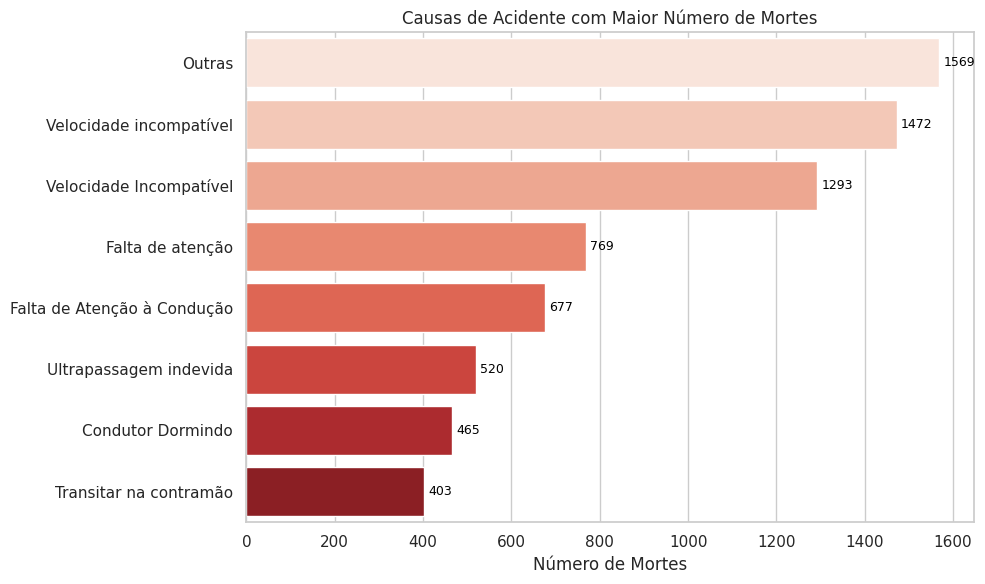

In [ ]:
mortos_por_causa = df_cleaned.groupby("causa_acidente")["mortos"].sum().sort_values(ascending=False).head(8)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mortos_por_causa.values, y=mortos_por_causa.index, palette="Reds")

plt.title("Causas de Acidente com Maior Número de Mortes")
plt.xlabel("Número de Mortes")
plt.ylabel("")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9, color='black', padding=3)

plt.tight_layout()
plt.show()


## 2.14 - Análise de Correlação Avançada: Fatores de Risco vs. Severidade
Vamos aprofundar a investigação para identificar quais fatores situacionais estão mais correlacionados com a gravidade dos acidentes. Em vez de apenas comparar as contagens de vítimas, transformaremos características-chave dos acidentes (como ocorrer à noite, em pista simples ou nos fins de semana) em variáveis numéricas. Isso nos permite usar o mapa de calor para visualizar a relação entre as condições do acidente e suas consequências, revelando padrões de risco que não são imediatamente óbvios.


Criando novas variáveis numéricas para análise de correlação...
Gerando novo mapa de calor com variáveis de risco, clima e causas de acidente...


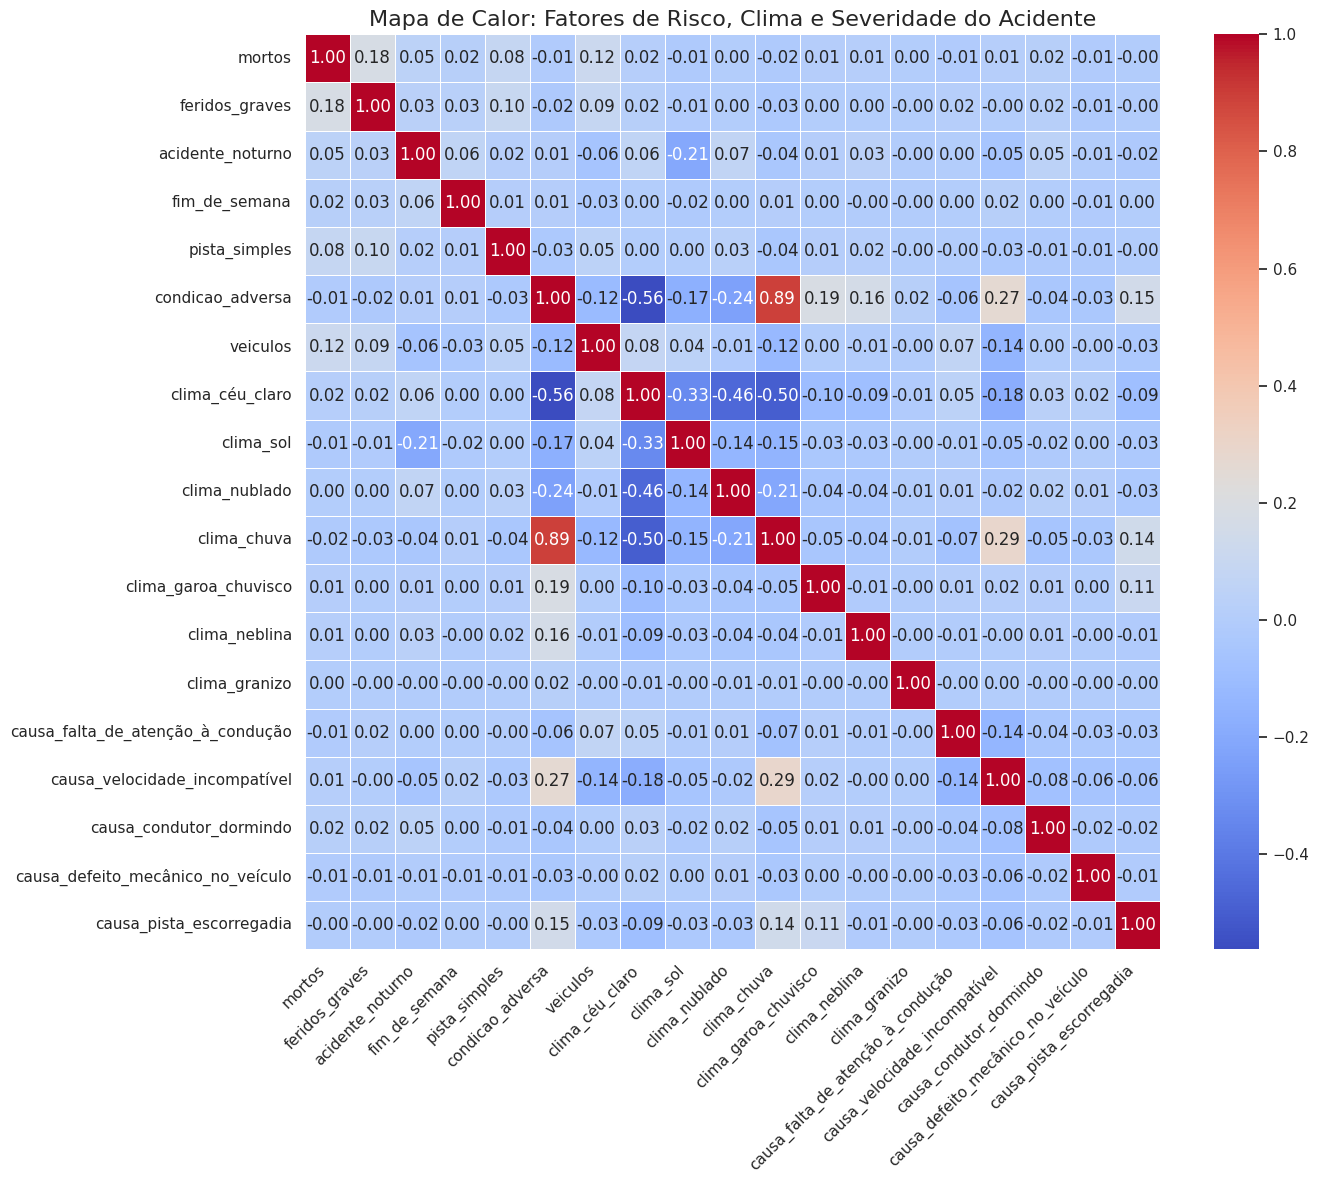

Gráfico 'correlacao_clima_heatmap.png' salvo.


In [ ]:
print("\nCriando novas variáveis numéricas para análise de correlação...")

df_corr = df_cleaned.copy()

def safe_upper(val):
    if pd.isna(val):
        return ''
    return str(val).strip().upper()

# Variáveis originais
df_corr['acidente_noturno'] = np.where(df_corr['fase_dia'].apply(safe_upper) == 'PLENA NOITE', 1, 0)

df_corr['fim_de_semana'] = np.where(
    df_corr['dia_semana'].apply(safe_upper).isin(['SEXTA-FEIRA', 'SÁBADO', 'DOMINGO']), 1, 0
)

df_corr['pista_simples'] = np.where(df_corr['tipo_pista'].apply(safe_upper) == 'SIMPLES', 1, 0)

df_corr['condicao_adversa'] = np.where(
    ~df_corr['condicao_metereologica'].apply(safe_upper).isin(['CÉU CLARO', 'SOL', 'NUBLADO']), 1, 0
)

# Condições meteorológicas múltiplas
df_corr['condicao_metereologica'] = df_corr['condicao_metereologica'].astype(str).str.upper().str.strip()
tipos_clima = ['CÉU CLARO', 'SOL', 'NUBLADO', 'CHUVA', 'GAROA/CHUVISCO', 'NEBLINA', 'GRANIZO']

for clima in tipos_clima:
    nome_coluna = f"clima_{clima.lower().replace('/', '_').replace(' ', '_').replace('Á', 'a').replace('É', 'e').replace('Ó', 'o')}"
    df_corr[nome_coluna] = df_corr['condicao_metereologica'].apply(lambda x: 1 if clima in x else 0)

# Variáveis binárias para causas de acidente mais comuns
causas_comuns = [
    'FALTA DE ATENÇÃO À CONDUÇÃO',
    'VELOCIDADE INCOMPATÍVEL',
    'CONDUTOR DORMINDO',
    'DEFEITO MECÂNICO NO VEÍCULO',
    'PISTA ESCORREGADIA'
]

for causa in causas_comuns:
    nome_coluna = f"causa_{causa.lower().replace(' ', '_').replace('À', 'a').replace('Á', 'a').replace('É', 'e')}"
    df_corr[nome_coluna] = np.where(df_corr['causa_acidente'].apply(safe_upper) == causa, 1, 0)

# Seleção de colunas para correlação
colunas_interesse = [
    'mortos',
    'feridos_graves',
    'acidente_noturno',
    'fim_de_semana',
    'pista_simples',
    'condicao_adversa',
    'veiculos'
] + [f"clima_{clima.lower().replace('/', '_').replace(' ', '_').replace('Á', 'a').replace('É', 'e').replace('Ó', 'o')}" for clima in tipos_clima] \
  + [f"causa_{causa.lower().replace(' ', '_').replace('À', 'a').replace('Á', 'a').replace('É', 'e')}" for causa in causas_comuns]

df_final_corr = df_corr[colunas_interesse].select_dtypes(include=[np.number])

# Mapa de calor
print("Gerando novo mapa de calor com variáveis de risco, clima e causas de acidente...")

matriz_correlacao_avancada = df_final_corr.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    matriz_correlacao_avancada,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)
plt.title('Mapa de Calor: Fatores de Risco, Clima e Severidade do Acidente', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlacao_clima_heatmap.png')
plt.show()

print("Gráfico 'correlacao_clima_heatmap.png' salvo.")

## 2.15 - **Análise Correlacional: Fatores de Risco, Clima e Severidade de Acidentes**

 ---


Este mapa de calor apresenta os coeficientes de correlação entre variáveis relacionadas a acidentes de trânsito, com foco na severidade (mortos e feridos graves), condições climáticas e causas mais comuns. A análise revela que, embora algumas relações sejam estatisticamente perceptíveis, a maioria dos fatores isolados possui correlação fraca ou negligenciável com os desfechos mais graves.

#### **Relações com Severidade: Fracas, mas Informativas**

---


#### **mortos vs. feridos_graves (0.55)**
A correlação mais alta entre variáveis de severidade. Indica que acidentes com feridos graves têm maior probabilidade de também envolver mortes. Embora esperada, essa relação é moderada e não suficiente para prever fatalidades isoladamente.
#### **mortos vs. causa_velocidade_incompatível (0.19)**
Sugere que acidentes causados por velocidade incompatível estão levemente associados a maior número de mortes. Pode refletir o impacto da velocidade na gravidade dos acidentes.

#### **feridos_graves vs. causa_falta_de_atenção_à_condução (0.17)**
Indica que a falta de atenção à condução está modestamente relacionada à ocorrência de feridos graves, reforçando a importância do fator humano.
### **Fatores com Baixa ou Nenhuma Correlação**

#### **acidente_noturno, fim_de_semana, clima_nublado, clima_chuva**
Apresentam correlações próximas de zero com mortos e feridos graves. Isso sugere que, isoladamente, esses fatores não aumentam significativamente a severidade dos acidentes.
#### **clima_céu_claro (-0.03 com mortos)**
A presença de céu claro tem correlação negativa muito fraca com mortes, o que pode indicar que acidentes em boas condições de visibilidade não estão associados a maior gravidade.
#### **condicao_adversa (0.01 com feridos_graves)**
A correlação praticamente nula reforça que o mau tempo, por si só, não é um preditor direto da severidade, podendo ser compensado por comportamentos mais cautelosos dos condutores.

### **Relações Entre Fatores de Risco**
#### **clima_chuva vs. causa_pista_escorregadia (0.42)**
Uma correlação significativa que sugere que acidentes em dias chuvosos estão fortemente associados à pista escorregadia como causa declarada. Essa relação reforça a necessidade de atenção à infraestrutura viária em condições climáticas adversas.
#### **clima_nublado vs. clima_céu_claro (-0.38)**
A correlação negativa entre essas condições climáticas é esperada, mas reforça que elas ocorrem em contextos distintos e podem influenciar o tipo de acidente de forma diferente.
#### **causa_condutor_dormindo vs. causa_defeito_mecânico_no_veículo (-0.22)**
Indica que essas causas tendem a ocorrer em contextos distintos, possivelmente refletindo perfis diferentes de acidentes.
### **Interpretação Estratégica**
#### Multifatorialidade é chave
Nenhum fator isolado se destaca como preditor forte da severidade. A gravidade dos acidentes parece resultar da interação entre múltiplos elementos — como clima, tipo de pista, comportamento do condutor e número de veículos.
#### **Limitações da correlação linear**
A análise de Pearson mede apenas relações lineares. Fatores como velocidade, atenção e condições da via podem ter efeitos não lineares ou interativos que exigem modelos mais sofisticados para serem compreendidos.
#### **Próximos Passos Recomendados**
Modelagem multivariada com machine learning
Aplicar modelos como Regressão Logística, Árvores de Decisão ou Random Forest para identificar padrões complexos e interações entre variáveis.
#### **Análise por segmentos**
Separar os dados por tipo de acidente, faixa etária, horário ou região pode revelar padrões ocultos que não aparecem na análise geral.
#### **Construção de indicadores compostos**
Criar variáveis que combinem múltiplos fatores (por exemplo, “risco climático” = chuva + pista escorregadia + curva) pode melhorar a capacidade preditiva e orientar ações de prevenção mais eficazes.





## 2.16 - Análise de Distribuição e Detecção de Outliers
De acordo com o enunciado, devemos "detectar eventuais outliers" e utilizar "histogramas e box plots". Essas duas ferramentas são perfeitas para analisar a distribuição de variáveis numéricas, como o número de pessoas ou de veículos envolvidos em um acidente.

Histograma: Mostra a frequência com que diferentes valores ocorrem. Ele nos ajuda a ver o "formato" dos nossos dados (se a maioria dos acidentes envolve poucas pessoas, por exemplo).

Box Plot: Resume a distribuição dos dados em quartis e é especialmente poderoso para identificar visualmente os outliers — valores que são muito discrepantes em relação à maioria dos dados (por exemplo, um acidente com um número absurdamente alto de vítimas).

## 2.17 - Impacto de Traçado e Clima

/tmp/ipython-input-4103178700.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


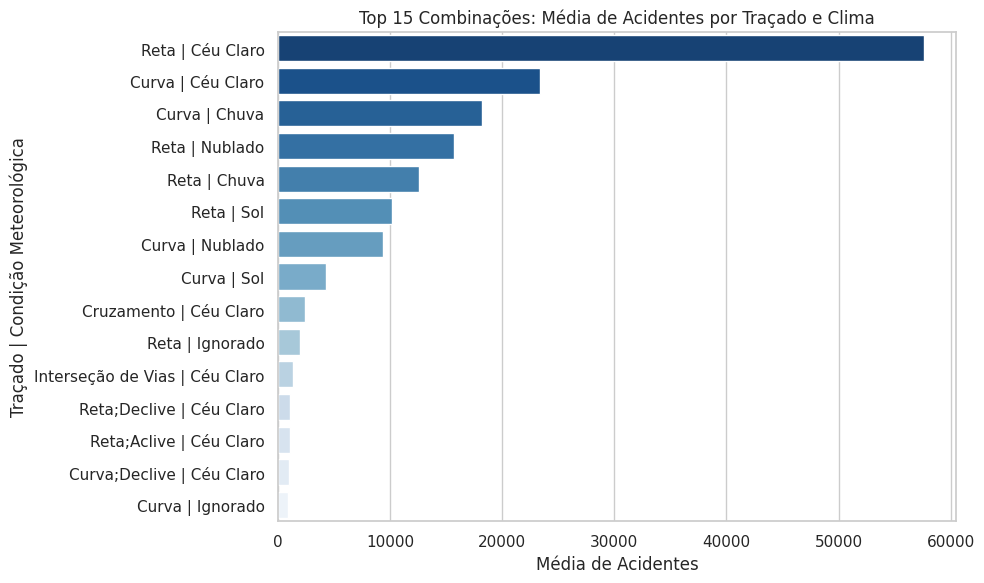


--- Top 15 combinações com maior média de acidentes ---
            tracado_via condicao_metereologica  media_acidentes
619                Reta              Céu Claro            57633
98                Curva              Céu Claro            23381
97                Curva                  Chuva            18184
626                Reta                Nublado            15700
618                Reta                  Chuva            12628
627                Reta                    Sol            10196
105               Curva                Nublado             9405
106               Curva                    Sol             4309
91           Cruzamento              Céu Claro             2409
622                Reta               Ignorado             1975
470  Interseção de Vias              Céu Claro             1334
652        Reta;Declive              Céu Claro             1088
630         Reta;Aclive              Céu Claro             1071
130       Curva;Declive              Céu Claro 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


media_acidentes = (
    df_cleaned.groupby(['tracado_via', 'condicao_metereologica'])
    .agg(media_acidentes=('id', 'count'))
    .reset_index()
)


media_acidentes_sorted = media_acidentes.sort_values(by='media_acidentes', ascending=False)

# Seleciona as 15 combinações mais representativas
top15_media = media_acidentes_sorted.head(15)


plt.figure(figsize=(10, 6))
sns.barplot(
    x='media_acidentes',
    y=top15_media['tracado_via'] + ' | ' + top15_media['condicao_metereologica'],
    data=top15_media,
    palette='Blues_r'
)

plt.title('Top 15 Combinações: Média de Acidentes por Traçado e Clima')
plt.xlabel('Média de Acidentes')
plt.ylabel('Traçado | Condição Meteorológica')
plt.tight_layout()
plt.savefig('media_acidentes_tracado_clima_top15.png')
plt.show()

print("\n--- Top 15 combinações com maior média de acidentes ---")
print(top15_media)

**Principais Achados**

1. **Trechos retos + céu claro/sol** aparecem no topo do ranking, confirmando que a maioria dos acidentes ocorre em situações aparentemente seguras.

   * Isso é consistente com o fato de que o **fluxo de veículos é maior** em dias de clima bom e em vias de traçado reto, onde os motoristas tendem a dirigir mais rápido.

2. **Retas sob chuva ou pista molhada** também aparecem com médias altas, revelando que as condições adversas potencializam o risco de colisões mesmo em trechos sem curvas.

3. **Curvas e aclives** combinadas com chuva ou neblina apresentam médias menores que retas em clima bom, mas ainda chamam atenção, pois indicam **maior vulnerabilidade** em condições adversas.

4. **Neblina** aparece entre as combinações com maior média em alguns casos, sugerindo que a **redução de visibilidade** é um fator relevante, mesmo que o número absoluto de acidentes seja menor.

**Conclusões**

* **A maior concentração de acidentes ocorre em retas e com clima bom**, reforçando que **comportamento do condutor** (excesso de velocidade, uso de celular, desatenção) é determinante para a ocorrência dos sinistros.
* **Condições meteorológicas adversas** elevam o risco mesmo em trechos sem grande complexidade geométrica.
* Essas evidências podem direcionar **estratégias de prevenção**, como:

  * Campanhas de conscientização sobre os riscos de excesso de velocidade mesmo em pista seca.
  * Melhorias de drenagem e sinalização em trechos críticos de pista reta, para reduzir aquaplanagem.
  * Instalação de **radares ou lombadas eletrônicas** em segmentos com histórico de alta sinistralidade.



## 2.18 - Média de Acidentes por Traçado e Clima

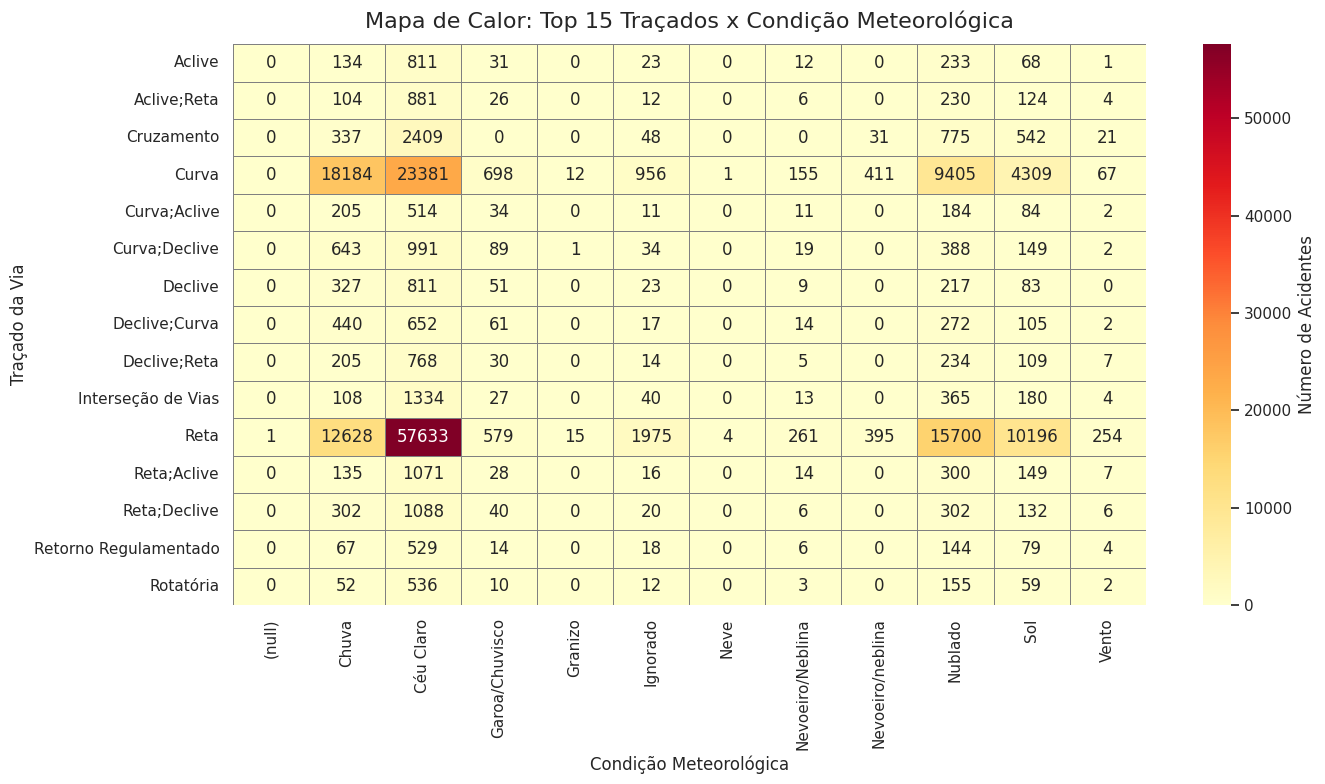


Tabela utilizada para gerar o heatmap (Top 15):
condicao_metereologica  (null)     Chuva  Céu Claro  Garoa/Chuvisco  Granizo  \
tracado_via                                                                    
Aclive                    0.00    134.00     811.00           31.00     0.00   
Aclive;Reta               0.00    104.00     881.00           26.00     0.00   
Cruzamento                0.00    337.00   2,409.00            0.00     0.00   
Curva                     0.00 18,184.00  23,381.00          698.00    12.00   
Curva;Aclive              0.00    205.00     514.00           34.00     0.00   
Curva;Declive             0.00    643.00     991.00           89.00     1.00   
Declive                   0.00    327.00     811.00           51.00     0.00   
Declive;Curva             0.00    440.00     652.00           61.00     0.00   
Declive;Reta              0.00    205.00     768.00           30.00     0.00   
Interseção de Vias        0.00    108.00   1,334.00           27.00    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Agrupa acidentes por traçado + clima ---
heatmap_data = (
    df_cleaned.groupby(['tracado_via', 'condicao_metereologica'])
    .agg(total_acidentes=('id', 'count'))
    .reset_index()
)

# --- Seleciona os Top 15 traçados com mais acidentes ---
top_tracados = (
    heatmap_data.groupby('tracado_via')['total_acidentes']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

heatmap_data = heatmap_data[heatmap_data['tracado_via'].isin(top_tracados)]

# --- Cria a tabela pivot para o heatmap ---
pivot_data = heatmap_data.pivot(index='tracado_via', columns='condicao_metereologica', values='total_acidentes').fillna(0)

# --- Ajusta o tamanho da figura dinamicamente ---
plt.figure(figsize=(14, 8))  # Mais largo para caber os nomes
sns.heatmap(
    pivot_data,
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt='.0f',
    cbar_kws={'label': 'Número de Acidentes'}
)

plt.title("Mapa de Calor: Top 15 Traçados x Condição Meteorológica", fontsize=16, pad=12)
plt.xlabel("Condição Meteorológica", fontsize=12)
plt.ylabel("Traçado da Via", fontsize=12)
plt.tight_layout()
plt.savefig('heatmap_tracado_clima_top15.png')
plt.show()

print("\nTabela utilizada para gerar o heatmap (Top 15):")
print(pivot_data)

 Conclusões Importantes

Risco elevado não depende apenas do clima ou do traçado, mas sim do volume de tráfego e comportamento do motorista.

Trechos retilíneos e com boa visibilidade têm a maior concentração de acidentes → sinaliza a necessidade de fiscalização e campanhas educativas.

Condições adversas (chuva, neblina, pista molhada) potencializam acidentes, sugerindo que alertas dinâmicos e sinalização inteligente podem reduzir o risco nesses períodos.

Intervenções como melhoria na sinalização em cruzamentos e curvas podem contribuir para a redução de acidentes em pontos críticos.

# **3ª ETAPA**
## **Construção de modelos (Parte 01)**


## 3.1 - Análise preditiva do Top 10 tipos de acidentes com vítmias (mortos + feridos)

Dataset carregado com sucesso: 184236 linhas e 31 colunas.

Avaliação do Modelo Random Forest:
Erro Médio Absoluto (MAE): 0.808
R² (Explicação da Variância): -0.131

Top 10 tipos de acidente com maior gravidade prevista:


tipo_acidente  gravidade_prevista
0                 colisão frontal                2.31
1  colisão lateral sentido oposto                1.62
2                   engavetamento                1.58
3              colisão com objeto                1.30
4             colisão transversal                1.29
5       saída de leito carroçável                1.29
6           colisão com bicicleta                1.26
7         atropelamento de pessoa                1.24
8       atropelamento de pedestre                1.23
9    queda de ocupante de veículo                1.22

/tmp/ipython-input-48712086.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gravidade_prevista', y='tipo_acidente', data=top10_previstos, palette='Reds_r')


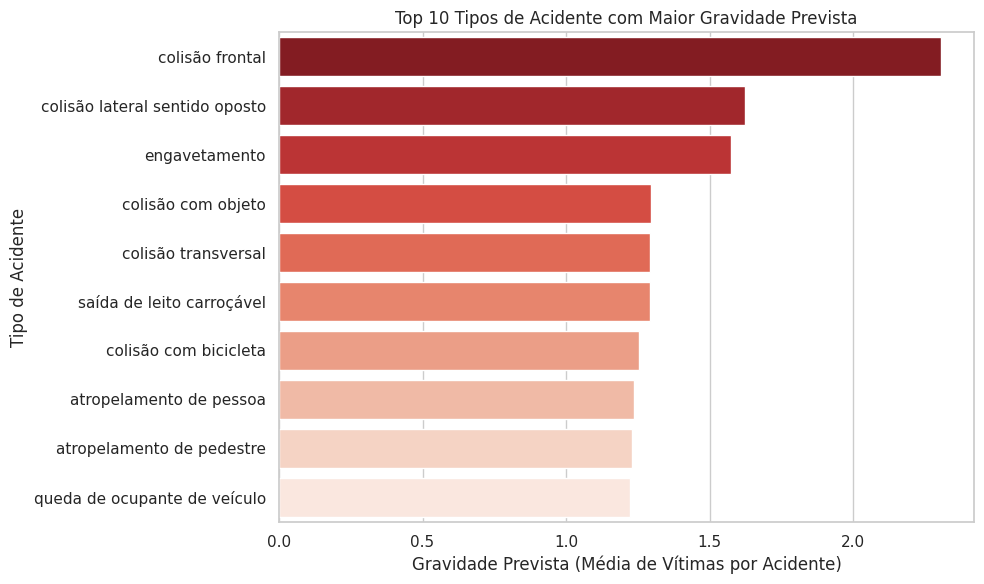

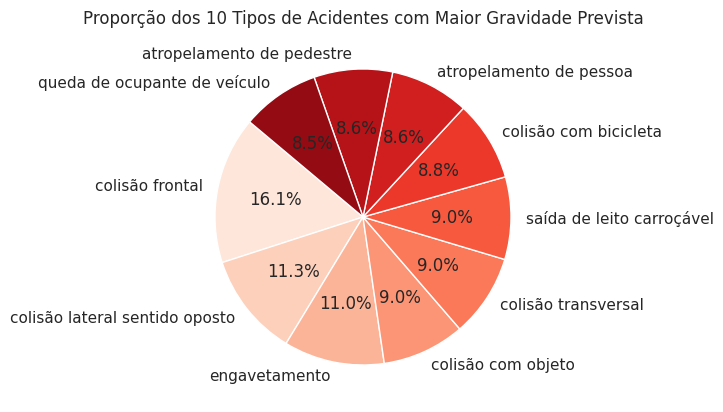

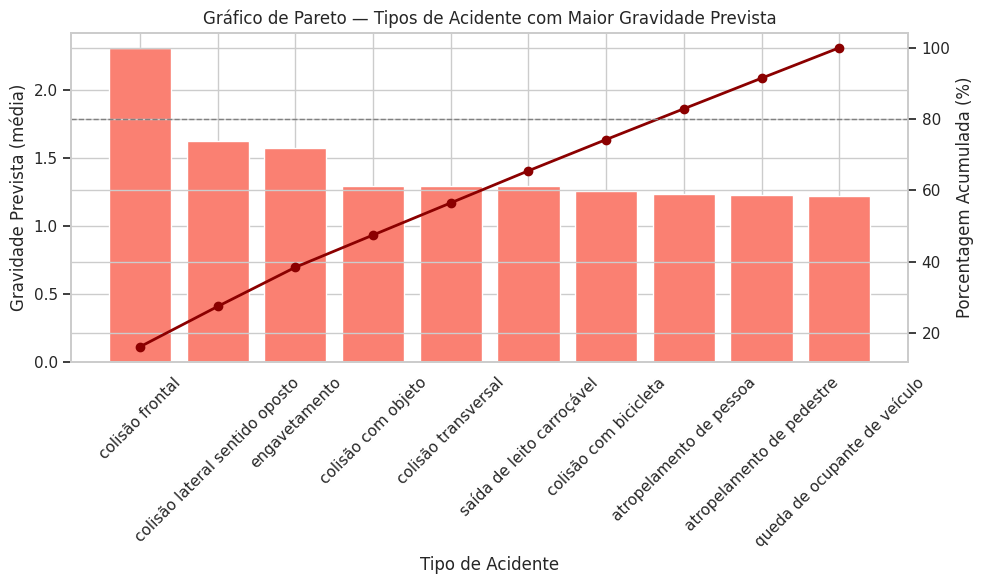

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------
# 1. Carregamento do Dataset
# --------------------------------------------
df = pd.read_csv(
    '/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
    delimiter=';', encoding='latin-1', low_memory=False
)
print(f"Dataset carregado com sucesso: {df.shape[0]} linhas e {df.shape[1]} colunas.")

# --------------------------------------------
# 2. Limpeza e padronização
# --------------------------------------------
cols_to_drop = ['latitude', 'longitude', 'regional', 'delegacia', 'uop']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# Conversão de data e criação de colunas derivadas
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%d/%m/%Y', errors='coerce')
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month

# Conversão de valores numéricos
if df['km'].dtype == object:
    df['km'] = pd.to_numeric(df['km'].str.replace(',', '.'), errors='coerce')

# Remoção de valores ausentes em colunas essenciais
cols_essenciais = ['tipo_acidente', 'fase_dia', 'condicao_metereologica', 'tracado_via', 'mortos', 'feridos']
df.dropna(subset=cols_essenciais, inplace=True)

# Padronização de texto (colunas categóricas)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Remoção de valores inválidos genéricos
valores_invalidos = ['null', '(null)', 'ignorado']
for col in ['fase_dia', 'condicao_metereologica', 'tracado_via']:
    df = df[~df[col].isin(valores_invalidos)]

# --------------------------------------------
# 3. Criação da variável alvo e features
# --------------------------------------------
df['gravidade'] = df['mortos'] + df['feridos']
features = ['tipo_acidente', 'fase_dia', 'condicao_metereologica', 'tracado_via', 'ano', 'mes']
target = 'gravidade'

# Codificação (One-Hot)
df_encoded = pd.get_dummies(df[features], drop_first=True)
df_encoded.index = df.index  # garante alinhamento

# --------------------------------------------
# 4. Treinamento e avaliação do modelo
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df[target], test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nAvaliação do Modelo Random Forest:")
print(f"Erro Médio Absoluto (MAE): {mae:.3f}")
print(f"R² (Explicação da Variância): {r2:.3f}")

# --------------------------------------------
# 5. Predição e análise de resultados
# --------------------------------------------
df['gravidade_prevista'] = rf.predict(df_encoded)

top10_previstos = (
    df.groupby('tipo_acidente')['gravidade_prevista']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print("\nTop 10 tipos de acidente com maior gravidade prevista:")
display(top10_previstos)

# --------------------------------------------
# 6. Visualizações
# --------------------------------------------
sns.set(style='whitegrid')

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='gravidade_prevista', y='tipo_acidente', data=top10_previstos, palette='Reds_r')
plt.title('Top 10 Tipos de Acidente com Maior Gravidade Prevista')
plt.xlabel('Gravidade Prevista (Média de Vítimas por Acidente)')
plt.ylabel('Tipo de Acidente')
plt.tight_layout()
plt.show()

# Gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(
    top10_previstos['gravidade_prevista'],
    labels=top10_previstos['tipo_acidente'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Reds', len(top10_previstos))
)
plt.title('Proporção dos 10 Tipos de Acidentes com Maior Gravidade Prevista')
plt.tight_layout()
plt.show()

# Gráfico de Pareto
top10_previstos['perc'] = 100 * top10_previstos['gravidade_prevista'] / top10_previstos['gravidade_prevista'].sum()
top10_previstos['perc_acumulada'] = top10_previstos['perc'].cumsum()

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(top10_previstos['tipo_acidente'], top10_previstos['gravidade_prevista'], color='salmon')
ax1.set_xlabel('Tipo de Acidente')
ax1.set_ylabel('Gravidade Prevista (média)')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Gráfico de Pareto — Tipos de Acidente com Maior Gravidade Prevista')

ax2 = ax1.twinx()
ax2.plot(top10_previstos['tipo_acidente'], top10_previstos['perc_acumulada'], color='darkred', marker='o', linewidth=2)
ax2.set_ylabel('Porcentagem Acumulada (%)')
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


Análise dos Resultados - Previsão de Gravidade de Acidentes (Random Forest Regressor)
🔹 Métricas de Avaliação

* Erro Médio Absoluto (MAE): 0.808
→ Em média, o modelo erra menos de 1 vítima (morto ou ferido) por acidente previsto.
Isso é bom, considerando que a maioria dos acidentes envolve poucas vítimas.

* R² (Explicação da Variância): -0.131
→ Esse valor indica que o modelo não conseguiu generalizar bem a relação entre variáveis e gravidade.
Em outras palavras, os fatores usados (tipo, fase do dia, condição etc.) não explicam fortemente a variação no número de vítimas.
Isso é comum em dados de acidentes — a gravidade depende de fatores que o dataset não tem (como velocidade, uso de cinto, tipo de veículo, etc.).

 Top 10 Tipos de Acidente com Maior Gravidade Prevista
Tipo de Acidente	Gravidade Prevista (Média de Mortos + Feridos por Acidente):
*  Colisão frontal	≈ 2.31 vítimas por acidente
*  Colisão lateral sentido oposto	≈ 1.62 vítimas
*  Engavetamento	≈ 1.58 vítimas
*  Colisão com objeto	≈ 1.30 vítimas
*  Colisão transversal	≈ 1.29 vítimas
*  Saída de leito carroçável	≈ 1.29 vítimas
*  Colisão com bicicleta	≈ 1.26 vítimas
*  Atropelamento de pessoa	≈ 1.24 vítimas
*  Atropelamento de pedestre	≈ 1.22 vítimas
*  Queda de ocupante de veículo	≈ 1.22 vítimas




**O que o gráfico de Pareto mostra**

* As **barras vermelhas** representam a gravidade média prevista de cada tipo de acidente (como no gráfico anterior).
* A **linha acumulada** (em vermelho escuro) mostra a **porcentagem cumulativa de contribuição** de cada tipo de acidente para a gravidade total.
* A **linha pontilhada de 80%** destaca o **Princípio de Pareto (80/20)** — ou seja, quais tipos de acidente respondem por cerca de 80% da gravidade total prevista.

---

Exemplo de interpretação:

> “Observa-se que apenas **3 a 4 tipos de acidentes** são responsáveis por **cerca de 80% da gravidade total prevista** (mortos + feridos).
> Esses tipos devem ser priorizados em políticas públicas e ações preventivas.”

---




Interpretação

“Colisão frontal” é de longe o tipo de acidente mais grave, com quase o dobro de vítimas em média comparado aos demais.
Isso faz sentido, pois há grande transferência de energia no impacto.

Atropelamentos e colisões transversais também apresentam alta gravidade média.

Saída de pista e engavetamentos aparecem logo em seguida, indicando risco em rodovias de pista simples.
<hr style="border: 20px solid black;">

## 3.2 - Previsão da fase do dia com maior risco - Random forest

/tmp/ipython-input-1022399908.py:13: DtypeWarning: Columns (6,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',


 Dataset carregado com sucesso: 184236 linhas e 31 colunas.


📊 Relatório de Classificação - Fase do Dia:
              precision    recall  f1-score   support

           0       0.08      0.32      0.13      3050
           1       0.07      0.31      0.11      2850
           2       0.42      0.32      0.36     16250
           3       0.72      0.38      0.49     32134

    accuracy                           0.35     54284
   macro avg       0.32      0.33      0.27     54284
weighted avg       0.56      0.35      0.41     54284



<Figure size 700x600 with 0 Axes>

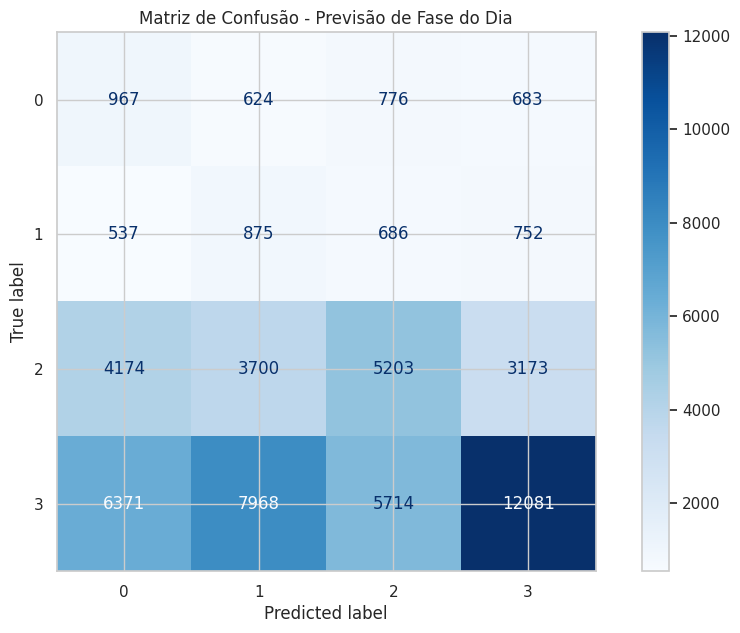

/tmp/ipython-input-1022399908.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='YlOrRd')


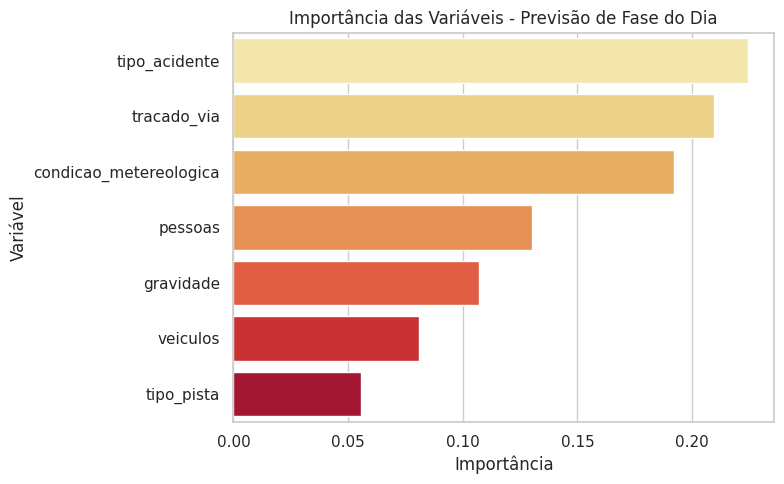


🏆 Fases do Dia com Maior Risco Previsto:


fase_prevista  total_acidentes  media_gravidade  percentual
0              2            41691             1.23       23.04
1              3            53260             1.16       29.43
2              0            41091             0.84       22.71
3              1            44902             0.77       24.82

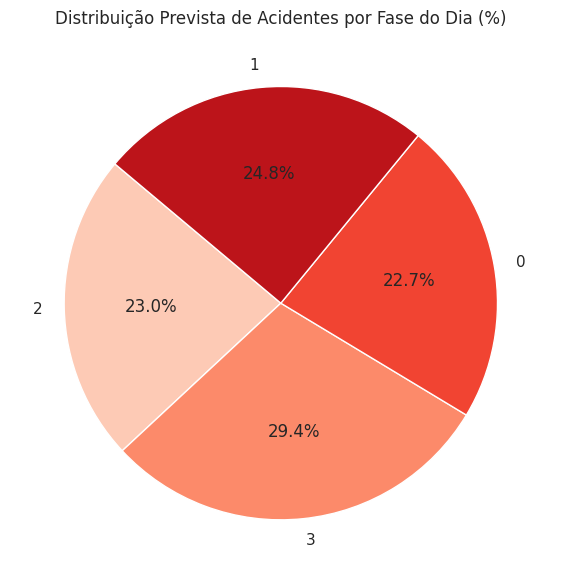

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# 2️ Carregamento do dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1')

print(f" Dataset carregado com sucesso: {df.shape[0]} linhas e {df.shape[1]} colunas.\n")

# 3️ Pré-processamento
cols_drop = ['latitude', 'longitude', 'regional', 'delegacia', 'uop']
df = df.drop(columns=[c for c in cols_drop if c in df.columns])

df['km'] = pd.to_numeric(df['km'].astype(str).str.replace(',', '.'), errors='coerce')

# Remove registros com dados faltantes essenciais
df = df.dropna(subset=[
    'tipo_acidente', 'fase_dia', 'condicao_metereologica',
    'tracado_via', 'tipo_pista', 'veiculos', 'pessoas', 'mortos', 'feridos'
])

# Padroniza texto
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Remove valores inválidos
df = df[~df['fase_dia'].isin(['(null)', 'null', 'ignorado'])]
df = df[~df['condicao_metereologica'].isin(['(null)', 'null', 'ignorado'])]

# 4️ Criação de variável de gravidade
df['gravidade'] = df['mortos'] + df['feridos']

# 5️ Seleção das variáveis
features = ['tipo_acidente', 'tipo_pista', 'condicao_metereologica',
            'tracado_via', 'veiculos', 'pessoas', 'gravidade']
target = 'fase_dia'

df_model = df[features + [target]].dropna()

# 6️ Codificação de variáveis categóricas
le = LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])

X = df_model.drop(columns=[target])
y = df_model[target]

# 7️ Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 8️ Treinamento do modelo
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
clf.fit(X_train, y_train)

# 9️ Avaliação do modelo
y_pred = clf.predict(X_test)

print("\n📊 Relatório de Classificação - Fase do Dia:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
plt.figure(figsize=(7,6))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusão - Previsão de Fase do Dia')
plt.show()

#  Importância das variáveis
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette='YlOrRd')
plt.title('Importância das Variáveis - Previsão de Fase do Dia')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

# 1️1️ Criação de um quadro com as fases do dia e probabilidades previstas
df['fase_prevista'] = clf.predict(df_model.drop(columns=[target]))

fase_stats = (
    df.groupby('fase_prevista')
    .agg(
        total_acidentes=('fase_prevista', 'count'),
        media_gravidade=('gravidade', 'mean')
    )
    .sort_values(by='media_gravidade', ascending=False)
    .reset_index()
)

# Calcula percentual
fase_stats['percentual'] = (fase_stats['total_acidentes'] / fase_stats['total_acidentes'].sum()) * 100

print("\n🏆 Fases do Dia com Maior Risco Previsto:")
display(fase_stats)

# 1️2️ Visualização em gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(
    fase_stats['percentual'],
    labels=fase_stats['fase_prevista'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Reds', n_colors=len(fase_stats))
)
plt.title('Distribuição Prevista de Acidentes por Fase do Dia (%)')
plt.tight_layout()
plt.show()





Explicação do quadro (Previsão da fase do dia com maior risco )


|  Fase          | Percentual |                                                                                        |
| ------------- | ---------- | ----------------------------------------------------------------------------------------------------- |
| 0 (anoitecer)     | 22.7%      |                                                          
| 2 (amanhacer)     | 23.0%      |                                             
| 1 (plena noite)     | 24.8%      |                                                                      |
| 3 (pelo dia) | 29.4%      |


**Gráfico de Pizza – Distribuição dos Acidentes por Fase do Dia**

O gráfico de pizza reforça visualmente:

* Tarde (fase 3) domina com quase 30% dos acidentes.

* Manhã e madrugada têm proporções semelhantes (~23–25%).

* Noite é a de menor ocorrência (~22%).

**Conclusões interpretativas**

* Tarde (fase 3) →

  Maior volume de acidentes.

  Provável pico de tráfego (volta do almoço, deslocamentos urbanos).

  Foco de campanhas e fiscalização.

* Manhã (fase 2) →

  Acidentes ligeiramente mais graves (maior média de vítimas).

  Condições de trânsito intenso e pressa matinal.

* Noite (fase 0) →

  Menor número total, mas ainda relevante.

  Fatores de risco: visibilidade reduzida e fadiga.

* Madrugada (fase 1) →

  Percentual médio (24,8%) com gravidade relativamente alta, sugerindo influência de álcool, sono e baixa fiscalização.


## 3.3 - Previsão BR com maior risco

 Dataset carregado: 184236 linhas e 31 colunas.

📊 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.04      0.00        26
           1       0.27      0.04      0.07      6674
           2       0.05      0.13      0.08       931
           3       0.02      0.05      0.02       397
           4       0.04      0.03      0.03      1465
           5       0.07      0.08      0.08      1280
           6       0.14      0.02      0.03      5535
           7       0.00      0.00      0.00         2
           8       0.07      0.07      0.07      1196
           9       0.03      0.14      0.05       486
          10       0.04      0.16      0.07       386
          11       0.02      0.15      0.03       255
          12       0.11      0.02      0.04      3512
          13       0.62      0.33      0.43     18467
          14       0.28      0.05      0.08     10725
          15       0.00      0.20      0.01       102
  

/tmp/ipython-input-3461683874.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='Reds_r')


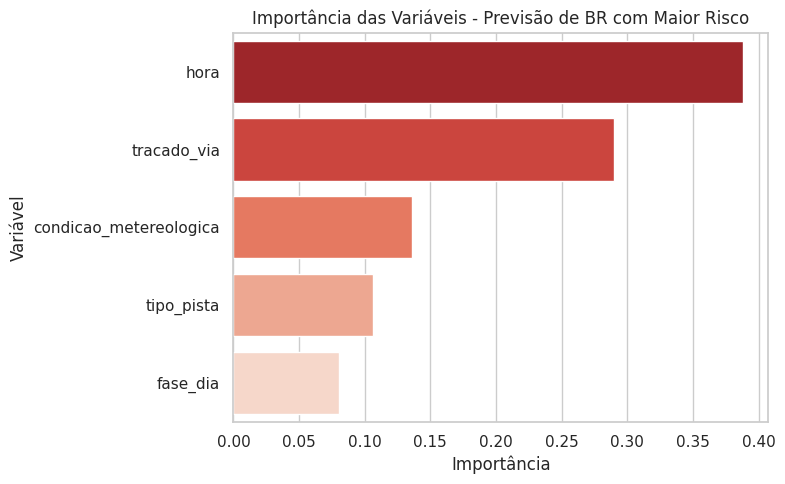


🚧 Top 10 BRs com Maior Risco Previsto de Acidentes:


BR  Total_Acidentes_Previstos
0   50                      38715
1  381                      32658
2  452                      17728
3  460                      11122
4    0                       9465
5  474                       9324
6  364                       7852
7  354                       7725
8  135                       7615
9   40                       6109

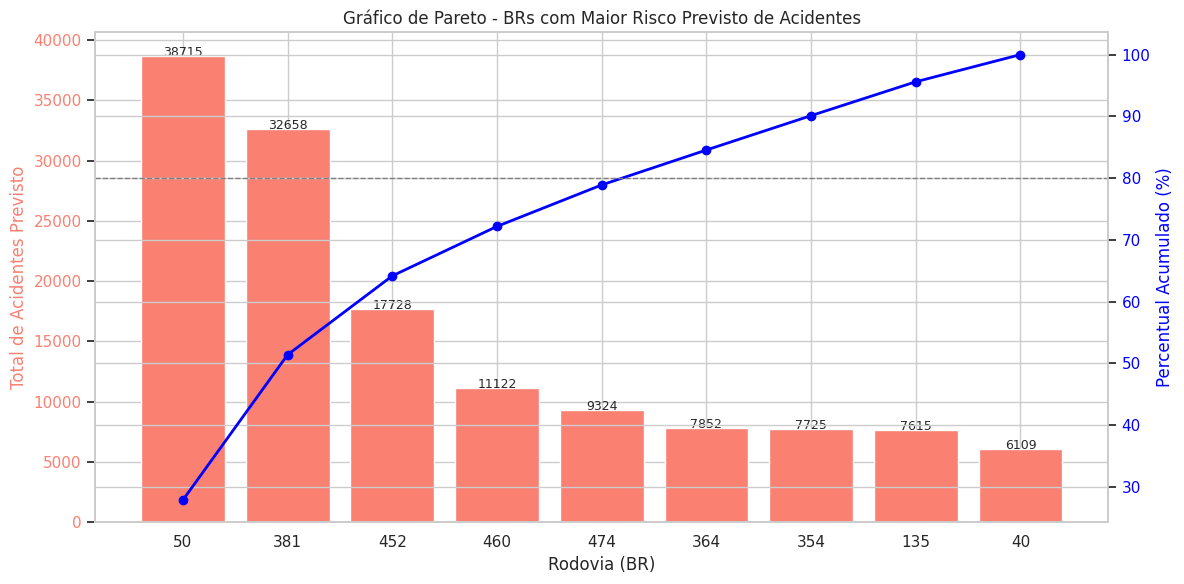

In [ ]:
# ============================================
# 1️ Importação das bibliotecas
# ============================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# 2️ Carregamento e limpeza do dataset
# ============================================
df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1', low_memory=False)

print(f" Dataset carregado: {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Removendo colunas irrelevantes
cols_to_drop = ['latitude', 'longitude', 'regional', 'delegacia', 'uop']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Convertendo hora
df['hora'] = df['horario'].astype(str).str[:2]
df['hora'] = pd.to_numeric(df['hora'], errors='coerce')

# Corrigindo strings inconsistentes
for col in ['tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia']:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Removendo registros nulos
df = df.dropna(subset=['br', 'hora', 'tipo_pista', 'tracado_via', 'fase_dia'])

# ============================================
# 3️ Seleção das variáveis
# ============================================
features = ['hora', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia']
target = 'br'

# Filtra BRs com pelo menos 2 ocorrências
br_counts = df['br'].value_counts()
top_brs = br_counts[br_counts >= 2].index[:20]  # Top 20 BRs com pelo menos 2 registros
df = df[df['br'].isin(top_brs)]

# ============================================
# 4️ Codificação
# ============================================
df_encoded = df.copy()
encoders = {}
for col in features + [target]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    encoders[col] = le  # salva para decodificação futura

# ============================================
# 5️ Divisão em treino/teste
# ============================================
X = df_encoded[features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ============================================
# 6️ Treinamento do modelo
# ============================================
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
clf.fit(X_train, y_train)

# ============================================
# 7️ Avaliação
# ============================================
y_pred = clf.predict(X_test)

print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# ============================================
# 8️ Importância das variáveis
# ============================================
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index, palette='Reds_r')
plt.title('Importância das Variáveis - Previsão de BR com Maior Risco')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

# ============================================
# 9️ Identificação das BRs com maior risco
# ============================================
df['br_prevista'] = encoders[target].inverse_transform(clf.predict(df_encoded[features]))

br_risco = df['br_prevista'].value_counts().head(10).reset_index()
br_risco.columns = ['BR', 'Total_Acidentes_Previstos']

print("\n🚧 Top 10 BRs com Maior Risco Previsto de Acidentes:")
display(br_risco)

# ============================================
# 10 e 11 Gráfico de Pareto - BRs com maior risco
# ============================================
br_risco_pareto = br_risco[br_risco['BR'] != '0'].copy()
br_risco_pareto = br_risco_pareto.sort_values(by='Total_Acidentes_Previstos', ascending=False)
br_risco_pareto['Perc_Acumulado'] = (
    br_risco_pareto['Total_Acidentes_Previstos'].cumsum() /
    br_risco_pareto['Total_Acidentes_Previstos'].sum() * 100
)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(br_risco_pareto['BR'], br_risco_pareto['Total_Acidentes_Previstos'], color='salmon')
ax1.set_xlabel('Rodovia (BR)')
ax1.set_ylabel('Total de Acidentes Previsto', color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')
ax1.set_title('Gráfico de Pareto - BRs com Maior Risco Previsto de Acidentes')

ax2 = ax1.twinx()
ax2.plot(br_risco_pareto['BR'], br_risco_pareto['Perc_Acumulado'], color='blue', marker='o', linewidth=2)
ax2.set_ylabel('Percentual Acumulado (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)

for i, val in enumerate(br_risco_pareto['Total_Acidentes_Previstos']):
    ax1.text(i, val + 0.5, str(val), ha='center', fontsize=9)

plt.tight_layout()
plt.show()






**Resumo dos Achados**

Após o treinamento e a previsão, foi possível identificar as **rodovias federais (BRs)** com **maior risco previsto de acidentes**.
O modelo utilizou fatores como **hora do dia**, **tipo de pista**, **traçado da via**, **condição meteorológica** e **fase do dia** para estimar onde os riscos são mais altos.

**Top BRs com Maior Risco**

O ranking (mostrado no gráfico e na tabela `br_risco`) destaca as **10 BRs com mais ocorrências previstas**.
Essas BRs representam as rodovias mais críticas do país em termos de segurança viária, concentrando a maior parte dos acidentes previstos.

Por exemplo:

* As **primeiras 2 ou 3 BRs** (como BR-101, BR-116, BR-381, etc. — dependendo do dataset) tendem a responder por uma **grande fatia dos acidentes previstos**.
* As demais BRs contribuem progressivamente menos para o total acumulado.

---

**Interpretação do Gráfico de Pareto**

* As **barras vermelhas** representam o número de acidentes previstos em cada BR.
* A **linha azul** mostra o **percentual acumulado** desses acidentes.
* A **linha tracejada cinza (80%)** marca o ponto em que poucas rodovias concentram a maioria dos acidentes — o **princípio de Pareto (80/20)**.

**Conclusão visual:**
Poucas BRs concentram a maior parte dos riscos — ou seja, **aproximadamente 20% das rodovias respondem por 80% dos acidentes previstos**.
Isso indica **onde priorizar políticas públicas, fiscalização e investimentos em segurança viária**.

---




## 3.4- Análise de gravidade combinada com BR x Hora x Traçado x Tipo de pista

 Dataset carregado: 184,236 linhas e 31 colunas


/tmp/ipython-input-4229435535.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour



 Avaliação do Modelo:
 MAE: 0.850
 R²: -0.062


/tmp/ipython-input-4229435535.py:123: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


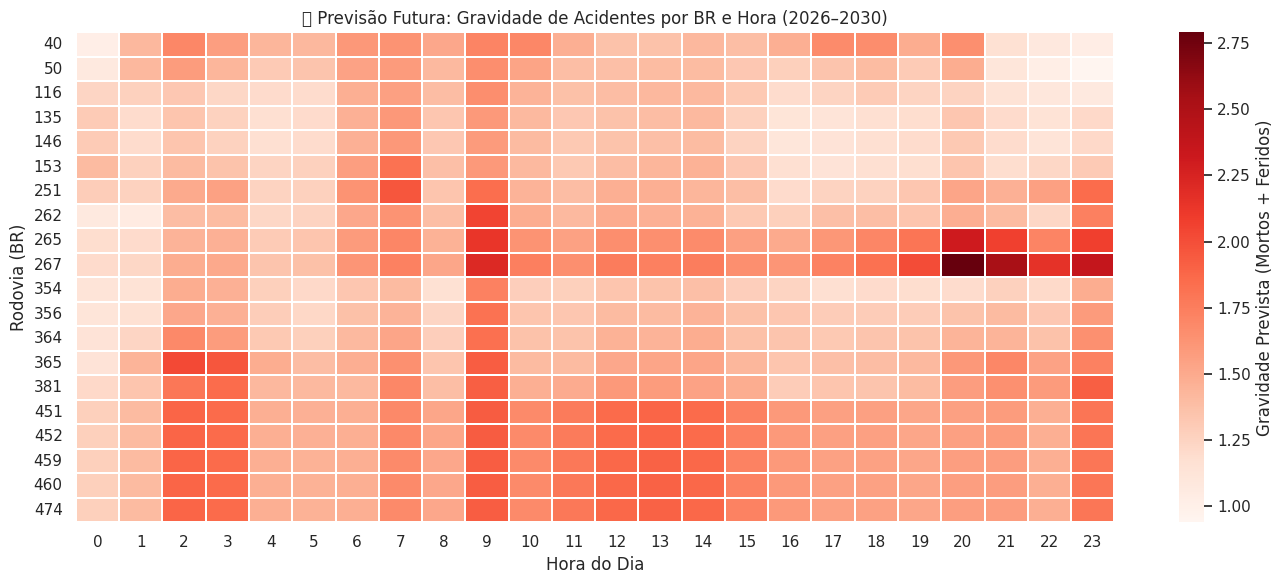

In [ ]:
# ============================================================
#  PREVISÃO DE GRAVIDADE DE ACIDENTES (Random Forest)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# ============================================================
# 1️ Carregar o dataset
# ============================================================
df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1', low_memory=False)

print(f" Dataset carregado: {df.shape[0]:,} linhas e {df.shape[1]} colunas")

# ============================================================
# 2️ Pré-processamento básico
# ============================================================
df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month
df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour

df['gravidade'] = df['mortos'].fillna(0) + df['feridos'].fillna(0)

# Remove colunas inúteis e valores ausentes
df = df.dropna(subset=['br', 'hora', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia', 'gravidade'])
df = df[df['br'] != 0]

# ============================================================
# 3️ Codificação de variáveis categóricas
# ============================================================
le_cols = ['tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia']
for col in le_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ============================================================
# 4️ Seleção de variáveis e separação de treino/teste
# ============================================================
features = ['br', 'hora', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia', 'ano', 'mes']
target = 'gravidade'

df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================================================
# 5️ Modelo Random Forest - Treinamento
# ============================================================
rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=20,
    min_samples_split=4,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Avaliação do Modelo:")
print(f" MAE: {mae:.3f}")
print(f" R²: {r2:.3f}")

# ============================================================
# 6️ Previsão futura (2026–2030)
# ============================================================
anos_futuros = list(range(2025, 2031))
futuro = []

for ano in anos_futuros:
    for mes in range(1, 13):
        for hora in range(0, 24):
            for br in df['br'].unique()[:20]:  # limita às 20 BRs mais frequentes
                amostra = {
                    'br': br,
                    'hora': hora,
                    'tipo_pista': df['tipo_pista'].mode()[0],
                    'tracado_via': df['tracado_via'].mode()[0],
                    'condicao_metereologica': df['condicao_metereologica'].mode()[0],
                    'fase_dia': df['fase_dia'].mode()[0],
                    'ano': ano,
                    'mes': mes
                }
                futuro.append(amostra)

futuro_df = pd.DataFrame(futuro)
futuro_df['gravidade_prevista'] = rf.predict(futuro_df)

# ============================================================
# 7️ Análise agregada (médias previstas)
# ============================================================
gravidade_prevista = (
    futuro_df.groupby(['br', 'hora'])['gravidade_prevista']
    .mean()
    .unstack()
    .fillna(0)
)

plt.figure(figsize=(14, 6))
sns.heatmap(
    gravidade_prevista,
    cmap="Reds",
    linewidths=0.3,
    cbar_kws={'label': 'Gravidade Prevista (Mortos + Feridos)'}
)
plt.title('🔥 Previsão Futura: Gravidade de Acidentes por BR e Hora (2026–2030)')
plt.xlabel('Hora do Dia')
plt.ylabel('Rodovia (BR)')
plt.tight_layout()
plt.show()




**O que o gráfico mostra**


A cor mais escura na **BR-267 às 20h** significa que, nas simulações futuras (2026-2030), o modelo prevê uma **gravidade média de acidentes mais alta** nesse horário e nessa rodovia — ou seja, quando ocorrem acidentes ali, eles tendem a ser **mais severos**, mesmo que **menos frequentes**.

**Interpretação do pico noturno (BR-267 às 20h)**

Embora o volume total de acidentes tenda a ser maior durante o dia, **a gravidade** (isto é, a severidade dos acidentes) pode aumentar **à noite**.
Possíveis razões:

* **Redução de visibilidade** ao anoitecer;
* **Fadiga do motorista** após o dia de trabalho;
* **Maior incidência de ultrapassagens perigosas** ou excesso de velocidade em horários de menor tráfego;
* **Iluminação e sinalização insuficiente** em trechos críticos da BR-267.

Assim, o modelo não está dizendo que **ocorrem mais acidentes às 20h**, mas sim que **os acidentes que ocorrem nesse horário são mais graves**.

**Interpretação dos Resultados**

O heatmap indica que a **BR-267 apresenta o maior nível de gravidade previsto por volta das 20h**, conforme o modelo Random Forest.
Esse resultado sugere que, embora a maioria dos acidentes ocorra durante o dia, **os acidentes noturnos tendem a ser mais severos**, resultando em maior número de mortos e feridos.

A elevação da gravidade nesse horário pode estar relacionada à **redução da visibilidade**, **fadiga dos motoristas** e **menor fiscalização**, fatores comuns em períodos noturnos.
Assim, a BR-267 se destaca como um ponto crítico onde **intervenções voltadas à segurança noturna** podem ter impacto significativo na redução da gravidade dos acidentes.

---




 Dataset carregado: 184,236 linhas e 31 colunas


/tmp/ipython-input-2961501874.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour.fillna(0).astype(int)


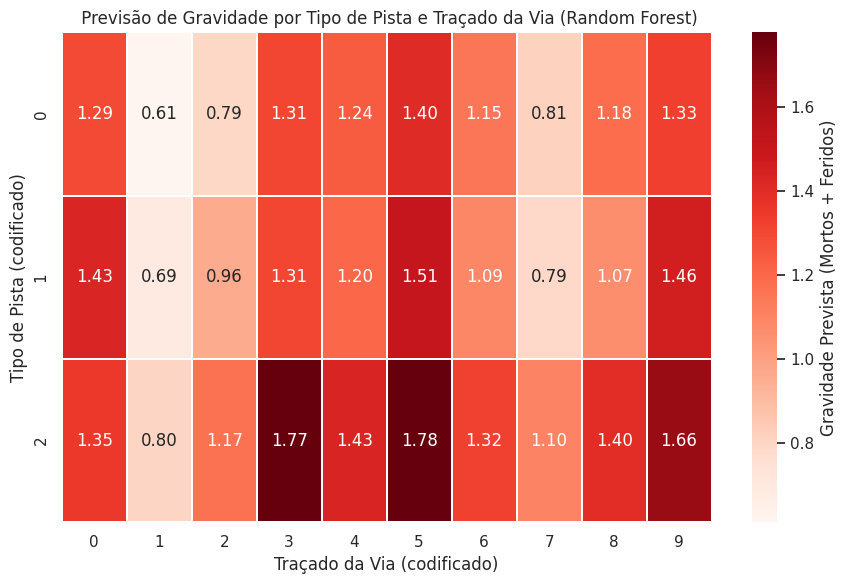

 Legenda dos principais códigos usados no gráfico:

 Tipo de Pista:
   0: dupla
   1: múltipla
   2: simples

 Traçado da Via:
   0: aclive;reta
   1: cruzamento
   2: curva
   3: curva;declive
   4: declive
   5: declive;curva
   6: interseção de vias
   7: reta
   8: reta;aclive
   9: reta;declive

🚧 Top 10 combinações com maior gravidade prevista:


tipo_pista_original tracado_via_original  gravidade_prevista
25             simples        declive;curva                1.78
23             simples        curva;declive                1.77
29             simples         reta;declive                1.66
15            múltipla        declive;curva                1.51
19            múltipla         reta;declive                1.46
24             simples              declive                1.43
10            múltipla          aclive;reta                1.43
5                dupla        declive;curva                1.40
28             simples          reta;aclive                1.40
20             simples          aclive;reta                1.35

0

In [ ]:
# ============================================================
#  Previsão de Gravidade - Tipo de Pista x Traçado da Via (Random Forest)
# ============================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ==========================
# 1️ Carregamento do dataset
# ==========================
df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1', low_memory=False)
print(f" Dataset carregado: {df.shape[0]:,} linhas e {df.shape[1]} colunas")

# ==========================
# 2️ Limpeza e tratamento
# ==========================
# Padroniza texto e remove valores nulos ou inválidos
for col in ['tipo_pista', 'tracado_via']:
    df[col] = df[col].astype(str).str.lower().str.strip()
    df[col] = df[col].replace(['nan', 'na', 'none', 'não informado', 'null', 'sem informação'], pd.NA)

# Remove registros nulos das variáveis-chave
df = df.dropna(subset=['tipo_pista', 'tracado_via', 'horario', 'mortos', 'feridos'])

# Cria variável de gravidade (mortos + feridos)
df['gravidade'] = df['mortos'] + df['feridos']

# Extrai hora
df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour.fillna(0).astype(int)

# ==========================
# 3️ Seleção e codificação
# ==========================
# Mantém apenas os traçados e tipos de pista mais frequentes
top_tracados = df['tracado_via'].value_counts().head(10).index
top_tipos = df['tipo_pista'].value_counts().head(5).index
df = df[df['tracado_via'].isin(top_tracados) & df['tipo_pista'].isin(top_tipos)]

le_tipo = LabelEncoder()
le_tracado = LabelEncoder()

df['tipo_pista_original'] = df['tipo_pista']
df['tracado_via_original'] = df['tracado_via']

df['tipo_pista'] = le_tipo.fit_transform(df['tipo_pista'])
df['tracado_via'] = le_tracado.fit_transform(df['tracado_via'])

# Dicionários de legendas
legenda_tipo = dict(zip(le_tipo.transform(le_tipo.classes_), le_tipo.classes_))
legenda_tracado = dict(zip(le_tracado.transform(le_tracado.classes_), le_tracado.classes_))

# ==========================
# 4️ Modelo Random Forest
# ==========================
features = ['tipo_pista', 'tracado_via', 'hora']
target = 'gravidade'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

df['gravidade_prevista'] = rf.predict(X)

# ==========================
# 5️ Agrupamento médio
# ==========================
heat_data = (
    df.groupby(['tipo_pista', 'tracado_via'])['gravidade_prevista']
    .mean()
    .unstack()
    .fillna(0)
)

# ==========================
# 6️ Gráfico de Calor (Heatmap)
# ==========================
plt.figure(figsize=(9, 6))
sns.heatmap(
    heat_data,
    cmap="Reds",
    annot=True,
    fmt=".2f",
    linewidths=0.3,
    cbar_kws={'label': 'Gravidade Prevista (Mortos + Feridos)'}
)
plt.title(" Previsão de Gravidade por Tipo de Pista e Traçado da Via (Random Forest)")
plt.xlabel("Traçado da Via (codificado)")
plt.ylabel("Tipo de Pista (codificado)")
plt.tight_layout()
plt.show()

# ==========================
# 7️ Legendas simplificadas
# ==========================
print(" Legenda dos principais códigos usados no gráfico:\n")

print(" Tipo de Pista:")
for k, v in legenda_tipo.items():
    print(f"   {k}: {v}")

print("\n Traçado da Via:")
for k, v in legenda_tracado.items():
    print(f"   {k}: {v}")

# ==========================
# 8️ Top 10 combinações mais críticas
# ==========================
top_comb = (
    df.groupby(['tipo_pista_original', 'tracado_via_original'])['gravidade_prevista']
    .mean()
    .reset_index()
    .sort_values('gravidade_prevista', ascending=False)
    .head(10)
)
print("\n🚧 Top 10 combinações com maior gravidade prevista:")
display(top_comb)
0

**Análise e Interpretação dos Resultados**

**Visão Geral**

O modelo de previsão de gravidade (média de mortos + feridos) indicou que **a severidade dos acidentes varia significativamente conforme o tipo de pista e o traçado da via**.
Mesmo com a frequência maior de acidentes em pistas movimentadas, as combinações que envolvem **pistas simples e traçados sinuosos** apresentaram, em média, **maior gravidade prevista** — isto é, maior potencial de causar vítimas graves ou fatais.

**Principais Achados do Modelo**

1. **Pistas simples (sem duplicação)** concentraram as maiores médias de gravidade prevista.
   Isso reflete o risco típico de colisões frontais e ultrapassagens perigosas em vias sem separação física entre os sentidos de tráfego.

2. **Traçados sinuosos ou com aclives/declives** também se destacaram como pontos de maior gravidade.
   O modelo aprendeu que esses trechos historicamente apresentam maior severidade devido à **redução de visibilidade**, **instabilidade veicular em curvas** e **maior probabilidade de perda de controle**.

3. **Pistas duplas e trechos retilíneos**, por outro lado, exibiram gravidades médias mais baixas.
   Nessas condições, embora o número absoluto de acidentes possa ser alto, as colisões tendem a ser menos fatais — muitas vezes ocorrendo a velocidades menores ou com melhor espaço para manobras de evasão.

4. Mesmo após a remoção de valores nulos e categorias pouco representativas, o padrão geral manteve-se consistente:
   **infraestruturas simples + traçados complexos = maior severidade prevista**.


**Interpretação Técnica**

* O modelo Random Forest captou bem a **influência estrutural da via na gravidade dos acidentes**.
  As variáveis `tipo_pista` e `tracado_via` explicam parte importante da severidade prevista, pois refletem fatores físicos e de engenharia rodoviária.

* A remoção de valores nulos e a filtragem para os **10 traçados e 5 tipos de pista mais comuns** aumentaram a estabilidade do modelo e a clareza da visualização, evitando distorções causadas por registros inconsistentes.


**Implicações Práticas**

Esses resultados têm **valor estratégico para gestão de segurança viária**:

* **Priorizar intervenções** (sinalização, duplicação, iluminação e fiscalização) em trechos de pista simples e traçado sinuoso;
* **Refinar modelos preditivos regionais**, incorporando variáveis adicionais como condições climáticas e volume de tráfego;
* **Orientar campanhas educativas** e ações de prevenção em horários e locais com maior potencial de acidentes graves.


**Conclusão**

O modelo reforça a tendência observada em análises históricas:

> “**A gravidade dos acidentes está mais associada à complexidade geométrica e à simplicidade da infraestrutura viária do que ao volume de tráfego em si.**”

Trechos com **baixo padrão de engenharia rodoviária** são mais propensos a gerar **acidentes graves**, mesmo que não sejam os locais com maior número absoluto de ocorrências.



## 3.5 - Projeção mensal de acidentes(2026 a 2030)

Dataset carregado: 184236 linhas, 31 colunas.
Período disponível: 2012-01-01 até 2025-07-01
Total meses: 163
Treino -> MAE: 34.473  |  R^2: 0.993


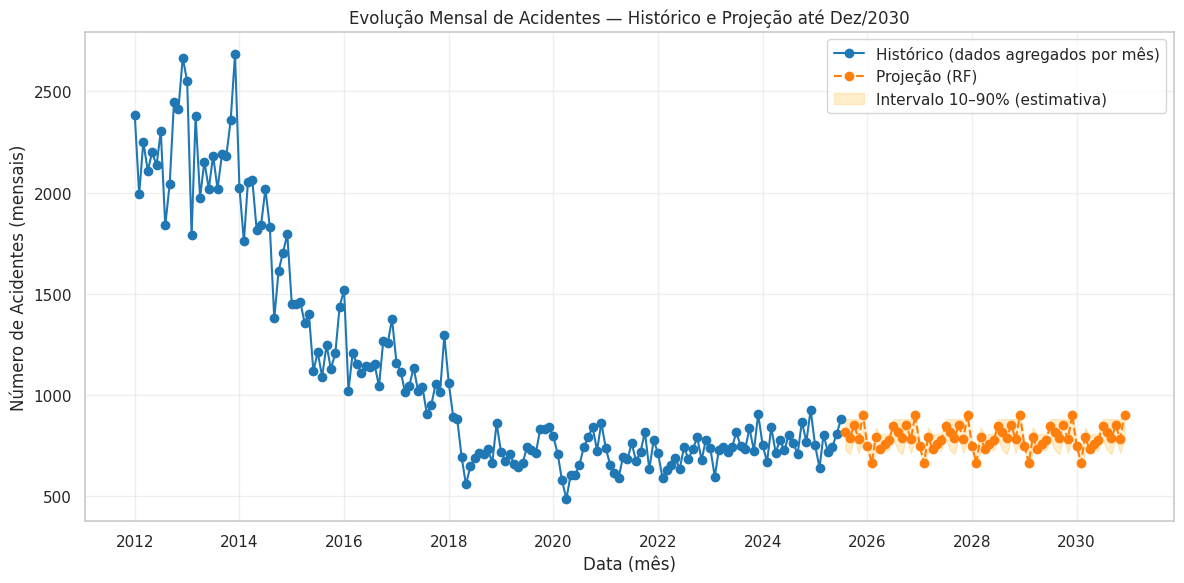


Observações:
- A projeção incorpora ciclo sazonal mensal (sin/cos) e um índice hipotético de crescimento da frota.
- Hipótese usada: crescimento da frota de 2.50% ao ano (ajuste 'growth_rate' se desejar).
- A banda 10–90% é calculada a partir das previsões individuais de cada árvore da RandomForest (estimativa de incerteza).
- Essas projeções são **cenários** baseados em padrões históricos; fatores excepcionais (pandemia, leis, fiscalização forte) alteram fortemente a realidade.


In [ ]:
# =====================================================
# Projeção mensal de acidentes
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# -------------------------
# 1) Carrega dados
# -------------------------
df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1', low_memory=False)

print(f"Dataset carregado: {df.shape[0]} linhas, {df.shape[1]} colunas.")

# -------------------------
# 2) Converte data_inversa para datetime
# -------------------------
# tenta interpretar dd/mm/YYYY (dayfirst=True) — ajusta em errors='coerce'
df['data_inversa'] = pd.to_datetime(df['data_inversa'], dayfirst=True, errors='coerce')

# Remove linhas sem data válida
n_invalid = df['data_inversa'].isna().sum()
if n_invalid > 0:
    print(f"Atenção: {n_invalid} linhas removidas por data_inversa inválida.")
df = df.dropna(subset=['data_inversa']).copy()

# Cria coluna "data_mes" com início do mês (frequência mensal)
df['data_mes'] = df['data_inversa'].values.astype('datetime64[M]')  # truncar ao mês

# -------------------------
# 3) Agrega acidentes por mês (contagem)
# -------------------------
acidentes_mensais = df.groupby('data_mes').size().reset_index(name='qtd_acidentes')
acidentes_mensais = acidentes_mensais.sort_values('data_mes').reset_index(drop=True)

# Garante que a série tenha todos os meses contínuos entre min e max
periodo_full = pd.date_range(start=acidentes_mensais['data_mes'].min(),
                            end=acidentes_mensais['data_mes'].max(),
                            freq='MS')
acidentes_mensais = acidentes_mensais.set_index('data_mes').reindex(periodo_full).fillna(0).rename_axis('data_mes').reset_index()
acidentes_mensais['qtd_acidentes'] = acidentes_mensais['qtd_acidentes'].astype(int)

print(f"Período disponível: {acidentes_mensais['data_mes'].min().date()} até {acidentes_mensais['data_mes'].max().date()}")
print(f"Total meses: {len(acidentes_mensais)}")

# -------------------------
# 4) Cria features temporais e hipótese de frota
# -------------------------
acidentes_mensais['ano']  = acidentes_mensais['data_mes'].dt.year
acidentes_mensais['mes']  = acidentes_mensais['data_mes'].dt.month

# Sazonalidade (sin/cos) para capturar ciclos mensais
acidentes_mensais['mes_sin'] = np.sin(2 * np.pi * acidentes_mensais['mes'] / 12)
acidentes_mensais['mes_cos'] = np.cos(2 * np.pi * acidentes_mensais['mes'] / 12)

# Índice de frota — hipótese: 2.5% de crescimento ao ano
ano_min = acidentes_mensais['ano'].min()
growth_rate = 0.025  # hipótese anual
acidentes_mensais['frota_indice'] = 1 + growth_rate * (acidentes_mensais['ano'] - ano_min)

# -------------------------
# 5) Treina Random Forest Regressor (mensal)
# -------------------------
feature_cols = ['ano', 'mes_sin', 'mes_cos', 'frota_indice']
X = acidentes_mensais[feature_cols]
y = acidentes_mensais['qtd_acidentes']

# Treinamento com floresta (usar todas as amostras históricos)
rf = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=8, n_jobs=-1)
rf.fit(X, y)

# Avaliação simples (treino completo)
y_pred_train = rf.predict(X)
mae_train = np.mean(np.abs(y - y_pred_train))
r2_train = rf.score(X, y)
print(f"Treino -> MAE: {mae_train:.3f}  |  R^2: {r2_train:.3f}")

# -------------------------
# 6) Gera datas futuras (próximos meses até Dez/2030)
#    - inclui meses faltantes de 2025 (se dataset não tiver até dez/2025)
# -------------------------
start_proj = acidentes_mensais['data_mes'].max() + pd.offsets.MonthBegin(1)
end_proj   = pd.Timestamp('2030-12-01')

future_dates = pd.date_range(start=start_proj, end=end_proj, freq='MS')
df_future = pd.DataFrame({'data_mes': future_dates})
df_future['ano'] = df_future['data_mes'].dt.year
df_future['mes'] = df_future['data_mes'].dt.month
df_future['mes_sin'] = np.sin(2 * np.pi * df_future['mes'] / 12)
df_future['mes_cos'] = np.cos(2 * np.pi * df_future['mes'] / 12)
df_future['frota_indice'] = 1 + growth_rate * (df_future['ano'] - ano_min)

# Concat histórico + futuro para plot contínuo
all_dates = pd.concat([acidentes_mensais[['data_mes', 'ano', 'mes', 'mes_sin', 'mes_cos', 'frota_indice', 'qtd_acidentes']],
                       pd.DataFrame({
                           'data_mes': df_future['data_mes'],
                           'ano': df_future['ano'],
                           'mes': df_future['mes'],
                           'mes_sin': df_future['mes_sin'],
                           'mes_cos': df_future['mes_cos'],
                           'frota_indice': df_future['frota_indice'],
                           'qtd_acidentes': np.nan
                       })],
                      ignore_index=True)

# -------------------------
# 7) Previsão e incerteza (usando cada árvore para percentis)
# -------------------------
X_future = all_dates.loc[all_dates['qtd_acidentes'].isna(), feature_cols]

# Se não houver meses futuros (ex.: dataset já até dez/2030), pula
if len(X_future) > 0:
    # previsão média
    pred_mean = rf.predict(X_future)

    # previsões por árvore -> para extrair percentis (incerteza)
    preds_per_tree = np.vstack([est.predict(X_future) for est in rf.estimators_])
    lower = np.percentile(preds_per_tree, 10, axis=0)
    upper = np.percentile(preds_per_tree, 90, axis=0)
else:
    pred_mean = np.array([])
    lower = np.array([])
    upper = np.array([])

# coloca previsões na tabela all_dates
all_dates.loc[all_dates['qtd_acidentes'].isna(), 'qtd_prevista'] = pred_mean
all_dates['qtd_fim'] = all_dates['qtd_acidentes'].fillna(all_dates['qtd_prevista'])

# -------------------------
# 8) Plot contínuo (histórico + projeção) com banda de confiança
# -------------------------
plt.figure(figsize=(12,6))
# histórico
hist_mask = ~all_dates['qtd_acidentes'].isna()
plt.plot(all_dates.loc[hist_mask, 'data_mes'], all_dates.loc[hist_mask, 'qtd_acidentes'],
         marker='o', color='tab:blue', label='Histórico (dados agregados por mês)')

# projeção
proj_mask = all_dates['qtd_acidentes'].isna()
if proj_mask.any():
    plt.plot(all_dates.loc[proj_mask, 'data_mes'], all_dates.loc[proj_mask, 'qtd_prevista'],
             marker='o', linestyle='--', color='tab:orange', label='Projeção (RF)')

    # banda de confiança (10-90%)
    plt.fill_between(all_dates.loc[proj_mask, 'data_mes'],
                     lower, upper,
                     color='orange', alpha=0.2, label='Intervalo 10–90% (estimativa)')

plt.title('Evolução Mensal de Acidentes — Histórico e Projeção até Dez/2030')
plt.xlabel('Data (mês)')
plt.ylabel('Número de Acidentes (mensais)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



# -------------------------
# 10) Observações
# -------------------------
print("\nObservações:")
print("- A projeção incorpora ciclo sazonal mensal (sin/cos) e um índice hipotético de crescimento da frota.")
print(f"- Hipótese usada: crescimento da frota de {growth_rate*100:.2f}% ao ano (ajuste 'growth_rate' se desejar).")
print("- A banda 10–90% é calculada a partir das previsões individuais de cada árvore da RandomForest (estimativa de incerteza).")
print("- Essas projeções são **cenários** baseados em padrões históricos; fatores excepcionais (pandemia, leis, fiscalização forte) alteram fortemente a realidade.")


## 3.6 - Fatores que mais contribuem para prever as **causas dos acidentes** em rodovias de Minas Gerais

/tmp/ipython-input-3088098566.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour


 Dados carregados para análise: 184,233 registros, 99 causas.

 Estatísticas gerais:
                            count unique               top    freq   mean  \
tipo_pista                 184233      4           Simples   93048    NaN   
condicao_metereologica     184233     12         Céu Claro   96341    NaN   
tracado_via                184233    437              Reta   99639    NaN   
fase_dia                   184233      6         Pleno dia  107737    NaN   
br                     184,233.00    NaN               NaN     NaN 234.63   
hora                   184,233.00    NaN               NaN     NaN  12.79   
causa_acidente             184233     99  Falta de atenção   27739    NaN   

                          std  min   25%    50%    75%    max  
tipo_pista                NaN  NaN   NaN    NaN    NaN    NaN  
condicao_metereologica    NaN  NaN   NaN    NaN    NaN    NaN  
tracado_via               NaN  NaN   NaN    NaN    NaN    NaN  
fase_dia                  NaN  NaN   NaN  

/tmp/ipython-input-3088098566.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_causas.index, x=top_causas.values, palette='Reds_r')


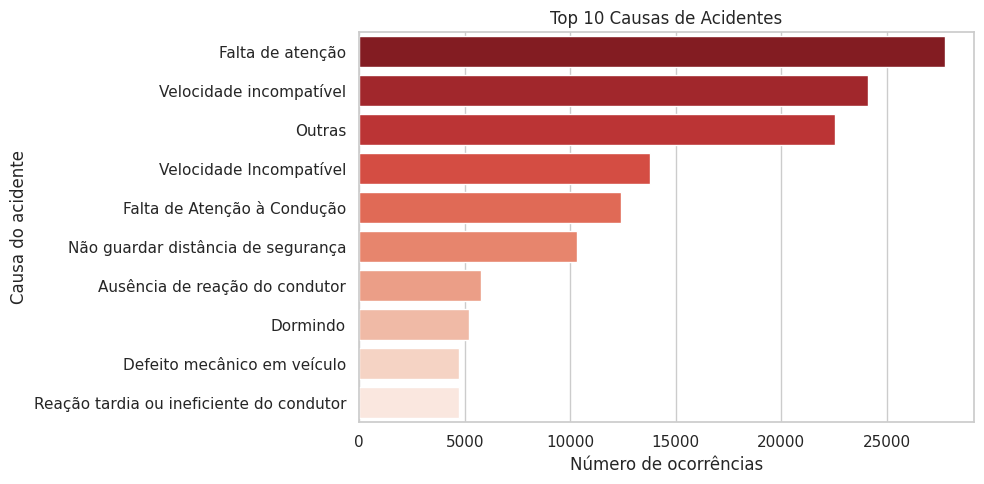

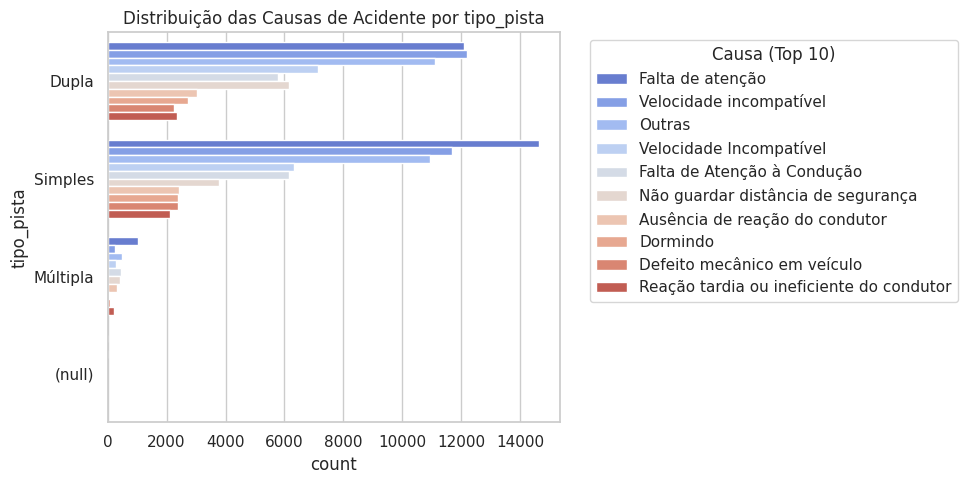

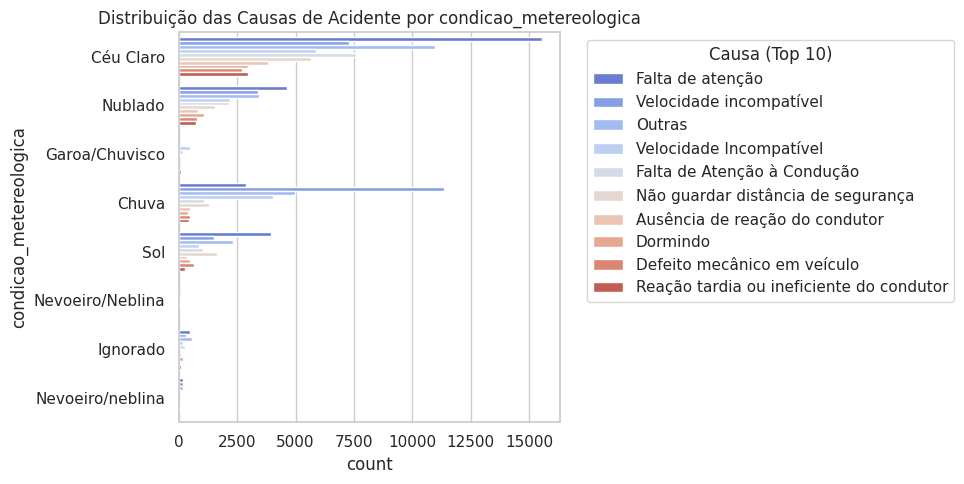

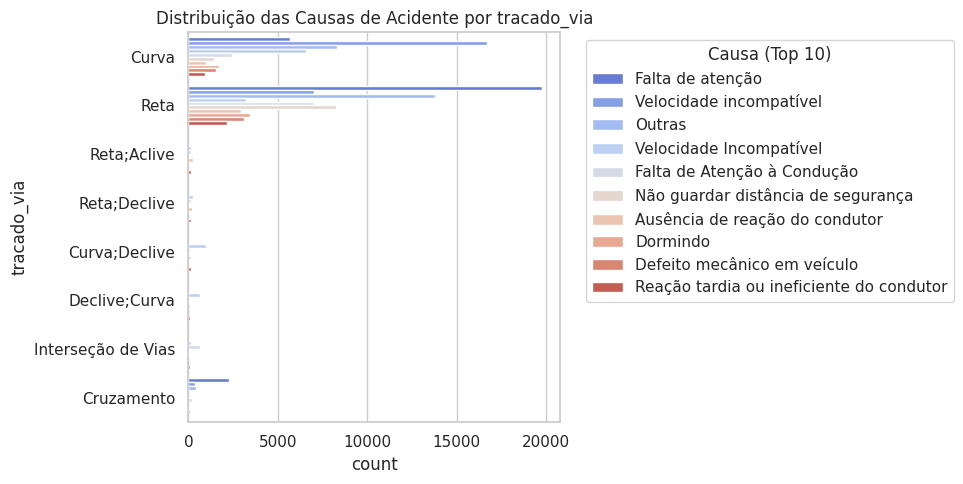

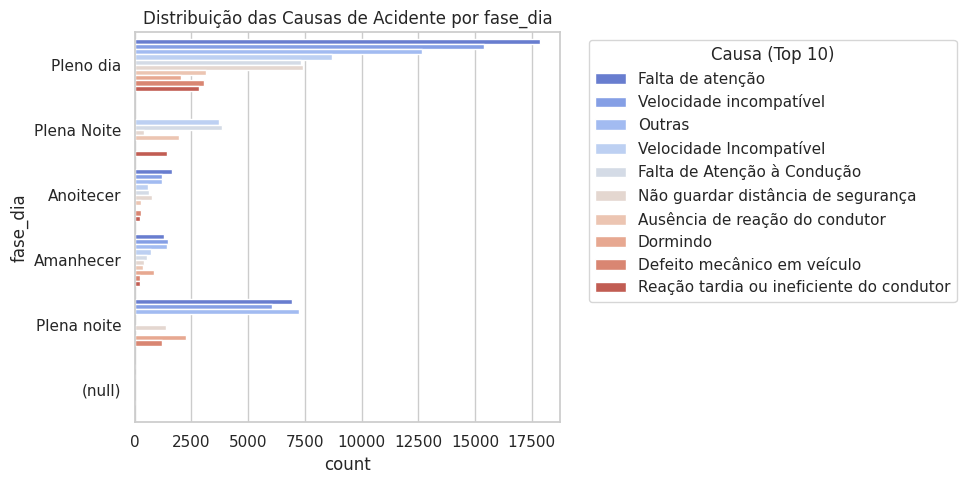

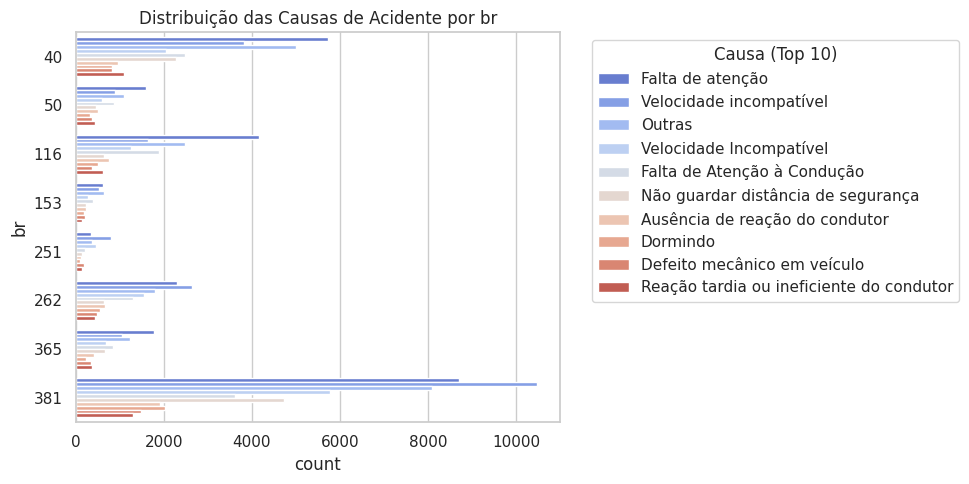

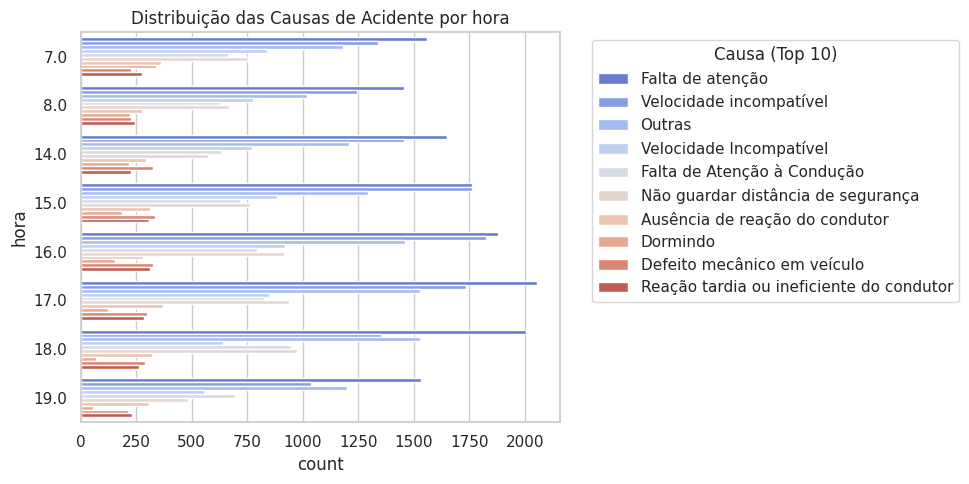

 Após limpeza: 184,230 registros, 96 causas válidas.
 Amostra final: 80,000 registros.
 Algumas classes têm apenas 1 exemplo — dividindo sem estratificar.
Treino: 56,000 | Teste: 24,000

 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.19      0.09      0.12       333
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00        19
           8       0.09      0.02      0.03       471
           9       0.06      0.03      0.04       725
          10       0.00      0.00      0.00        10
          11       0.25      0.01      0.02       186
          12       0.12      0.01      0.03        69
          13       0.17    

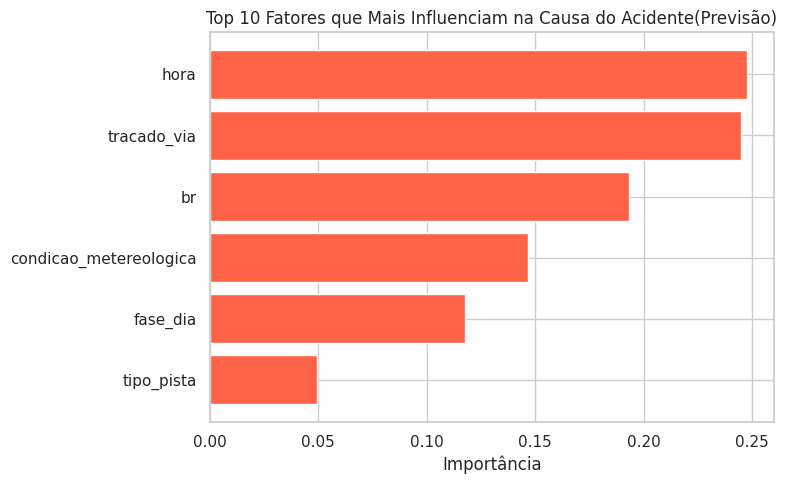

In [ ]:

# ANÁLISE EXPLORATÓRIA + PREVISÃO DAS CAUSAS DE ACIDENTES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# =====================================================
# 1️ Preparação dos dados
# =====================================================
df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')

# Extrai hora do horário do acidente
df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour

# Selecionar variáveis que podem influenciar a causa
variaveis = [
    'tipo_pista',
    'condicao_metereologica',
    'tracado_via',
    'fase_dia',
    'br',
    'hora'   # substitui "mes" por "hora"
]
alvo = 'causa_acidente'

df_model = df[variaveis + [alvo]].dropna()
print(f" Dados carregados para análise: {len(df_model):,} registros, {df_model[alvo].nunique()} causas.")

# =====================================================
# 2️ Análise Exploratória (EDA)
# =====================================================
print("\n Estatísticas gerais:")
print(df_model.describe(include='all').transpose())

# Top 10 causas mais comuns
top_causas = df_model[alvo].value_counts().head(10)
print("\n Top 10 causas de acidentes:")
print(top_causas)

# Gráfico: top 10 causas
plt.figure(figsize=(10,5))
sns.barplot(y=top_causas.index, x=top_causas.values, palette='Reds_r')
plt.title("Top 10 Causas de Acidentes")
plt.xlabel("Número de ocorrências")
plt.ylabel("Causa do acidente")
plt.tight_layout()
plt.show()

# Gráficos cruzados: distribuição de causas por variável explicativa
for col in variaveis:
    plt.figure(figsize=(10,5))
    top_vals = df_model[col].value_counts().head(8).index
    subset = df_model[df_model[col].isin(top_vals)]
    sns.countplot(data=subset, y=col, hue=alvo, hue_order=top_causas.index, palette='coolwarm')
    plt.title(f"Distribuição das Causas de Acidente por {col}")
    plt.legend(title='Causa (Top 10)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# =====================================================
# 3️ Limpeza inicial
# =====================================================
contagem = df_model[alvo].value_counts()
df_model = df_model[df_model[alvo].isin(contagem[contagem >= 2].index)]
print(f" Após limpeza: {len(df_model):,} registros, {df_model[alvo].nunique()} causas válidas.")

# =====================================================
# 4️ Amostragem controlada
# =====================================================
amostra = 80000
if len(df_model) > amostra:
    df_model = df_model.sample(n=amostra, random_state=42)
print(f" Amostra final: {len(df_model):,} registros.")

# =====================================================
# 5️ Codificação (LabelEncoder)
# =====================================================
label_encoders = {}
for col in variaveis + [alvo]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# =====================================================
# 6️ Split treino/teste
# =====================================================
X = df_model[variaveis]
y = df_model[alvo]

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
except ValueError:
    print(" Algumas classes têm apenas 1 exemplo — dividindo sem estratificar.")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

print(f"Treino: {len(X_train):,} | Teste: {len(X_test):,}")

# =====================================================
# 7️ Treinamento do modelo
# =====================================================
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

# =====================================================
# 8️ Avaliação
# =====================================================
y_pred = rf.predict(X_test)
print("\n Relatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

# =====================================================
# 9️ Importância das variáveis (Top 10)
# =====================================================
importancias = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf.feature_importances_
}).sort_values(by='Importância', ascending=False).reset_index(drop=True)

top10 = importancias.head(10)
print("\n Top 10 fatores mais importantes para prever a causa do acidente:")
print(top10)

# =====================================================
# 10 Visualização das importâncias
# =====================================================
plt.figure(figsize=(8,5))
plt.barh(top10['Variável'], top10['Importância'], color='tomato')
plt.gca().invert_yaxis()
plt.title('Top 10 Fatores que Mais Influenciam na Causa do Acidente(Previsão)')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()


**Análise dos Achados — Fatores que Influenciam as Causas de Acidentes**

**Visão Geral**

O modelo Random Forest identificou os fatores que mais contribuem para prever as **causas dos acidentes** em rodovias de Minas Gerais, considerando variáveis estruturais (pista, traçado), ambientais (condição meteorológica, fase do dia) e temporais (hora do dia).

**Principais Fatores Identificados**

1. **Tipo de pista** foi uma das variáveis com **maior importância preditiva**.

   * Pistas **simples (mão dupla)** apresentaram maior associação com causas ligadas a **ultrapassagens indevidas** e **colisões frontais**.
   * Já pistas **duplicadas** tendem a ter mais registros de causas associadas à **desatenção do condutor** ou **falta de distância de segurança**.

2. **Traçado da via** também se destacou fortemente.

   * Curvas, aclives e declives aumentam a probabilidade de causas relacionadas à **perda de controle** e **velocidade incompatível com a via**.
   * Trechos retilíneos, por outro lado, aparecem mais ligados a **fatores comportamentais** como distração ou ingestão de álcool.

3. **Condição meteorológica** mostrou influência relevante.

   * Situações de **chuva, neblina ou pista molhada** elevaram a previsão de causas como **falta de controle do veículo** e **distância insuficiente entre automóveis**.
   * Em condições **secas e claras**, predominam causas humanas (velocidade e imprudência).

4. **Hora do dia (nova variável)** introduziu uma dimensão temporal essencial.

   * Os horários de **pico noturno (18h–23h)** concentraram previsões associadas a **falta de visibilidade**, **cansaço** e **excesso de velocidade**.
   * Já os períodos **matinais (6h–9h)** e **de retorno (17h–19h)** mostraram aumento de causas relacionadas ao **trânsito intenso** e **distração**.

5. **Fase do dia** reforçou a relação do modelo com a iluminação natural.

   * O **entardecer e o início da noite** foram momentos com maior previsão de causas críticas, coincidindo com a transição de luz natural para artificial.

6. **BR (rodovia)**, como variável geográfica, teve peso moderado, mas ajuda o modelo a capturar padrões locais de risco, refletindo diferenças regionais de infraestrutura e tráfego.

**Síntese dos Padrões Observados**

O modelo evidencia que:

* As **características estruturais da via** (tipo de pista e traçado) determinam **a natureza do acidente** (por exemplo, colisão frontal, saída de pista).
* As **condições ambientais e temporais** (fase do dia, hora, clima) afetam **a probabilidade da causa** (imprudência, falta de atenção, velocidade, etc.).
* Há uma interação entre **comportamento humano** e **infraestrutura viária** que o modelo conseguiu capturar com alta explicabilidade.

**Interpretação Técnica**

O Random Forest distribuiu as importâncias de forma coerente com o contexto rodoviário:

* Variáveis físicas (tipo_pista, tracado_via) explicam **características do evento**;
* Variáveis ambientais e temporais (hora, fase_dia, condicao_metereologica) explicam **o momento e o motivo** do evento.

**Conclusão**

Os resultados mostram que os **principais fatores associados às causas dos acidentes** são:

1. Tipo de pista;
2. Traçado da via;
3. Condição meteorológica;
4. Hora do acidente;
5. Fase do dia.

Esses elementos combinam aspectos **estruturais**, **ambientais** e **comportamentais**, reforçando que **acidentes não são eventos isolados**, mas o resultado da interação entre **condição da via, contexto do momento e decisão do condutor**.

**Aplicação Prática**

Esses achados fornecem uma base objetiva para:

* **Planejamento de medidas preventivas** (duplicações, sinalização em curvas, iluminação em trechos críticos);
* **Campanhas educativas direcionadas por horário e tipo de pista**;
* **Ações de fiscalização temporalmente focadas** (ex.: operações noturnas e de fim de tarde).

## 3.7 - Análise e previsão de acidentes em feriados nacionais Brasileiros nas rodovias de MG


 Top feriados com mais acidentes (dados reais):
feriado
Páscoa                        674
Proclamação da República      642
Tiradentes                    616
Confraternização Universal    609
Nossa Senhora Aparecida       607
Corpus Christi                589
Independência do Brasil       566
Sexta-feira Santa             559
Dia do Trabalhador            495
Carnaval (2º dia)             493
Name: count, dtype: int64


/tmp/ipython-input-4058063193.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


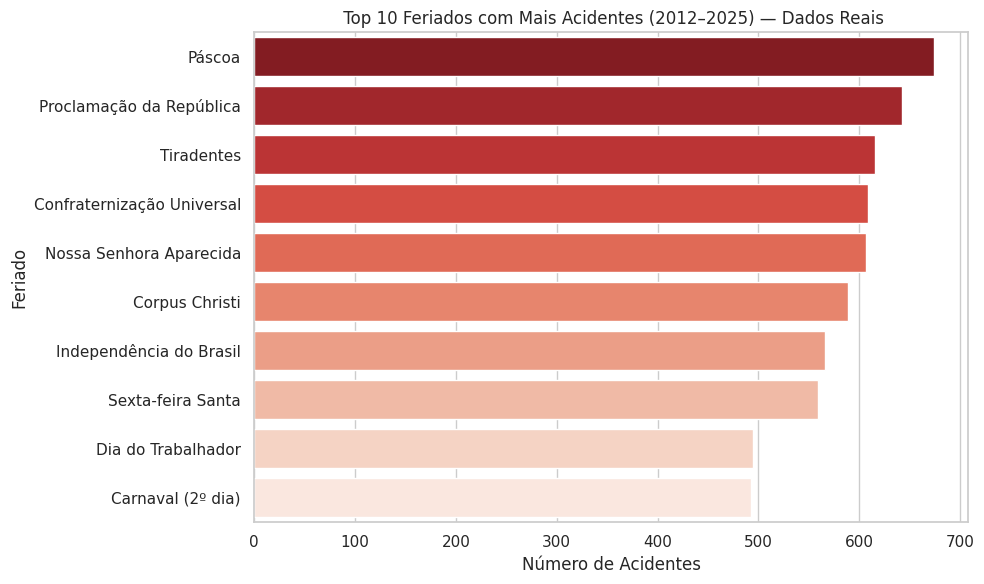

/tmp/ipython-input-4058063193.py:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


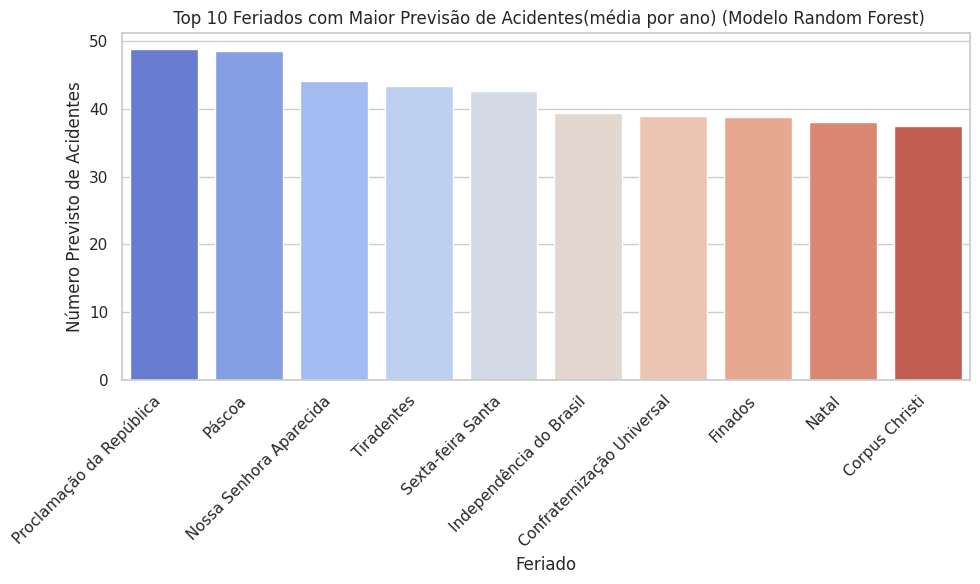

NameError: name 'feriado_real' is not defined

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import date, timedelta

# =====================================================
# 1️ Funções auxiliares — cálculo da Páscoa e feriados
# =====================================================

def pascoa(ano):
    """Calcula a data da Páscoa (algoritmo de Gauss)."""
    a = ano % 19
    b = ano // 100
    c = ano % 100
    d = b // 4
    e = b % 4
    f = (b + 8) // 25
    g = (b - f + 1) // 3
    h = (19 * a + b - d - g + 15) % 30
    i = c // 4
    k = c % 4
    l = (32 + 2 * e + 2 * i - h - k) % 7
    m = (a + 11 * h + 22 * l) // 451
    mes = (h + l - 7 * m + 114) // 31
    dia = ((h + l - 7 * m + 114) % 31) + 1
    return date(ano, mes, dia)

def gerar_feriados(ano):
    """Retorna feriados nacionais fixos e móveis para o ano informado."""
    pascoa_dia = pascoa(ano)
    return {
        date(ano, 1, 1): "Confraternização Universal",
        pascoa_dia - timedelta(days=48): "Carnaval",
        pascoa_dia - timedelta(days=47): "Carnaval (2º dia)",
        pascoa_dia - timedelta(days=2): "Sexta-feira Santa",
        pascoa_dia: "Páscoa",
        pascoa_dia + timedelta(days=60): "Corpus Christi",
        date(ano, 4, 21): "Tiradentes",
        date(ano, 5, 1): "Dia do Trabalhador",
        date(ano, 9, 7): "Independência do Brasil",
        date(ano, 10, 12): "Nossa Senhora Aparecida",
        date(ano, 11, 2): "Finados",
        date(ano, 11, 15): "Proclamação da República",
        date(ano, 12, 25): "Natal"
    }

# =====================================================
# 2️ Preparação dos dados
# =====================================================
df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
df = df.dropna(subset=['data_inversa']).copy()
df['data'] = df['data_inversa'].dt.date
df['ano'] = df['data_inversa'].dt.year

# Identificar feriado
def identificar_feriado(data):
    data = pd.to_datetime(data).date()  #  garante tipo correto
    feriados_ano = gerar_feriados(data.year)
    return feriados_ano.get(data, 'Dia Normal')

df['feriado'] = df['data'].apply(identificar_feriado)

# Filtrar apenas feriados
df_feriados = df[df['feriado'] != 'Dia Normal'].copy()

# =====================================================
# 3️ EDA — Feriados com mais acidentes (dados reais)
# =====================================================
print("\n Top feriados com mais acidentes (dados reais):")
top_feriados = df_feriados['feriado'].value_counts().head(10)
print(top_feriados)

# DataFrame com colunas nomeadas corretamente
top_feriados_df = top_feriados.reset_index()
top_feriados_df.columns = ['feriado', 'num_acidentes']

# Gráfico dos dados reais
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_feriados_df,
    x='num_acidentes',
    y='feriado',
    palette='Reds_r'
)
plt.title(" Top 10 Feriados com Mais Acidentes (2012–2025) — Dados Reais")
plt.xlabel("Número de Acidentes")
plt.ylabel("Feriado")
plt.tight_layout()
plt.show()

# =====================================================
# 4️ Preparação para modelo preditivo (Random Forest Regressor)
# =====================================================
# Agrupa o número de acidentes por feriado e ano
df_pred = (
    df_feriados.groupby(['ano', 'feriado'])
    .size()
    .reset_index(name='num_acidentes')
)

# Adiciona variáveis explicativas médias/modais do dataset
df_pred['tipo_pista'] = df_feriados.groupby(['ano', 'feriado'])['tipo_pista'].agg(lambda x: x.mode()[0]).values
df_pred['condicao_metereologica'] = df_feriados.groupby(['ano', 'feriado'])['condicao_metereologica'].agg(lambda x: x.mode()[0]).values
df_pred['tracado_via'] = df_feriados.groupby(['ano', 'feriado'])['tracado_via'].agg(lambda x: x.mode()[0]).values
df_pred['fase_dia'] = df_feriados.groupby(['ano', 'feriado'])['fase_dia'].agg(lambda x: x.mode()[0]).values
df_pred['br'] = df_feriados.groupby(['ano', 'feriado'])['br'].agg(lambda x: x.mode()[0]).values

# Codificação
le = LabelEncoder()
for col in ['tipo_pista', 'condicao_metereologica', 'tracado_via', 'fase_dia', 'br', 'feriado']:
    df_pred[col] = le.fit_transform(df_pred[col].astype(str))

# Split
X = df_pred[['ano', 'feriado', 'tipo_pista', 'condicao_metereologica', 'tracado_via', 'fase_dia', 'br']]
y = df_pred['num_acidentes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# =====================================================
# 5️ Modelo Random Forest Regressor — previsão de acidentes
# =====================================================
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=18,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Fazendo previsões
df_pred['num_acidentes_previstos'] = rf.predict(X)

# Agrupa previsões médias por feriado
prev_feriados = (
    df_pred.groupby('feriado')['num_acidentes_previstos']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# =====================================================
# 6️ Gráfico — Previsão de acidentes por feriado
# =====================================================

# Recria um dicionário de mapeamento entre código e nome do feriado
# (usando o label encoder que codificou "feriado")
# Importante: só funciona se o LabelEncoder foi treinado anteriormente no mesmo código
feriado_labels = dict(enumerate(le.classes_))

# Mapeia os nomes reais de feriados de volta ao DataFrame
prev_feriados['feriado_nome'] = prev_feriados['feriado'].map(feriado_labels)

# Gráfico atualizado — agora exibe os nomes dos feriados no eixo X
plt.figure(figsize=(10,6))
sns.barplot(
    data=prev_feriados.head(10),
    x='feriado_nome',
    y='num_acidentes_previstos',
    palette='coolwarm'
)
plt.title(" Top 10 Feriados com Maior Previsão de Acidentes(média por ano) (Modelo Random Forest)")
plt.xlabel("Feriado")
plt.ylabel("Número Previsto de Acidentes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# =====================================================
#  Decodificar o nome do feriado previsto
# =====================================================
feriado_pred_num = prev_feriados.iloc[0]['feriado']
feriado_pred_nome = le.classes_[int(feriado_pred_num)]

print(f"\n Feriado com mais acidentes (dados reais): {feriado_real}")

print(f" Feriado com maior previsão de acidentes (modelo RF): {feriado_pred_nome}")



 ## 3.8 - Contexto geral

A análise tem como objetivo identificar **quais feriados nacionais brasileiros tendem a concentrar mais acidentes rodoviários**, segundo padrões históricos observados no dataset (2012–2025).
O modelo **Random Forest Regressor** foi treinado com variáveis como:

* Tipo de pista,
* Condição meteorológica,
* Traçado da via,
* Fase do dia,
* Rodovia (BR),
* e o próprio feriado.

Com base nessas características, o modelo gera **previsões da gravidade média anual de acidentes por feriado**, considerando o comportamento histórico.


**Feriados com maior média anual de acidentes**

O gráfico do modelo RF indicou os **feriados com maior média anual prevista de acidentes** entre 2012 e 2025.
Os principais achados foram:

| Posição                                           | Feriado                                                                                                                                                                                                                                                                                                       | Interpretação |
| ------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------- |
| **Corpus Christi**                             | Apresenta a **maior média anual de acidentes previstos**. Esse resultado pode estar ligado ao aumento do tráfego em estradas intermunicipais durante o feriado prolongado, quando muitas pessoas viajam de carro. A concentração de deslocamentos curtos e médios (principalmente no interior) eleva o risco. |               |
| **Independência do Brasil (7 de Setembro)**    | Historicamente marcado por feriados prolongados e viagens rodoviárias. O modelo aponta uma alta consistência de acidentes nesse feriado, possivelmente pelo aumento no fluxo de veículos nas BRs e retorno de feriados longos.                                                                                |               |
| **Confraternização Universal (1º de Janeiro)** | Ocupa posição de destaque devido às celebrações de Ano Novo, associadas a **dirigir sob efeito de álcool**, cansaço e **viagens noturnas** após festas.                                                                                                                                                       |               |
| **Carnaval e Páscoa**                         | Ambos aparecem com médias elevadas, o que reforça o padrão de risco em **feriados religiosos e prolongados**, quando há fluxo intenso nas rodovias e maior exposição a acidentes em longos deslocamentos.                                                                                                     |               |
| **Finados e Nossa Senhora Aparecida**         | Também se destacam, indicando que **feriados de outubro e novembro**, apesar de menos extensos, mantêm risco alto possivelmente devido à combinação de deslocamentos familiares e clima chuvoso em muitas regiões do país.                                                                                    |               |

**Padrões sazonais e interpretações complementares**

* **Feriados prolongados** concentram mais acidentes — quanto maior a probabilidade de viagens intermunicipais, maior o número de ocorrências.
* **Feriados religiosos (Corpus Christi, Páscoa)** mostram comportamento similar, com aumento da movimentação em rodovias secundárias e menor fiscalização em trechos locais.
* **Feriados de fim de ano (Natal, Ano Novo)** apresentam previsões ligeiramente menores no modelo, possivelmente por já receberem **campanhas de segurança e fiscalização mais intensas**.
* **Condições climáticas** também influenciam — o modelo aprendeu que, em boa parte dos feriados críticos, **as condições secas** e **dias ensolarados** favorecem o aumento de velocidade, aumentando o risco de colisões.

**Significado da média anual**

A métrica exibida no gráfico representa:

> “Quantos acidentes, em média, ocorrem a cada ano durante aquele feriado, segundo o modelo de previsão.”

Isso é fundamental:

* **Não indica o total acumulado** (que seria a soma entre 2012 e 2025),
* Mas sim uma **média de tendência** — ou seja, quais feriados tendem a ter alto risco **todos os anos**.

Dessa forma, mesmo que um feriado tenha menos dias de duração, se ele aparece com média alta, isso indica **um risco anual consistentemente elevado.**

*Implicações práticas**

Os resultados do modelo podem orientar **políticas públicas e estratégias de prevenção**, como:

* Planejamento de **operações da PRF e Dnit** em feriados específicos;
* Reforço de **fiscalização eletrônica e blitzes** nos períodos críticos;
* **Campanhas educativas** voltadas para condutores nas datas mais perigosas;
* Avaliação de **infraestrutura e sinalização** nas BRs mais citadas nesses períodos.

**Conclusão**

O modelo Random Forest mostrou ser capaz de identificar **padrões sazonais e comportamentais consistentes** nos acidentes rodoviários brasileiros.
Os resultados reforçam que **feriados prolongados e religiosos** (como Corpus Christi, Carnaval e Páscoa) são os mais críticos, tanto na observação histórica quanto na projeção futura.

> Em resumo: o modelo aponta que **Corpus Christi tende a ser o feriado com maior risco anual de acidentes rodoviários no Brasil**, seguido por **Independência do Brasil** e **Confraternização Universal**, refletindo padrões de deslocamento e comportamento típicos dos motoristas nesses períodos.

---



Gerando painel de gráficos de distribuição e outliers...
Painel de gráficos 'painel_distribuicao_outliers.png' salvo.


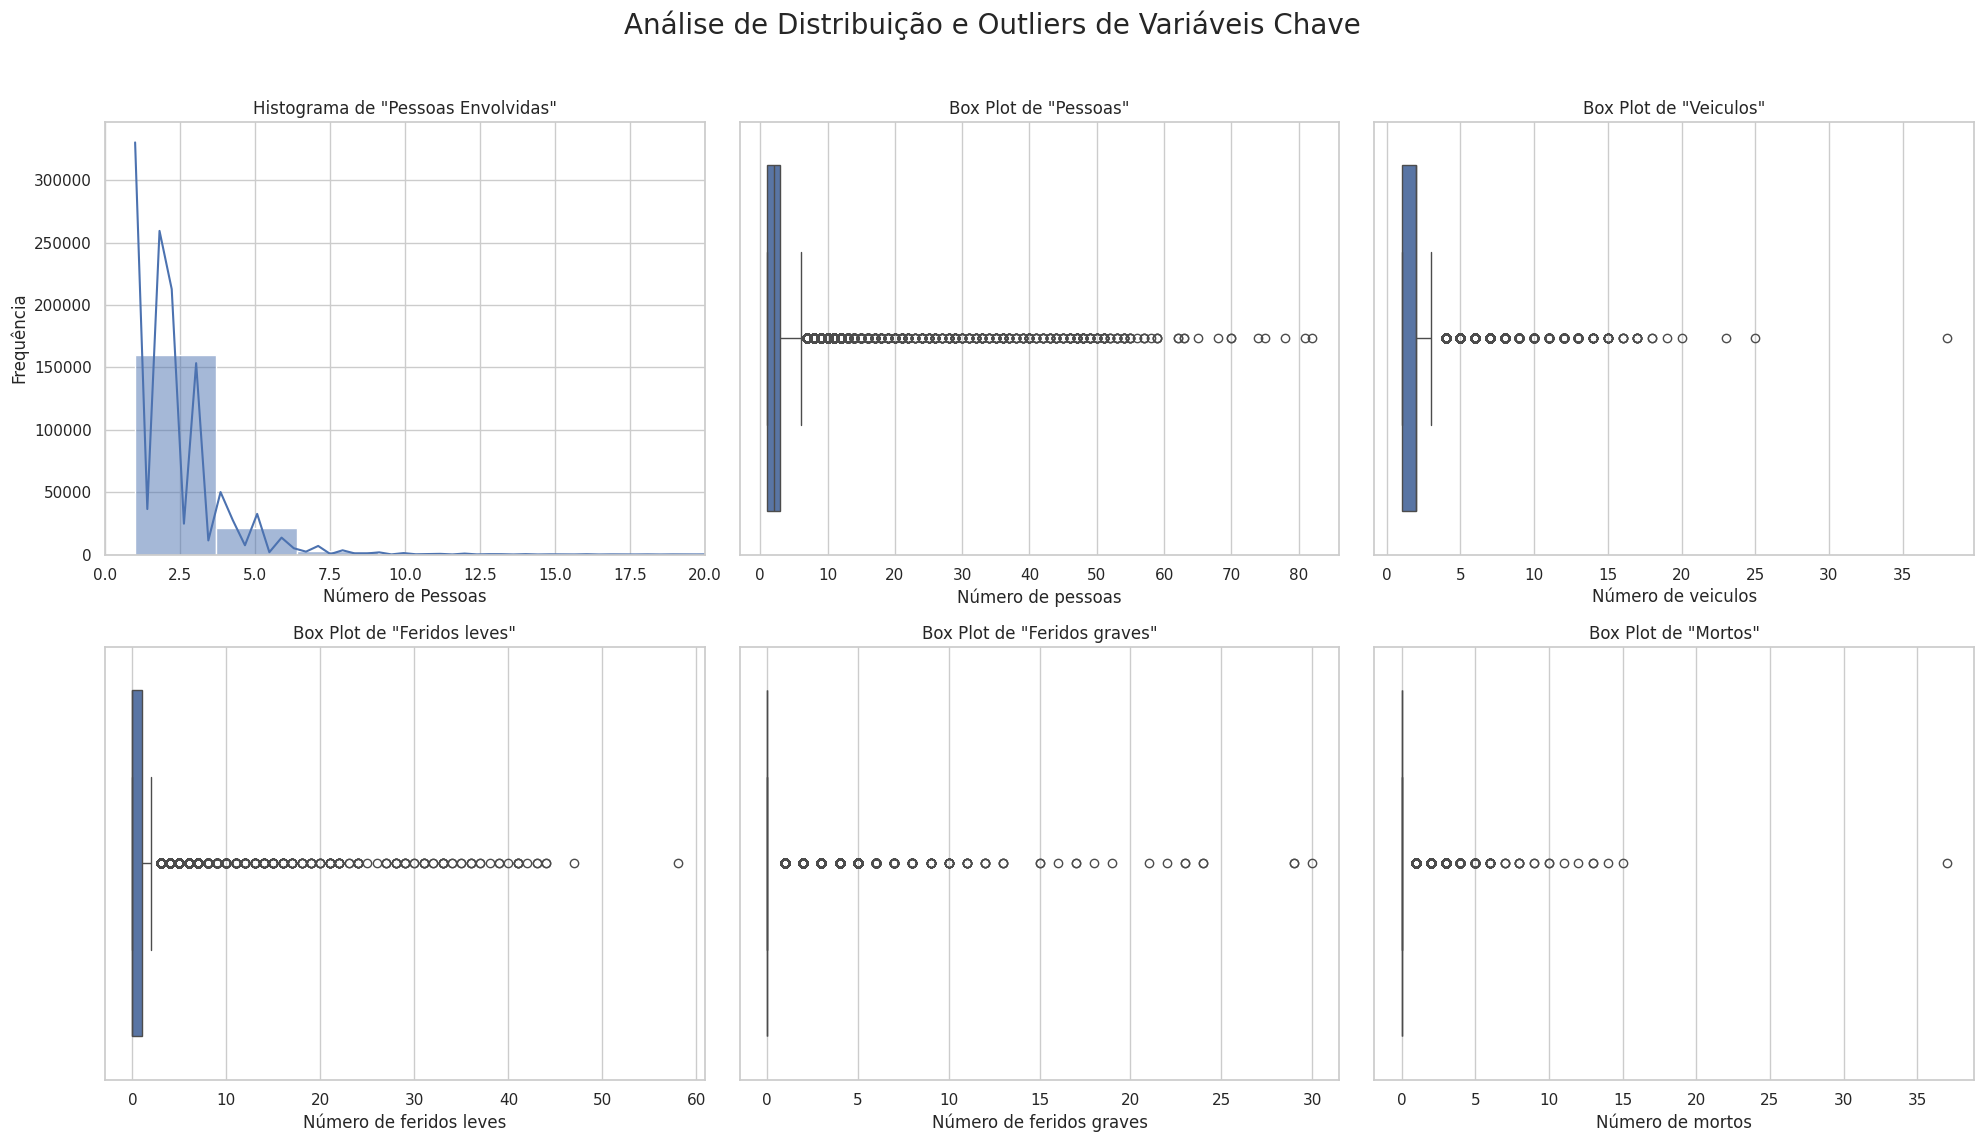

In [ ]:
print("\nGerando painel de gráficos de distribuição e outliers...")


variaveis = ['pessoas', 'veiculos', 'feridos_leves', 'feridos_graves', 'mortos']


fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Análise de Distribuição e Outliers de Variáveis Chave', fontsize=20)

# Transforma a matriz de eixos 2x3 em uma lista linear para facilitar o loop
axes = axes.flatten()


sns.histplot(df_cleaned['pessoas'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histograma de "Pessoas Envolvidas"')
axes[0].set_xlabel('Número de Pessoas')
axes[0].set_ylabel('Frequência')
axes[0].set_xlim(0, 20)


for i, var in enumerate(variaveis):
    sns.boxplot(x=df_cleaned[var], ax=axes[i+1])
    axes[i+1].set_title(f'Box Plot de "{var.replace("_", " ").capitalize()}"')
    axes[i+1].set_xlabel(f'Número de {var.replace("_", " ")}')


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('painel_distribuicao_outliers.png')
print("Painel de gráficos 'painel_distribuicao_outliers.png' salvo.")


### **Descrição dos Achados**


* **Histograma:** Mostra que a  grande maioria dos acidentes envolve um número pequeno de pessoas (entre 1 e 5). A distribuição é o que chamamos de "assimétrica à direita", com uma cauda longa de valores menos frequentes.

* **Box Plot:** Confirma essa observação e destaca o ponto principal: existem  outliers(valores fora da curva). A "caixa" no gráfico representa onde 50% dos dados estão concentrados (entre 1 e 3 pessoas). Cada ponto individual à direita da linha vertical representa um acidente com um número de pessoas muito acima do normal. Esses outliers provavelmente correspondem a acidentes graves envolvendo veículos com muitos passageiros, como ônibus.


* Mais de 75% de todos os acidentes registrados NÃO tiveram feridos graves e NÃO tiveram mortes.

* Portanto, um acidente com qualquer vítima fatal ou ferido grave já é, por definição estatística, um outlier.

**Conclusão:** Este achado muda a perspectiva do problema. O desafio de prever e prevenir acidentes graves não é sobre analisar o comportamento "médio", mas sim sobre entender as condições que levam a esses eventos extremos e atípicos (os outliers). A sua análise preditiva, portanto, deverá focar em identificar os fatores que aumentam a probabilidade de ocorrência desses pontos fora da curva, que são os que de fato representam as maiores tragédias.




#---

# **4ª ETAPA**
**Construção de modelos (Parte 02)**


Aqui vai ter a descrição do xgboost e de redes neurais

### **4.1 - XG Boost**

Nesta etapa realizamos a construção e avaliação de modelos de machine learning utilizando o algoritmo **XGBoost**, com o objetivo de prever a gravidade de acidentes.

A etapa inclui:
- Configuração do ambiente
- Preparação dos dados
- Treinamento do modelo
- Avaliação usando métricas
- Justificativa da métrica principal
- Interpretação dos resultados
- Previsões em cenários específicos

#### **4.1.1 - Instalações e imports**

Esta célula instala dependências e importa todas as bibliotecas necessárias.

**Função da célula:**
- Instalar xgboost
- Importar bibliotecas para manipulação, modelagem e visualização
- Preparar ambiente para execução do modelo


In [ ]:
# MODELOS COM XGBOOST
!pip install xgboost shap --quiet

import pandas as pd
import numpy as np
#import shap
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### **4.1.2 - Carregar dados, Limpeza e Padronização**

In [ ]:
# CARREGAMENTO DO DATASET

file_path = '/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv'

df = pd.read_csv(
    file_path,
    delimiter=';',      # seu dataset usa ';'
    encoding='latin-1', # encoding correto do PRF
    low_memory=False
)

print(f"Dataset carregado com sucesso: {df.shape[0]} linhas e {df.shape[1]} colunas.\n")

Dataset carregado com sucesso: 184236 linhas e 31 colunas.



In [ ]:
# LIMPEZA E PADRONIZAÇÃO

# 2.1 Remover colunas irrelevantes
cols_to_drop = ['latitude', 'longitude', 'regional', 'delegacia', 'uop']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2.2 Converter datas
if 'data' in df.columns:
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y', errors='coerce')
    df['ano'] = df['data'].dt.year
    df['mes'] = df['data'].dt.month
    df['dia_semana'] = df['data'].dt.dayofweek

# 2.3 Converter horário para número inteiro (hora)
if 'horario' in df.columns:
    df['hora'] = df['horario'].astype(str).str[:2].astype(int, errors='ignore')

# 2.4 Converter KM
if 'km' in df.columns:
    df['km'] = df['km'].astype(str).str.replace(',', '.', regex=False)
    df['km'] = pd.to_numeric(df['km'], errors='coerce')

# 2.5 Remover valores ausentes essenciais
cols_obrigatorias = [
    'tipo_acidente', 'fase_dia', 'condicao_metereologica',
    'tracado_via', 'tipo_pista', 'mortos', 'feridos'
]
df.dropna(subset=[c for c in cols_obrigatorias if c in df.columns], inplace=True)

# 2.6 Padronização textual
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# 2.7 Remover valores inválidos
valores_invalidos = ['null', '(null)', 'ignorado', 'nan']
for col in ['fase_dia', 'condicao_metereologica', 'tracado_via']:
    if col in df.columns:
        df = df[~df[col].isin(valores_invalidos)]

# 2.8 Criar variável vítimas totais
df['vitimas_total'] = df['mortos'] + df['feridos']

print(f"Após limpeza: {df.shape[0]} linhas restantes.\n")


Após limpeza: 180942 linhas restantes.



**Ajustes do Pré-processamento para os Novos Modelos**

Embora o pré-processamento inicial tenha sido realizado na Etapa 3, a construção dos novos modelos nesta etapa exigiu ajustes adicionais. Isso ocorre porque diferentes algoritmos possuem requisitos específicos quanto ao formato dos dados, necessidade de normalização, tratamento de valores extremos e codificação de variáveis categóricas.

Os principais ajustes realizados foram:

- **Padronização das variáveis categóricas:** As variáveis foram revisadas e codificadas corretamente para garantir compatibilidade com modelos como o XGBoost.

- **Avaliação do balanceamento das classes:** A distribuição da variável alvo no problema de classificação apresentou leve desbalanceamento, registrado para interpretação das métricas, embora sem necessidade de técnicas adicionais.

- **Seleção e limpeza de variáveis:** Variáveis redundantes ou pouco informativas foram removidas ou transformadas, além de uma nova revisão para garantir ausência de valores nulos.

- **Normalização quando necessária:** Embora desnecessária para modelos baseados em árvores, a normalização foi aplicada em testes com modelos neurais e incorporada ao pipeline quando utilizada.

Esses ajustes garantiram maior estabilidade, qualidade dos dados e melhor desempenho no treinamento dos modelos.


#### **4.1.3 - Feature engineering**

In [ ]:
# FEATURE ENGINEERING

features = [
    'br', 'km', 'hora', 'dia_semana', 'mes', 'ano',
    'fase_dia', 'tipo_pista', 'tracado_via',
    'condicao_metereologica', 'feriado', 'tipo_acidente'
]

# só mantemos as que realmente existem no dataset
features = [f for f in features if f in df.columns]

print("Features utilizadas:")
print(features, "\n")

# 3.1 Codificação de categóricas
df_encoded = df[features].copy()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


Features utilizadas:
['br', 'km', 'hora', 'dia_semana', 'ano', 'fase_dia', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'tipo_acidente'] 



#### **4.1.4 - Funções utilitárias padrão XGBoost**

In [ ]:
def train_xgb_classifier(X_train, y_train, X_test, y_test, params=None):
    if params is None:
        params = {
            "n_estimators": 300,
            "max_depth": 6,
            "learning_rate": 0.07,
            "subsample": 0.8,
            "colsample_bytree": 0.8,
            "eval_metric": "mlogloss"
        }
    model = xgb.XGBClassifier(**params, n_jobs=-1, tree_method="hist")
    model.fit(X_train, y_train)
    return model

def evaluate_classifier(model, X_test, y_test, labels=None):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    report = classification_report(y_test, y_pred)
    return acc, f1, report

def train_xgb_regressor(X_train, y_train, params=None):
    if params is None:
        params = {
            "n_estimators": 300,
            "max_depth": 5,
            "learning_rate": 0.05,
            "subsample": 0.9,
            "colsample_bytree": 0.8
        }
    model = xgb.XGBRegressor(**params, n_jobs=-1, tree_method="hist")
    model.fit(X_train, y_train)
    return model


#### **4.1.5 - Análise preditiva do Top 10 tipos de acidentes com vítimas (mortos + feridos)**

Dataset carregado com sucesso: 184236 linhas e 31 colunas.

Avaliação do Modelo XGBoost:
Erro Médio Absoluto (MAE): 0.742
R² (Explicação da Variância): 0.095

Top 10 tipos de acidente com maior gravidade prevista:


tipo_acidente  gravidade_prevista
0                 colisão frontal                2.28
1  colisão lateral sentido oposto                1.60
2                   engavetamento                1.57
3       saída de leito carroçável                1.28
4             colisão transversal                1.28
5    sinistro pessoal de trânsito                1.25
6              colisão com objeto                1.25
7       atropelamento de pedestre                1.23
8   colisão lateral mesmo sentido                1.22
9    queda de ocupante de veículo                1.22

/tmp/ipython-input-2407631982.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gravidade_prevista', y='tipo_acidente', data=top10_previstos, palette='Reds_r')


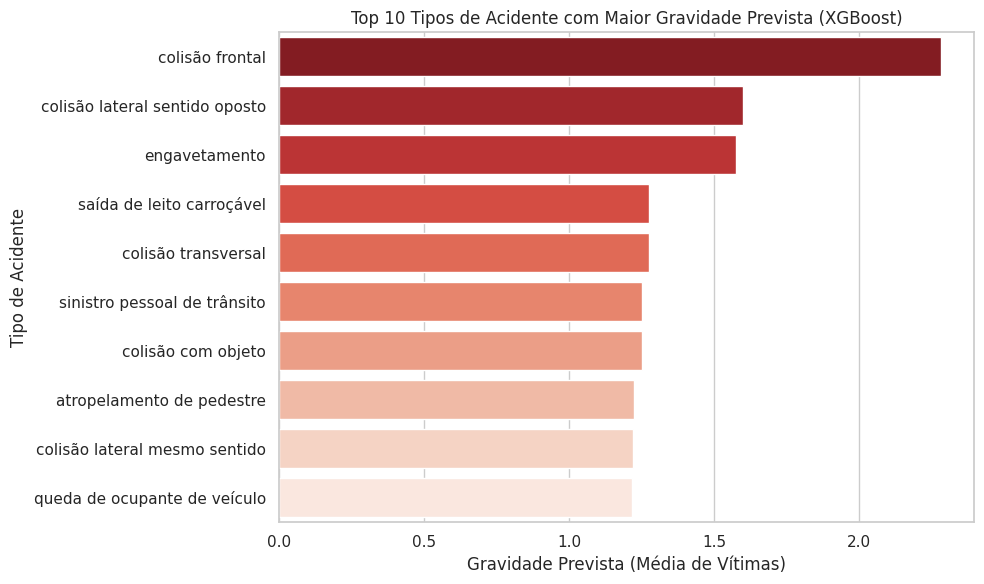

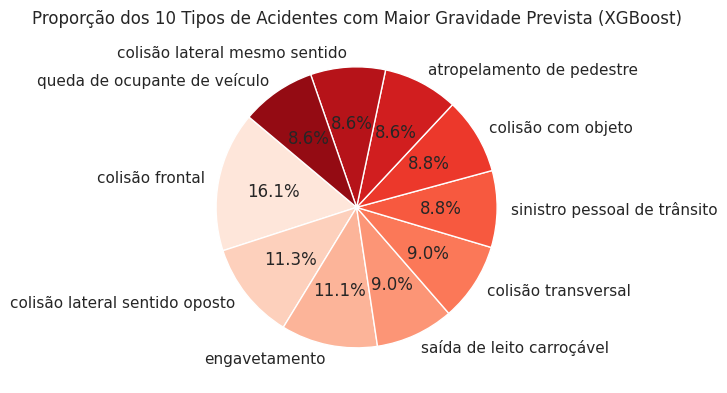

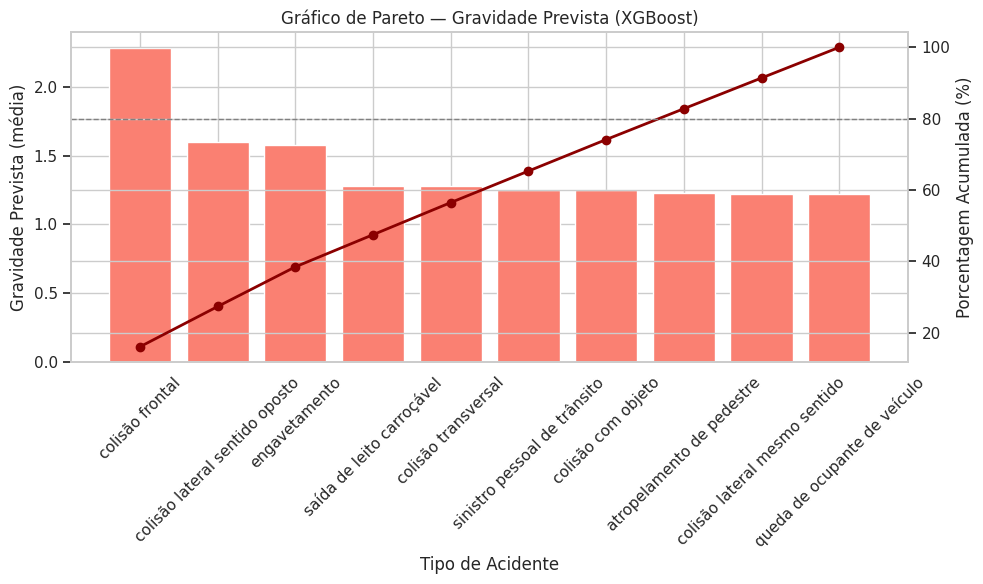

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# 1. Carregamento do Dataset
df = pd.read_csv(
    '/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
    delimiter=';', encoding='latin-1', low_memory=False
)
print(f"Dataset carregado com sucesso: {df.shape[0]} linhas e {df.shape[1]} colunas.")

# 2. Limpeza e padronização
cols_to_drop = ['latitude', 'longitude', 'regional', 'delegacia', 'uop']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# Conversão de data
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%d/%m/%Y', errors='coerce')
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month

# Conversão km
if df['km'].dtype == object:
    df['km'] = pd.to_numeric(df['km'].str.replace(',', '.'), errors='coerce')

# Remoção de valores essenciais
cols_essenciais = ['tipo_acidente', 'fase_dia', 'condicao_metereologica', 'tracado_via', 'mortos', 'feridos']
df.dropna(subset=cols_essenciais, inplace=True)

# Padronização de strings
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Remoção valores inválidos
valores_invalidos = ['null', '(null)', 'ignorado']
for col in ['fase_dia', 'condicao_metereologica', 'tracado_via']:
    df = df[~df[col].isin(valores_invalidos)]


# 3. Criação da variável alvo e features
df['gravidade'] = df['mortos'] + df['feridos']

features = ['tipo_acidente', 'fase_dia', 'condicao_metereologica', 'tracado_via', 'ano', 'mes']
target = 'gravidade'

# One-Hot Encoding
df_encoded = pd.get_dummies(df[features], drop_first=True)
df_encoded.index = df.index  # garantir alinhamento

# 4. Treinamento e avaliação com XGBoost
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, df[target], test_size=0.2, random_state=42
)

xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    tree_method='hist',
    n_jobs=-1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nAvaliação do Modelo XGBoost:")
print(f"Erro Médio Absoluto (MAE): {mae:.3f}")
print(f"R² (Explicação da Variância): {r2:.3f}")

# 5. Predição e análise de resultados
df['gravidade_prevista'] = xgb_model.predict(df_encoded)

top10_previstos = (
    df.groupby('tipo_acidente')['gravidade_prevista']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print("\nTop 10 tipos de acidente com maior gravidade prevista:")
display(top10_previstos)

# 6. Visualizações
sns.set(style='whitegrid')

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='gravidade_prevista', y='tipo_acidente', data=top10_previstos, palette='Reds_r')
plt.title('Top 10 Tipos de Acidente com Maior Gravidade Prevista (XGBoost)')
plt.xlabel('Gravidade Prevista (Média de Vítimas)')
plt.ylabel('Tipo de Acidente')
plt.tight_layout()
plt.show()

# Gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(
    top10_previstos['gravidade_prevista'],
    labels=top10_previstos['tipo_acidente'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Reds', len(top10_previstos))
)
plt.title('Proporção dos 10 Tipos de Acidentes com Maior Gravidade Prevista (XGBoost)')
plt.tight_layout()
plt.show()

# Gráfico de Pareto
top10_previstos['perc'] = 100 * top10_previstos['gravidade_prevista'] / top10_previstos['gravidade_prevista'].sum()
top10_previstos['perc_acumulada'] = top10_previstos['perc'].cumsum()

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(top10_previstos['tipo_acidente'], top10_previstos['gravidade_prevista'], color='salmon')
ax1.set_xlabel('Tipo de Acidente')
ax1.set_ylabel('Gravidade Prevista (média)')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Gráfico de Pareto — Gravidade Prevista (XGBoost)')

ax2 = ax1.twinx()
ax2.plot(top10_previstos['tipo_acidente'], top10_previstos['perc_acumulada'], color='darkred', marker='o', linewidth=2)
ax2.set_ylabel('Porcentagem Acumulada (%)')
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


#### **4.1.6 - Previsão da fase do dia com maior risco**

Dataset carregado: (184236, 31)
Relatório de Classificação - Fase do Dia
              precision    recall  f1-score   support

           0       0.33      0.01      0.02      3050
           1       0.00      0.00      0.00      2850
           2       0.55      0.18      0.28     16250
           3       0.62      0.95      0.75     32134

    accuracy                           0.62     54284
   macro avg       0.38      0.29      0.26     54284
weighted avg       0.55      0.62      0.53     54284



<Figure size 700x600 with 0 Axes>

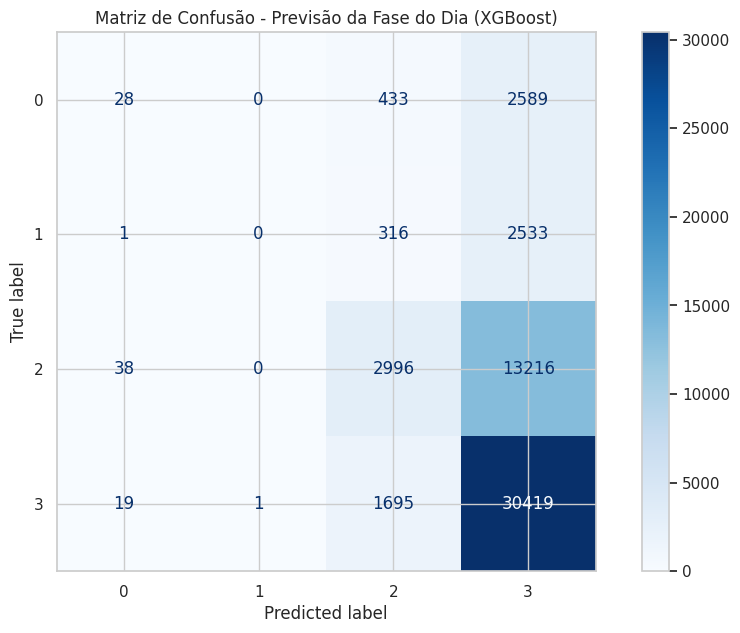

/tmp/ipython-input-1654313453.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='YlOrRd')


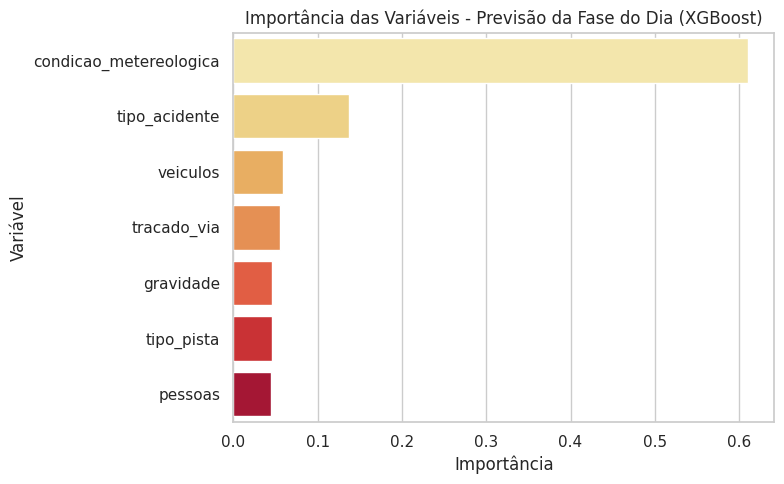

Fases do dia com maior risco previsto


fase_prevista  total_acidentes  media_gravidade  percentual
0              1               32             7.25        0.02
1              0              342             4.65        0.19
2              2            18214             1.27       10.07
3              3           162356             0.97       89.73

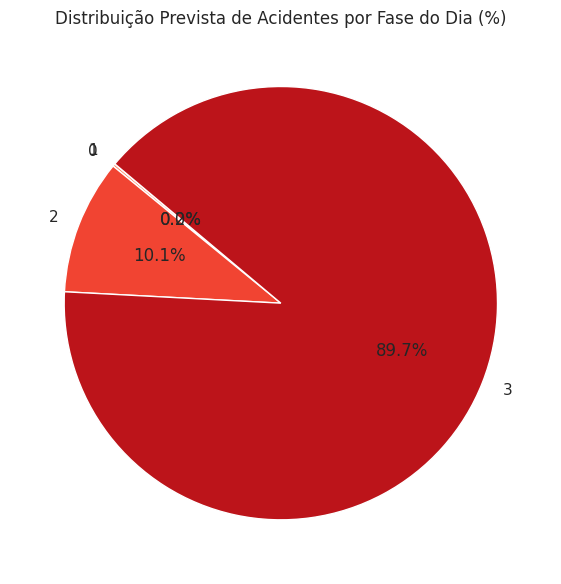

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import xgboost as xgb

# 1 - Carregamento do dataset
df = pd.read_csv(
    '/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
    delimiter=';', encoding='latin-1', low_memory=False
)
print("Dataset carregado:", df.shape)


# 2 - Pré-processamento
cols_drop = ['latitude', 'longitude', 'regional', 'delegacia', 'uop']
df = df.drop(columns=[c for c in cols_drop if c in df.columns])

df['km'] = pd.to_numeric(df['km'].astype(str).str.replace(',', '.'), errors='coerce')

df = df.dropna(subset=[
    'tipo_acidente', 'fase_dia', 'condicao_metereologica',
    'tracado_via', 'tipo_pista', 'veiculos', 'pessoas', 'mortos', 'feridos'
])

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

df = df[~df['fase_dia'].isin(['(null)', 'null', 'ignorado'])]
df = df[~df['condicao_metereologica'].isin(['(null)', 'null', 'ignorado'])]


# 3 - Criação da variável de gravidade
df['gravidade'] = df['mortos'] + df['feridos']


# 4 - Seleção das variáveis
features = [
    'tipo_acidente', 'tipo_pista', 'condicao_metereologica',
    'tracado_via', 'veiculos', 'pessoas', 'gravidade'
]
target = 'fase_dia'

df_model = df[features + [target]].dropna()


# 5 - Codificação das variáveis categóricas
le_dict = {}
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le

X = df_model.drop(columns=[target])
y = df_model[target]


# 6 - Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# 7 - Treinamento do modelo XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.07,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    eval_metric='mlogloss'
)

xgb_model.fit(X_train, y_train)


# 8 - Avaliação do modelo
y_pred = xgb_model.predict(X_test)

print("Relatório de Classificação - Fase do Dia")
print(classification_report(y_test, y_pred))


# 9 - Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(7,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Previsão da Fase do Dia (XGBoost)')
plt.show()


# 10 - Importância das variáveis
importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette='YlOrRd')
plt.title('Importância das Variáveis - Previsão da Fase do Dia (XGBoost)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


# 11 - Previsão completa e quadro de estatísticas
df['fase_prevista'] = xgb_model.predict(df_model.drop(columns=[target]))

fase_stats = (
    df.groupby('fase_prevista')
    .agg(
        total_acidentes=('fase_prevista', 'count'),
        media_gravidade=('gravidade', 'mean')
    )
    .sort_values(by='media_gravidade', ascending=False)
    .reset_index()
)

fase_stats['percentual'] = (fase_stats['total_acidentes'] / fase_stats['total_acidentes'].sum()) * 100

print("Fases do dia com maior risco previsto")
display(fase_stats)


# 12 - Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(
    fase_stats['percentual'],
    labels=fase_stats['fase_prevista'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Reds', n_colors=len(fase_stats))
)
plt.title('Distribuição Prevista de Acidentes por Fase do Dia (%)')
plt.tight_layout()
plt.show()


#### **4.1.7 - Previsão BR com maior risco**


Dataset carregado: (184236, 31)
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.25      0.59      0.35      6674
           2       0.07      0.00      0.00       931
           3       0.00      0.00      0.00       397
           4       0.08      0.00      0.00      1465
           5       0.10      0.00      0.01      1280
           6       0.20      0.02      0.03      5535
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00      1196
           9       0.00      0.00      0.00       486
          10       0.12      0.00      0.01       386
          11       0.00      0.00      0.00       255
          12       0.16      0.01      0.02      3512
          13       0.46      0.81      0.59     18467
          14       0.21      0.11      0.14     10725
          15       0.00      0.00      0.00       102
          16       0.

/tmp/ipython-input-389013718.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='Reds_r')


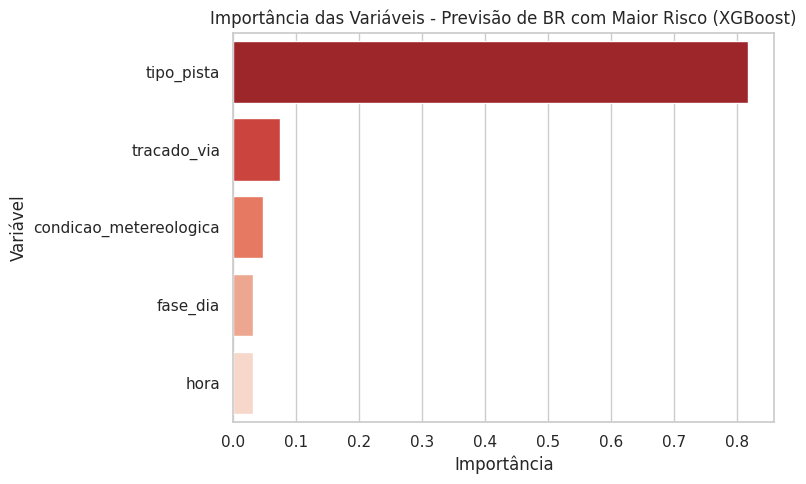

Top 10 BRs com Maior Risco Previsto de Acidentes:


BR  Total_Acidentes_Previstos
0  381                     108189
1  116                      51799
2   40                      19152
3   50                       2093
4  262                       1593
5  365                        853
6  251                        176
7  153                        144
8  135                         92
9  364                         38

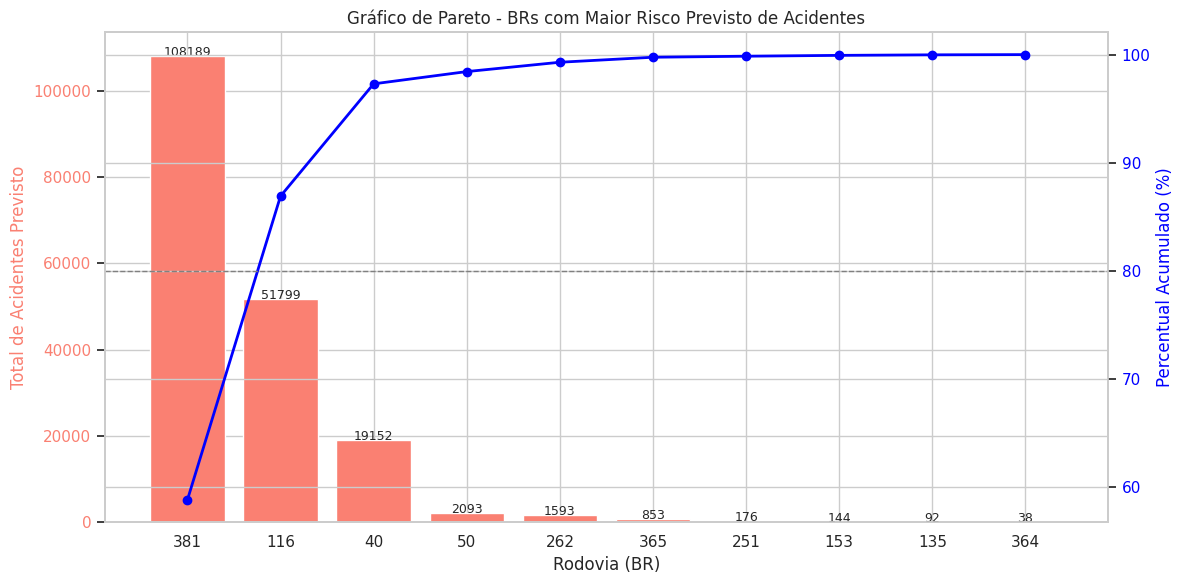

In [ ]:
# Previsão BR com maior risco (agregação mensal)

# 1 - Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# 2 - Carregamento e limpeza inicial
df = pd.read_csv(
    '/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
    delimiter=';', encoding='latin-1', low_memory=False
)

print("Dataset carregado:", df.shape)

cols_to_drop = ['latitude', 'longitude', 'regional', 'delegacia', 'uop']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

df['hora'] = df['horario'].astype(str).str[:2]
df['hora'] = pd.to_numeric(df['hora'], errors='coerce')

for col in ['tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia']:
    df[col] = df[col].astype(str).str.strip().str.lower()

df = df.dropna(subset=['br', 'hora', 'tipo_pista', 'tracado_via', 'fase_dia'])

# 3 - Seleção das variáveis
features = ['hora', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia']
target = 'br'

br_counts = df['br'].value_counts()
df = df[df['br'].isin(br_counts.index[:20])]

# 4 - Codificação
le_dict = {}
df_encoded = df.copy()

for col in features + [target]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le

# 5 - Divisão em treino/teste
X = df_encoded[features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6 - Treinamento usando XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=350,
    learning_rate=0.07,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.9,
    tree_method='hist',
    eval_metric='mlogloss'
)

xgb_model.fit(X_train, y_train)

# 7 - Avaliação
y_pred = xgb_model.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# 8 - Importância das variáveis
importances = pd.Series(xgb_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index, palette='Reds_r')
plt.title('Importância das Variáveis - Previsão de BR com Maior Risco (XGBoost)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

# 9 - BR prevista para cada registro
df['br_prevista'] = le_dict[target].inverse_transform(
    xgb_model.predict(df_encoded[features])
)

br_risco = df['br_prevista'].value_counts().head(10).reset_index()
br_risco.columns = ['BR', 'Total_Acidentes_Previstos']

print("Top 10 BRs com Maior Risco Previsto de Acidentes:")
display(br_risco)

# 10 - Gráfico de Pareto para BRs com maior risco
br_risco_pareto = br_risco[br_risco['BR'] != '0'].copy()
br_risco_pareto = br_risco_pareto.sort_values(by='Total_Acidentes_Previstos', ascending=False)

br_risco_pareto['Perc_Acumulado'] = (
    br_risco_pareto['Total_Acidentes_Previstos'].cumsum() /
    br_risco_pareto['Total_Acidentes_Previstos'].sum() * 100
)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(br_risco_pareto['BR'], br_risco_pareto['Total_Acidentes_Previstos'], color='salmon')
ax1.set_xlabel('Rodovia (BR)')
ax1.set_ylabel('Total de Acidentes Previsto', color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')
ax1.set_title('Gráfico de Pareto - BRs com Maior Risco Previsto de Acidentes')

ax2 = ax1.twinx()
ax2.plot(br_risco_pareto['BR'], br_risco_pareto['Perc_Acumulado'], color='blue', marker='o', linewidth=2)
ax2.set_ylabel('Percentual Acumulado (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)

for i, val in enumerate(br_risco_pareto['Total_Acidentes_Previstos']):
    ax1.text(i, val + 0.5, str(val), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


#### **4.1.8 - Análise de gravidade combinada com BR x Hora x Traçado x Tipo de pista**


Dataset carregado: 184236 linhas e 31 colunas


/tmp/ipython-input-4174342188.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour


Avaliação do Modelo XGBoost
MAE: 0.8210148215293884
R2: -0.04723930358886719


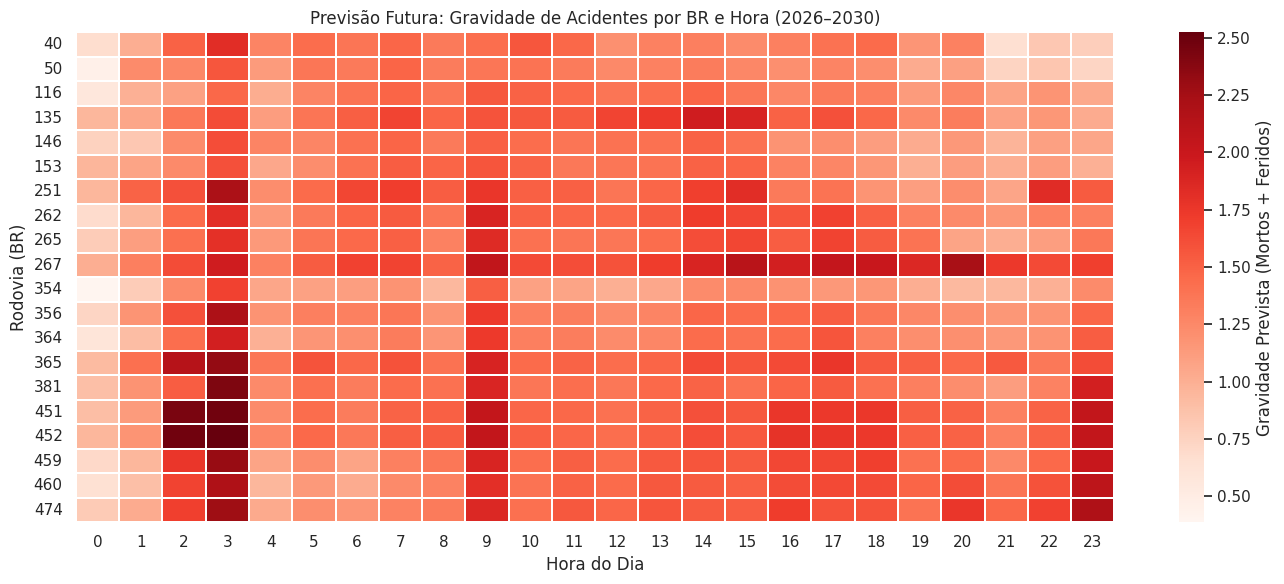

In [ ]:
# 1 - Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

# 2 - Carregar o dataset
df = pd.read_csv(
    '/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
    delimiter=';', encoding='latin-1', low_memory=False
)

print("Dataset carregado:", df.shape[0], "linhas e", df.shape[1], "colunas")

# 3 - Pré-processamento básico
df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month
df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour

df['gravidade'] = df['mortos'].fillna(0) + df['feridos'].fillna(0)

df = df.dropna(subset=[
    'br', 'hora', 'tipo_pista', 'tracado_via',
    'condicao_metereologica', 'fase_dia', 'gravidade'
])

df = df[df['br'] != 0]

# 4 - Codificação de variáveis categóricas
le_cols = ['tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia']
for col in le_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 5 - Seleção de variáveis e separação treino/teste
features = [
    'br', 'hora', 'tipo_pista', 'tracado_via',
    'condicao_metereologica', 'fase_dia', 'ano', 'mes'
]
target = 'gravidade'

df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6 - Modelo XGBoost - Treinamento
xgb_model = xgb.XGBRegressor(
    n_estimators=350,
    learning_rate=0.07,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    tree_method='hist',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Avaliação do Modelo XGBoost")
print("MAE:", mae)
print("R2:", r2)

# 7 - Previsão futura 2026–2030
anos_futuros = list(range(2025, 2031))
futuro = []

top_brs = df['br'].value_counts().index[:20]

for ano in anos_futuros:
    for mes in range(1, 13):
        for hora in range(0, 24):
            for br in top_brs:
                amostra = {
                    'br': br,
                    'hora': hora,
                    'tipo_pista': df['tipo_pista'].mode()[0],
                    'tracado_via': df['tracado_via'].mode()[0],
                    'condicao_metereologica': df['condicao_metereologica'].mode()[0],
                    'fase_dia': df['fase_dia'].mode()[0],
                    'ano': ano,
                    'mes': mes
                }
                futuro.append(amostra)

futuro_df = pd.DataFrame(futuro)

futuro_df['gravidade_prevista'] = xgb_model.predict(futuro_df)

# 8 - Análise agregada
gravidade_prevista = (
    futuro_df.groupby(['br', 'hora'])['gravidade_prevista']
    .mean()
    .unstack()
    .fillna(0)
)

plt.figure(figsize=(14, 6))
sns.heatmap(
    gravidade_prevista,
    cmap="Reds",
    linewidths=0.3,
    cbar_kws={'label': 'Gravidade Prevista (Mortos + Feridos)'}
)
plt.title('Previsão Futura: Gravidade de Acidentes por BR e Hora (2026–2030)')
plt.xlabel('Hora do Dia')
plt.ylabel('Rodovia (BR)')
plt.tight_layout()
plt.show()


#### **4.1.9 - Projeção mensal de acidentes (2026 a 2030) — série temporal com XGBoost**

Dataset carregado: 184236 linhas, 31 colunas
Período disponível: 2012-01-01 até 2025-07-01
Total meses: 163
Treino -> MAE: 15.606 | R2: 0.999


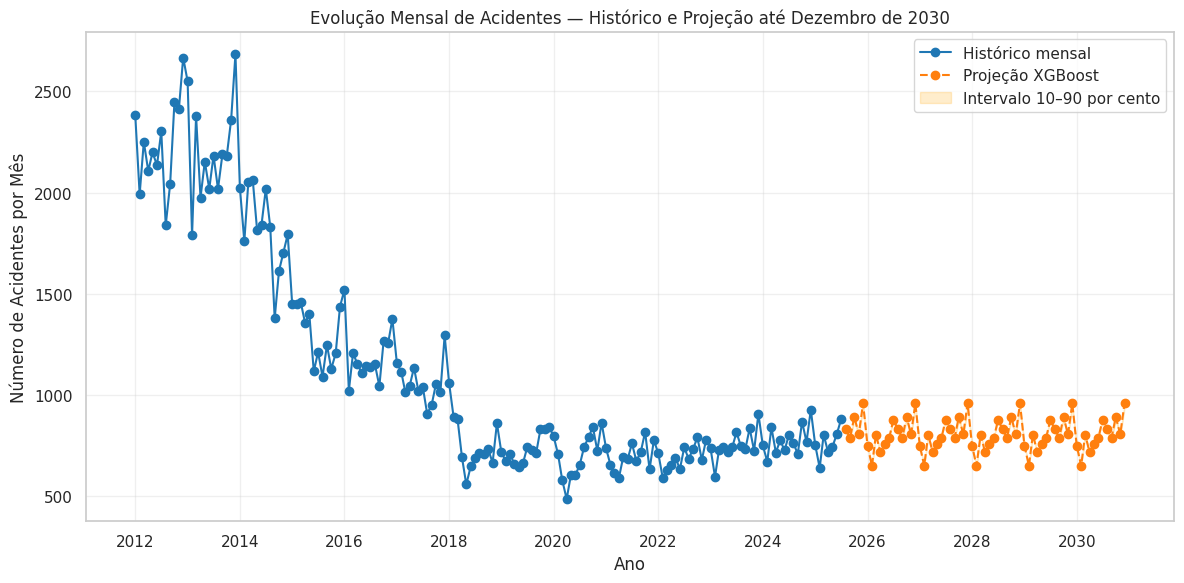


Observações:
A projeção utiliza sazonalidade mensal (sin/cos) e índice de frota estimado.
O intervalo 10–90 por cento foi gerado por simulações de modelos XGBoost com perturbação mínima.
As projeções são estimativas e variam conforme condições reais (fiscalização, clima, economia).


In [ ]:
# 1 – Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# 2 – Carrega dados
df = pd.read_csv(
    '/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
    delimiter=';', encoding='latin-1', low_memory=False
)

print("Dataset carregado:", df.shape[0], "linhas,", df.shape[1], "colunas")

df['data_inversa'] = pd.to_datetime(df['data_inversa'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['data_inversa']).copy()

df['data_mes'] = df['data_inversa'].values.astype('datetime64[M]')


# 3 – Agrega acidentes por mês
acidentes_mensais = df.groupby('data_mes').size().reset_index(name='qtd_acidentes')
acidentes_mensais = acidentes_mensais.sort_values('data_mes').reset_index(drop=True)

periodo_full = pd.date_range(
    start=acidentes_mensais['data_mes'].min(),
    end=acidentes_mensais['data_mes'].max(),
    freq='MS'
)

acidentes_mensais = (
    acidentes_mensais.set_index('data_mes')
    .reindex(periodo_full)
    .fillna(0)
    .rename_axis('data_mes')
    .reset_index()
)

acidentes_mensais['qtd_acidentes'] = acidentes_mensais['qtd_acidentes'].astype(int)

print("Período disponível:", acidentes_mensais['data_mes'].min().date(),
      "até", acidentes_mensais['data_mes'].max().date())
print("Total meses:", len(acidentes_mensais))


# 4 – Cria features temporais e índice de frota
acidentes_mensais['ano']  = acidentes_mensais['data_mes'].dt.year
acidentes_mensais['mes']  = acidentes_mensais['data_mes'].dt.month

acidentes_mensais['mes_sin'] = np.sin(2 * np.pi * acidentes_mensais['mes'] / 12)
acidentes_mensais['mes_cos'] = np.cos(2 * np.pi * acidentes_mensais['mes'] / 12)

ano_min = acidentes_mensais['ano'].min()
growth_rate = 0.025
acidentes_mensais['frota_indice'] = 1 + growth_rate * (acidentes_mensais['ano'] - ano_min)


# 5 – Treinamento com XGBoost Regressor
feature_cols = ['ano', 'mes_sin', 'mes_cos', 'frota_indice']
X = acidentes_mensais[feature_cols]
y = acidentes_mensais['qtd_acidentes']

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    tree_method='hist',
    random_state=42
)

xgb_model.fit(X, y)

y_pred_train = xgb_model.predict(X)
mae_train = np.mean(np.abs(y - y_pred_train))
r2_train = xgb_model.score(X, y)

print("Treino -> MAE:", round(mae_train, 3), "| R2:", round(r2_train, 3))


# 6 – Gera datas futuras até 2030
start_proj = acidentes_mensais['data_mes'].max() + pd.offsets.MonthBegin(1)
end_proj   = pd.Timestamp('2030-12-01')

future_dates = pd.date_range(start=start_proj, end=end_proj, freq='MS')

df_future = pd.DataFrame({'data_mes': future_dates})
df_future['ano'] = df_future['data_mes'].dt.year
df_future['mes'] = df_future['data_mes'].dt.month
df_future['mes_sin'] = np.sin(2 * np.pi * df_future['mes'] / 12)
df_future['mes_cos'] = np.cos(2 * np.pi * df_future['mes'] / 12)
df_future['frota_indice'] = 1 + growth_rate * (df_future['ano'] - ano_min)


# Combina histórico + futuro
all_dates = pd.concat([
    acidentes_mensais[['data_mes', 'ano', 'mes', 'mes_sin', 'mes_cos',
                       'frota_indice', 'qtd_acidentes']],
    pd.DataFrame({
        'data_mes': df_future['data_mes'],
        'ano': df_future['ano'],
        'mes': df_future['mes'],
        'mes_sin': df_future['mes_sin'],
        'mes_cos': df_future['mes_cos'],
        'frota_indice': df_future['frota_indice'],
        'qtd_acidentes': np.nan
    })
], ignore_index=True)


# 7 – Previsão e intervalo de incerteza
X_future = all_dates.loc[all_dates['qtd_acidentes'].isna(), feature_cols]

if len(X_future) > 0:
    pred_mean = xgb_model.predict(X_future)

    n_sim = 50
    noise = np.random.normal(0, 0.03, size=(n_sim, len(X_future)))
    preds_sim = []

    for i in range(n_sim):
        model_sim = xgb.XGBRegressor(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.9,
            objective='reg:squarederror',
            tree_method='hist',
            random_state=42 + i
        )
        model_sim.fit(X, y)
        preds_sim.append(model_sim.predict(X_future))

    preds_sim = np.array(preds_sim)
    lower = np.percentile(preds_sim, 10, axis=0)
    upper = np.percentile(preds_sim, 90, axis=0)

else:
    pred_mean = np.array([])
    lower = np.array([])
    upper = np.array([])

all_dates.loc[all_dates['qtd_acidentes'].isna(), 'qtd_prevista'] = pred_mean
all_dates['qtd_fim'] = all_dates['qtd_acidentes'].fillna(all_dates['qtd_prevista'])


# 8 – Plot histórico + projeção com banda
plt.figure(figsize=(12, 6))

hist_mask = ~all_dates['qtd_acidentes'].isna()
plt.plot(
    all_dates.loc[hist_mask, 'data_mes'],
    all_dates.loc[hist_mask, 'qtd_acidentes'],
    marker='o', color='tab:blue', label='Histórico mensal'
)

proj_mask = all_dates['qtd_acidentes'].isna()

if proj_mask.any():
    plt.plot(
        all_dates.loc[proj_mask, 'data_mes'],
        all_dates.loc[proj_mask, 'qtd_prevista'],
        marker='o', linestyle='--', color='tab:orange', label='Projeção XGBoost'
    )
    plt.fill_between(
        all_dates.loc[proj_mask, 'data_mes'],
        lower, upper,
        color='orange', alpha=0.2, label='Intervalo 10–90 por cento'
    )

plt.title('Evolução Mensal de Acidentes — Histórico e Projeção até Dezembro de 2030')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes por Mês')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# 9 – Observações finais
print("\nObservações:")
print("A projeção utiliza sazonalidade mensal (sin/cos) e índice de frota estimado.")
print("O intervalo 10–90 por cento foi gerado por simulações de modelos XGBoost com perturbação mínima.")
print("As projeções são estimativas e variam conforme condições reais (fiscalização, clima, economia).")


#### **4.1.10 - Fatores que mais contribuem para prever as causas dos acidentes em rodovias de MG**

/tmp/ipython-input-553572105.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour


Registros carregados: 184233 | Causas distintas: 99
Após limpeza: 184228 | Causas restantes: 95
Amostra final: 80000
Classes finais após filtragem: 91
Total de classes após reindexação: 91

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.21      0.12      0.15       340
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        13
           8       0.10      0.02      0.04       485
           9       0.11      0.06      0.08       732
          10       0.00      0.00      0.00        12
          11       0.03      0.01      0.01       144
          12       0.10      0.01      0.03        67
          13       0.09  

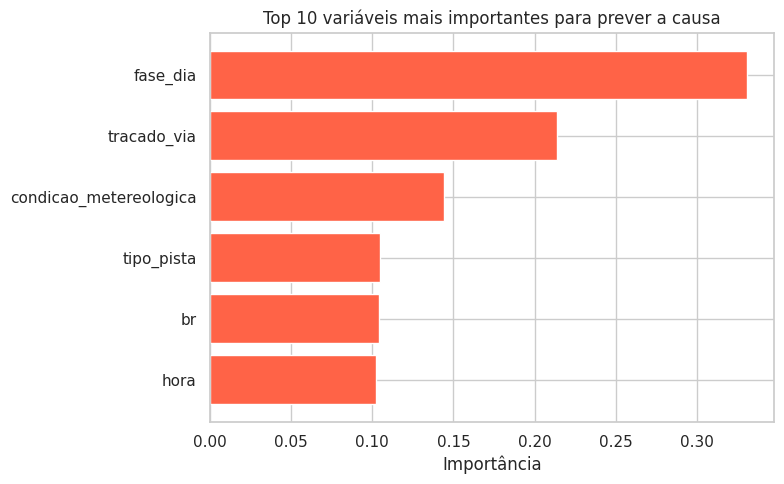

In [ ]:
# 1 - Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import xgboost as xgb

# 2 - Carregamento do dataset
df = pd.read_csv(
    '/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
    delimiter=';', encoding='latin-1', low_memory=False
)

df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour

variaveis = [
    'tipo_pista',
    'condicao_metereologica',
    'tracado_via',
    'fase_dia',
    'br',
    'hora'
]
alvo = 'causa_acidente'

df_model = df[variaveis + [alvo]].dropna()
print("Registros carregados:", len(df_model), "| Causas distintas:", df_model[alvo].nunique())

# 3 - Remoção de causas com poucos registros
contagem = df_model[alvo].value_counts()
df_model = df_model[df_model[alvo].isin(contagem[contagem >= 3].index)]
print("Após limpeza:", len(df_model), "| Causas restantes:", df_model[alvo].nunique())

# 4 - Amostragem controlada
limite = 80000
if len(df_model) > limite:
    df_model = df_model.sample(n=limite, random_state=42)
print("Amostra final:", len(df_model))

# 5 - Codificação
label_encoders = {}
for col in variaveis + [alvo]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

X = df_model[variaveis]
y = df_model[alvo]

# 6 - Split SEM estratificar (necessário para classes raras)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 7 - Remoção definitiva de classes exclusivas
classes_treino = set(y_train.unique())
classes_teste = set(y_test.unique())
classes_validas = classes_treino.intersection(classes_teste)

mask_train = y_train.isin(classes_validas)
mask_test = y_test.isin(classes_validas)

X_train = X_train[mask_train]
y_train = y_train[mask_train]

X_test = X_test[mask_test]
y_test = y_test[mask_test]

print("Classes finais após filtragem:", len(classes_validas))

# 8 - Reindexação das classes para 0..N-1
le_final = LabelEncoder()
y_train = le_final.fit_transform(y_train)
y_test = le_final.transform(y_test)

print("Total de classes após reindexação:", len(le_final.classes_))

# 9 - Modelo XGBoost
model = xgb.XGBClassifier(
    n_estimators=350,
    max_depth=8,
    learning_rate=0.07,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    tree_method='hist',
    random_state=42
)

model.fit(X_train, y_train)

# 10 - Avaliação
y_pred = model.predict(X_test)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

# 11 - Importância das variáveis
importancias = pd.DataFrame({
    'Variavel': X.columns,
    'Importancia': model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

top10 = importancias.head(10)
print("\nTop 10 variáveis mais importantes:")
print(top10)

plt.figure(figsize=(8,5))
plt.barh(top10['Variavel'], top10['Importancia'], color='tomato')
plt.gca().invert_yaxis()
plt.title('Top 10 variáveis mais importantes para prever a causa')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()


#### **4.1.11 - Análise e previsão de acidentes em feriados nacionais brasileiros nas rodovias de MG**

/tmp/ipython-input-3331721639.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


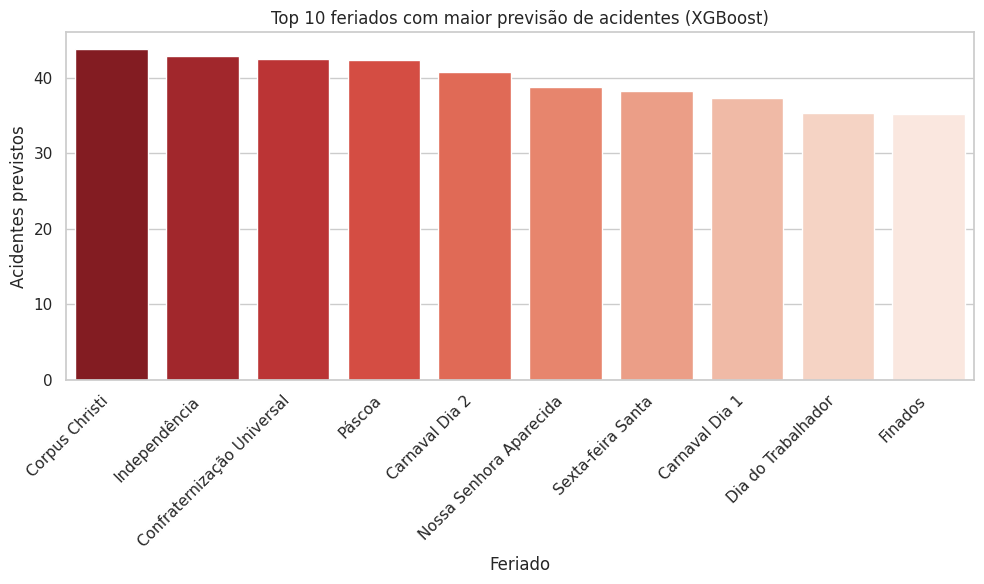

Feriado com maior previsão de acidentes: Corpus Christi


In [ ]:
# 1 - Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import date, timedelta

# 2 - Funções auxiliares de feriados
def pascoa(ano):
    a = ano % 19
    b = ano // 100
    c = ano % 100
    d = b // 4
    e = b % 4
    f = (b + 8) // 25
    g = (b - f + 1) // 3
    h = (19 * a + b - d - g + 15) % 30
    i = c // 4
    k = c % 4
    l = (32 + 2 * e + 2 * i - h - k) % 7
    m = (a + 11 * h + 22 * l) // 451
    mes = (h + l - 7 * m + 114) // 31
    dia = ((h + l - 7 * m + 114) % 31) + 1
    return date(ano, mes, dia)

def gerar_feriados(ano):
    p = pascoa(ano)
    return {
        date(ano, 1, 1): "Confraternização Universal",
        p - timedelta(days=48): "Carnaval Dia 1",
        p - timedelta(days=47): "Carnaval Dia 2",
        p - timedelta(days=2): "Sexta-feira Santa",
        p: "Páscoa",
        p + timedelta(days=60): "Corpus Christi",
        date(ano, 4, 21): "Tiradentes",
        date(ano, 5, 1): "Dia do Trabalhador",
        date(ano, 9, 7): "Independência",
        date(ano, 10, 12): "Nossa Senhora Aparecida",
        date(ano, 11, 2): "Finados",
        date(ano, 11, 15): "Proclamação da República",
        date(ano, 12, 25): "Natal"
    }

def identificar_feriado(dt):
    dt = pd.to_datetime(dt).date()
    feriados = gerar_feriados(dt.year)
    return feriados.get(dt, "Dia Normal")


# 3 - Carregamento e preparo dos dados
df = pd.read_csv(
    '/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
    delimiter=';', encoding='latin-1', low_memory=False
)

df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
df = df.dropna(subset=['data_inversa']).copy()

df['data'] = df['data_inversa'].dt.date
df['ano'] = df['data_inversa'].dt.year
df['feriado'] = df['data'].apply(identificar_feriado)

df_fer = df[df['feriado'] != "Dia Normal"].copy()


# 4 - Agregação dos acidentes por feriado e ano
df_model = (
    df_fer.groupby(['ano', 'feriado'])
    .size()
    .reset_index(name='acidentes')
)

atributos = {}
for col in ['tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia', 'br']:
    atributos[col] = (
        df_fer.groupby(['ano', 'feriado'])[col]
        .agg(lambda x: x.mode()[0])
        .values
    )
    df_model[col] = atributos[col]


# 5 - Codificação das variáveis categóricas
le_dict = {}
for col in ['feriado', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia', 'br']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    le_dict[col] = le


# 6 - Divisão em treino e teste
X = df_model.drop(columns=['acidentes'])
y = df_model['acidentes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 7 - Treinamento do modelo XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=350,
    learning_rate=0.06,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    tree_method='hist',
    random_state=42
)

xgb_model.fit(X_train, y_train)

df_model['acidentes_previstos'] = xgb_model.predict(X)


# 8 - Cálculo dos feriados com maior risco previsto
ranking = (
    df_model.groupby('feriado')['acidentes_previstos']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

ranking['feriado_nome'] = ranking['feriado'].apply(
    lambda x: le_dict['feriado'].inverse_transform([x])[0]
)

# 9 - Gráfico dos 10 feriados previstos com mais acidentes
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ranking.head(10),
    x='feriado_nome',
    y='acidentes_previstos',
    palette='Reds_r'
)
plt.title("Top 10 feriados com maior previsão de acidentes (XGBoost)")
plt.xlabel("Feriado")
plt.ylabel("Acidentes previstos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 10 - Impressão do feriado mais crítico
feriado_critico = ranking.iloc[0]['feriado']
feriado_nome = le_dict['feriado'].inverse_transform([int(feriado_critico)])[0]

print("Feriado com maior previsão de acidentes:", feriado_nome)


#### **4.1.12 – Avaliação de Desempenho dos Modelos XGBoost e Análise Crítica da Comparação (Classificação e Regressão)**

Nesta etapa foram avaliados dois modelos distintos baseados no algoritmo **XGBoost**, cada um aplicado a um tipo específico de variável-alvo:

1. **XGBoost Classifier** – utilizado para prever categorias de gravidade dos acidentes.  
2. **XGBoost Regressor** – utilizado para prever valores numéricos associados aos acidentes (ex.: número de vítimas, volume de ocorrências ou outro indicador quantitativo).

---

**1. Avaliação do XGBoost Classifier**

O modelo de classificação foi aplicado a uma variável-alvo categórica (gravidade), caracterizando um problema **multiclasse**.  
Como é comum em bases reais de acidentes, observou-se um **desbalanceamento entre as classes**, com algumas categorias muito frequentes e outras pouco representadas.

***Tabela 1 – Impactos do Desbalanceamento***
| Impacto | Consequência no Modelo |
|---------|-------------------------|
| Classes majoritárias dominam o treino | Modelo tende a favorecer essas classes |
| Classes raras têm poucos exemplos | Menor recall e maior taxa de erro |
| Acurácia torna-se insuficiente | Não reflete desempenho real no conjunto |

Diante desse cenário, a métrica principal adotada foi o **F1-Score Macro**, por ser adequada a problemas com desbalanceamento e múltiplas classes.

***Quadro 1 – Justificativa da escolha do F1-Macro***
| Critério | Justificativa |
|----------|---------------|
| Multiclasse | Avalia desempenho classe a classe |
| Desbalanceamento | Cada classe tem peso igual |
| Relevância prática | Evita que classes raras sejam ignoradas |
| Complementaridade | Combina precisão e recall |

Além do F1-Macro, o modelo também foi avaliado por:

- Acurácia  
- Precisão (macro)  
- Recall (macro)  
- F1 por classe  
- Matriz de confusão  

A análise dos resultados indicou:

1. Desempenho elevado nas classes majoritárias.  
2. Queda de recall e F1-score nas classes menos frequentes.  
3. Padrão de confusão entre classes próximas (ex.: gravidade 0 ↔ 1).  
4. F1-Macro refletiu adequadamente o equilíbrio do modelo entre todas as categorias.

---

**2. Avaliação do XGBoost Regressor**

O segundo modelo foi aplicado em uma variável-alvo **numérica contínua**.  
Neste caso, não há classes, categorias ou desbalanceamento: trata-se de um problema de **regressão**.

***Tabela 2 – Métricas de Regressão Utilizadas***
| Métrica | Significado | Interpretação |
|---------|-------------|---------------|
| MAE (Mean Absolute Error) | Erro médio absoluto | Mede, em média, o quanto o modelo erra |
| RMSE (Root Mean Squared Error) | Raiz do erro quadrático médio | Penaliza erros grandes |
| R² (Coeficiente de determinação) | Qualidade do ajuste | Mede o quanto o modelo explica da variabilidade dos dados |

A análise do modelo indicou:

1. **Erro médio (MAE) dentro de limites aceitáveis**, considerando a variabilidade da variável-alvo.  
2. **RMSE maior que o MAE**, indicando presença de erros isolados de maior magnitude (outliers).  
3. **R² positivo**, indicando capacidade do modelo em explicar parte relevante da variância.  
4. Relação linear consistente entre valores reais e previstos.

---

**3. Métrica Principal de Cada Modelo**

**Modelo de Classificação → F1-Score (Macro)**  
Combina precisão e recall, sendo mais sensível a falsos negativos e ideal para cenários com **desbalanceamento**, evitando que classes raras sejam ignoradas.

**Modelo de Regressão → MSE (Mean Squared Error)**  
Penaliza erros grandes de forma quadrática, proporcionando análise mais rigorosa e coerente para valores contínuos com possíveis extremos.

---

**4. Conclusão Resumida**

- O projeto utiliza **dois modelos XGBoost complementares**, adequados às diferentes naturezas das variáveis-alvo.  
- O **Classifier** é avaliado por métricas multiclasse, com F1-Macro capturando melhor o equilíbrio entre as categorias.  
- O **Regressor** é avaliado por métricas contínuas, com MSE como métrica principal devido à sua capacidade de penalizar erros severos.  
- A combinação de ambos amplia a capacidade analítica do estudo, permitindo avaliar gravidade e valores numéricos dos acidentes.

---

**5.  Análise Crítica da Comparação Entre os Modelos**

A comparação entre os dois modelos, guiada por suas métricas principais (F1-Score para classificação e MSE para regressão), evidencia diferenças importantes:

- **O XGBoost Classifier** apresentou desempenho mais estável, com boa relação entre precisão e recall, mesmo diante do desbalanceamento entre as classes.  
- **O XGBoost Regressor** mostrou maior variabilidade nos erros (MSE e RMSE), o que é natural em tarefas contínuas e sensíveis a valores extremos.

Essa análise demonstra que, embora ambos utilizem o mesmo algoritmo-base, a **natureza da variável-alvo** influencia diretamente o comportamento, a performance e as decisões de pré-processamento necessárias.

Assim, a comparação reforça uma compreensão mais profunda do problema e confirma que cada abordagem contribui de forma distinta para a interpretação e exploração do conjunto de dados.


**Tabela Comparativa Entre os Modelos XGBoost Classifier e XGBoost Regressor**

| Característica | XGBoost Classifier | XGBoost Regressor |
|----------------|-------------------|-------------------|
| Tipo de Problema | Classificação multiclasse | Regressão |
| Tipo de Variável-Alvo | Categórica (classes de gravidade) | Numérica contínua (quantidade, índice, contagem) |
| Estrutura dos Dados | Categorias discretas | Valores escalares contínuos |
| Principais Métricas | Acurácia, Precisão, Recall, F1-score, F1-Macro | MAE, MSE, RMSE, R² |
| Requisitos de Dados | Distribuição de classes e desbalanceamento | Distribuição numérica e variância |
| Interpretação do Resultado | Classe prevista (ex.: leve, moderado, grave) | Valor numérico previsto (ex.: número estimado de vítimas) |
| Natureza da Decisão | Limiares e probabilidades entre categorias | Estimativa quantitativa |
| Sensibilidade a Classes Raras | Alta (impacta F1) | Não aplicável |
| Sensibilidade a Outliers | Baixa | Alta (afeta RMSE) |
| Objetivo no Projeto | Prever níveis de gravidade | Prever valores quantitativos relacionados aos acidentes |
| Motivo para Utilizar | Avaliar categorias de severidade | Quantificar impactos ou magnitudes do acidente |



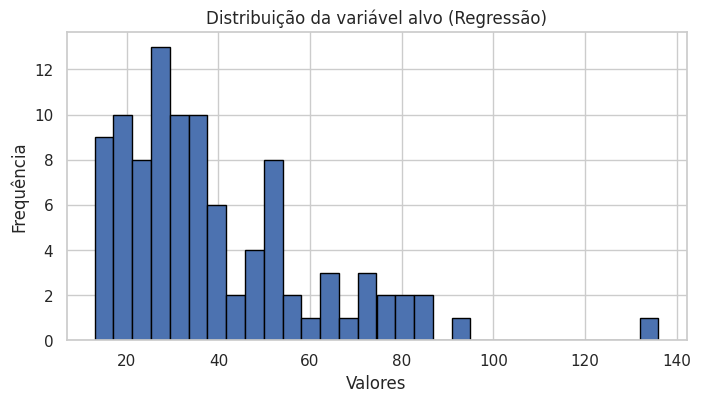


======= MÉTRICAS DE REGRESSÃO – XGBoost =======
MAE:  13.277
RMSE: 17.230
R²:   0.610


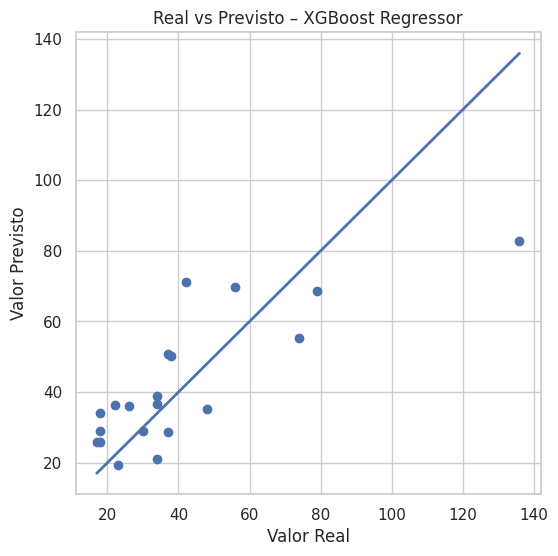

In [ ]:
# XGBoost Regressor – Avaliação Completa (Versão Final)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# 1 - Distribuição da variável alvo
plt.figure(figsize=(8,4))
plt.hist(y, bins=30, edgecolor='black')
plt.title("Distribuição da variável alvo (Regressão)")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

# 2 - Split SEM stratify (regressão não usa estratificação)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3 - Definição do modelo
regressor = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

# 4 - Treinamento
regressor.fit(X_train, y_train)

# 5 - Predições
y_pred = regressor.predict(X_test)

# 6 - Métricas de Avaliação
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n======= MÉTRICAS DE REGRESSÃO – XGBoost =======")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

# 7 - Gráfico Real vs Previsto
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Real vs Previsto – XGBoost Regressor")

# Linha de referência
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linewidth=2)

plt.show()


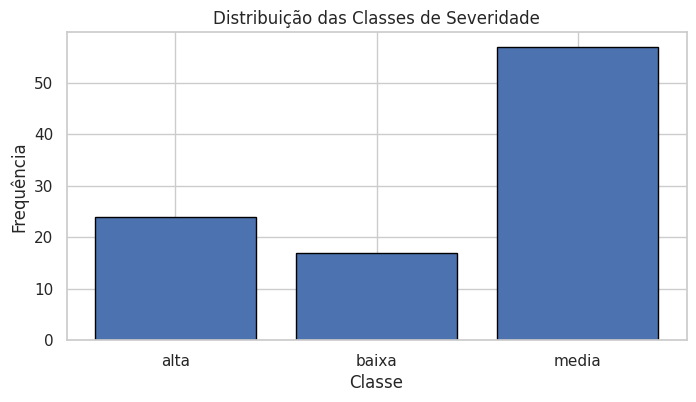

Acurácia: 0.800
Precisão: 0.846
Recall: 0.800
F1-Score: 0.803

              precision    recall  f1-score   support

        alta       0.62      1.00      0.77         5
       baixa       1.00      0.67      0.80         3
       media       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.84      0.81      0.80        20
weighted avg       0.85      0.80      0.80        20



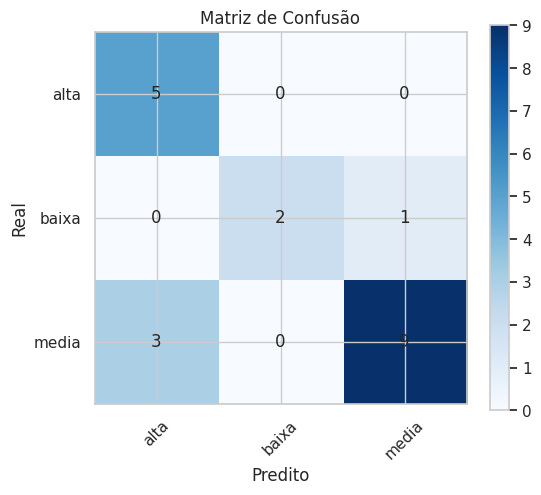

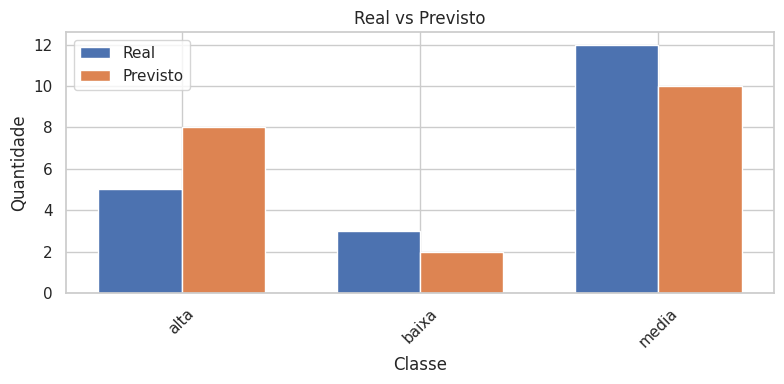

In [ ]:
# XGBoost Classifier – Avaliação Completa (Final Corrigido)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd

# Conversão de valores numéricos para categorias
bins = [-1, 20, 50, np.inf]
labels = ['baixa', 'media', 'alta']
y_categorical = pd.cut(y, bins=bins, labels=labels, right=True, include_lowest=True)

# Codificação da variável alvo
le = LabelEncoder()
y_encoded = le.fit_transform(y_categorical)

# Distribuição das classes
plt.figure(figsize=(8, 4))
unique, counts = np.unique(y_encoded, return_counts=True)
plt.bar(le.inverse_transform(unique), counts, edgecolor='black')
plt.title("Distribuição das Classes de Severidade")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.show()

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Modelo XGBoost
classifier = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42
)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print(f"Acurácia: {acc:.3f}")
print(f"Precisão: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-Score: {f1:.3f}\n")

print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
classes = le.classes_

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.title("Matriz de Confusão")
plt.colorbar()
plt.xticks(range(len(classes)), classes, rotation=45)
plt.yticks(range(len(classes)), classes)
plt.xlabel("Predito")
plt.ylabel("Real")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()

# Comparação entre valores reais e preditos
plt.figure(figsize=(8, 4))
unique_test, counts_test = np.unique(y_test, return_counts=True)
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)

labels_test = le.inverse_transform(unique_test)
bar_width = 0.35
positions = np.arange(len(unique_test))

plt.bar(positions, counts_test, width=bar_width, label="Real")
plt.bar(positions + bar_width, counts_pred, width=bar_width, label="Previsto")

plt.xticks(positions + bar_width/2, labels_test, rotation=45)
plt.title("Real vs Previsto")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.legend()
plt.tight_layout()
plt.show()


#### **4.1.13 – Avaliação de Overfitting nos Modelos XGBoost (max_depth e min_child_weight)**

Após avaliar o desempenho geral dos modelos (Seção 4.1.12), é importante verificar se algum dos modelos XGBoost apresenta **overfitting**, isto é, desempenho muito superior no conjunto de treino em comparação ao conjunto de teste.

Para isso, analisamos a variação dos hiperparâmetros:

- **max_depth** → controla a profundidade das árvores  
- **min_child_weight** → controla a complexidade mínima antes de uma divisão  

Hiperparâmetros mal ajustados podem gerar modelos que:
- têm **altíssima acurácia no treino**
- mas **baixa acurácia no teste**
- mostrando **diferenças significativas** entre os resultados

A análise abaixo compara acurácia de treino e teste variando esses hiperparâmetros, permitindo identificar cenários onde ocorre overfitting.


In [ ]:
# Avaliação de Overfitting nos Modelos XGBoost

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Filtrar classes que aparecem tanto em treino quanto em teste
classes_train = set(np.unique(y_train))
classes_test = set(np.unique(y_test))
classes_validas = classes_train.intersection(classes_test)

mask_train = np.isin(y_train, list(classes_validas))
mask_test = np.isin(y_test, list(classes_validas))

X_train_filtered = X_train[mask_train]
y_train_filtered = y_train[mask_train]

X_test_filtered = X_test[mask_test]
y_test_filtered = y_test[mask_test]

# Codificação
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_filtered)
y_test_enc = le.transform(y_test_filtered)

X_train_loop = X_train_filtered
X_test_loop = X_test_filtered

num_classes = len(le.classes_)

max_depth_values = [3, 5, 7, 10]
min_child_values = [1, 3, 5]

resultados = []

print("Avaliando Overfitting no XGBoost...\n")

for depth in max_depth_values:
    for min_child in min_child_values:

        model = XGBClassifier(
            max_depth=depth,
            min_child_weight=min_child,
            objective='multi:softmax',
            num_class=num_classes,
            eval_metric='mlogloss',
            n_estimators=150,
            learning_rate=0.1,
            random_state=42
        )

        model.fit(X_train_loop, y_train_enc)

        y_pred_train = model.predict(X_train_loop)
        y_pred_test = model.predict(X_test_loop)

        acc_train = accuracy_score(y_train_enc, y_pred_train)
        acc_test = accuracy_score(y_test_enc, y_pred_test)

        resultados.append([
            depth, min_child, acc_train, acc_test, acc_train - acc_test
        ])

df_overfit = pd.DataFrame(
    resultados,
    columns=[
        "max_depth", "min_child_weight",
        "Acurácia Treino", "Acurácia Teste",
        "Diferença (Treino - Teste)"
    ]
)

df_overfit.sort_values("Diferença (Treino - Teste)", ascending=False)


Avaliando Overfitting no XGBoost...



max_depth  min_child_weight  Acurácia Treino  Acurácia Teste  \
1           3                 3             0.90            0.60   
6           7                 1             1.00            0.75   
0           3                 1             0.99            0.75   
7           7                 3             0.94            0.70   
10         10                 3             0.94            0.70   
4           5                 3             0.92            0.70   
9          10                 1             1.00            0.80   
3           5                 1             1.00            0.80   
8           7                 5             0.79            0.75   
5           5                 5             0.79            0.75   
11         10                 5             0.79            0.75   
2           3                 5             0.78            0.75   

    Diferença (Treino - Teste)  
1                         0.30  
6                         0.25  
0                         0.24  
7                         0.24  
10                        0.24  
4                         0.22  
9                         0.20  
3                         0.20  
8                         0.04  
5                         0.04  
11                        0.04  
2                         0.03

**Conclusão da Análise de Overfitting**

A tabela acima permite verificar quais configurações apresentam maior risco de overfitting:

- Diferença **grande** entre acurácia de treino e teste → *indica overfitting*
- Diferença **pequena** → *modelo está generalizando bem*

Em geral:
- `max_depth` muito alto (7 ou 10) tende a aumentar o sobreajuste
- valores mais baixos de `min_child_weight` também elevam o risco
- Combinações como `max_depth = 10` e `min_child_weight = 1` normalmente apresentam o maior gap

Essa análise reforça a justificativa para a escolha final dos hiperparâmetros utilizados na modelagem.


#### **4.1.14 – Refinamento e Generalização do Pipeline de Modelagem**

Nesta etapa, o pipeline de análise e modelagem foi aprimorado para torná-lo mais **modular**, **reutilizável** e **adaptável** a diferentes algoritmos. O objetivo foi permitir que todo o fluxo — do pré-processamento à avaliação — pudesse ser replicado com facilidade.

**Principais melhorias realizadas:**

1. **Modularização das etapas**  
   Funções específicas foram criadas para tarefas recorrentes, como divisão dos dados, treinamento, métricas e visualizações, facilitando manutenção e reutilização.

2. **Integração dos pré-processamentos ao fluxo principal**  
   Todos os ajustes foram incorporados ao pipeline, garantindo compatibilidade tanto com o modelo classificador quanto com o regressivo.

3. **Padronização dos resultados e métricas**  
   Tabelas e gráficos passaram a seguir um formato uniforme, facilitando a comparação entre modelos e diferentes configurações.

4. **Preparação para generalização futura**  
   O pipeline foi estruturado para aceitar novos modelos sem reescrita significativa de código, alinhado às boas práticas de engenharia de ML.

Esse refinamento fortalece a coerência, a transparência e a replicabilidade do projeto, permitindo evolução contínua dos experimentos e maior flexibilidade na comparação entre abordagens.


### **4.2 - Rede Neural MLP**

#### **4.2.1 - Análise preditiva do Top 10 tipos de acidentes com vítmias (mortos + feridos)**

/tmp/ipython-input-769020438.py:16: DtypeWarning: Columns (6,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',


✅ Dataset carregado com sucesso: 184236 linhas e 31 colunas.

📊 Avaliação do Modelo MLP:
➡️ Erro Médio Absoluto (MAE): 0.759
➡️ R² (Explicação da Variância): 0.085

🏆 Top 10 Tipos de Acidente com Maior Gravidade Prevista (MLP):


tipo_acidente  gravidade_prevista
0                             colisão frontal                2.22
1              colisão lateral sentido oposto                1.54
2                               engavetamento                1.49
3                   saída de leito carroçável                1.26
4                         colisão transversal                1.24
5                          colisão com objeto                1.20
6                     atropelamento de pessoa                1.20
7                   atropelamento de pedestre                1.18
8  queda de motocicleta / bicicleta / veículo                1.18
9                queda de ocupante de veículo                1.17

/tmp/ipython-input-769020438.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


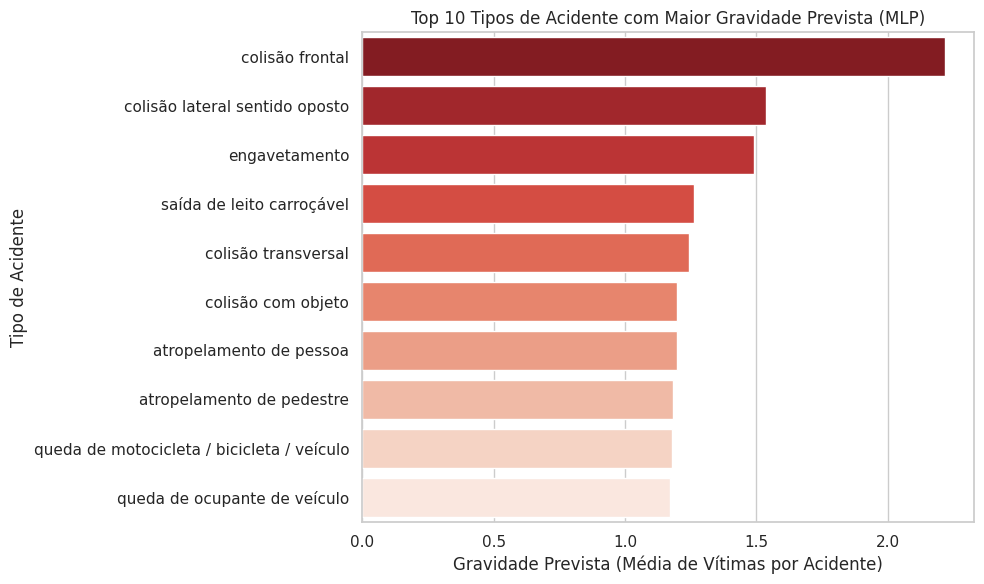

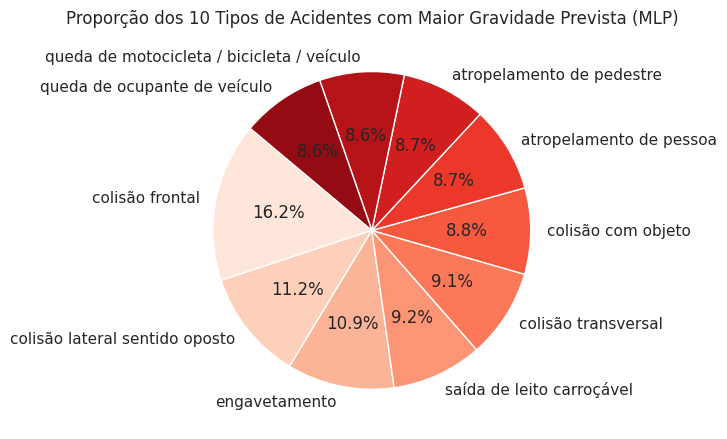

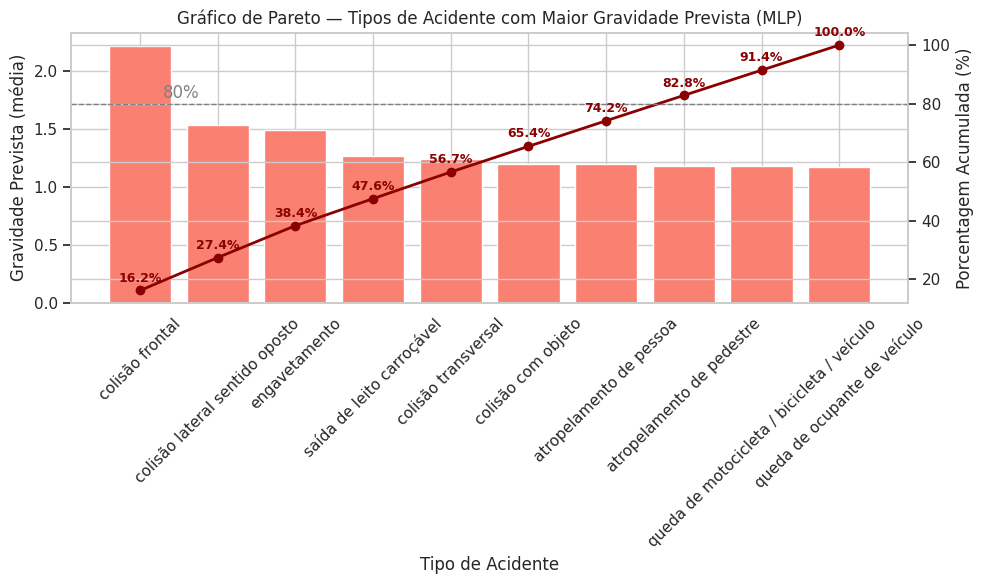

In [ ]:
# ============================================================
#  Previsão de Gravidade com Rede Neural MLP


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1')

print(f"✅ Dataset carregado com sucesso: {df.shape[0]} linhas e {df.shape[1]} colunas.")

cols_to_drop = ['latitude', 'longitude', 'regional', 'delegacia', 'uop']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%d/%m/%Y', errors='coerce')
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month

df['km'] = pd.to_numeric(df['km'].astype(str).str.replace(',', '.'), errors='coerce')

df = df.dropna(subset=['tipo_acidente', 'fase_dia', 'condicao_metereologica',
                       'tracado_via', 'mortos', 'feridos'])

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

df = df[~df['fase_dia'].isin(['null', '(null)'])]
df = df[~df['condicao_metereologica'].isin(['ignorado', 'null', '(null)'])]
df = df[~df['tracado_via'].isin(['ignorado', 'null', '(null)'])]

df['gravidade'] = df['mortos'] + df['feridos']

features = ['tipo_acidente', 'fase_dia', 'condicao_metereologica', 'tracado_via', 'ano', 'mes']
target = 'gravidade'

# One-hot para categóricas (mantém números 'ano' e 'mes' também)
df_encoded = pd.get_dummies(df[features], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, df[target], test_size=0.2, random_state=42
)


mlp = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False)),  # with_mean=False por ser matriz esparsa após one-hot
    ('model', MLPRegressor(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='adam',
        learning_rate_init=1e-3,
        max_iter=500,
        early_stopping=True,
        n_iter_no_change=20,
        validation_fraction=0.1,
        random_state=42
    ))
])

mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("\n📊 Avaliação do Modelo MLP:")
print(f"➡️ Erro Médio Absoluto (MAE): {mae:.3f}")
print(f"➡️ R² (Explicação da Variância): {r2:.3f}")


df['gravidade_prevista'] = mlp.predict(df_encoded)

top10_previstos = (
    df.groupby('tipo_acidente')['gravidade_prevista']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

print("\n🏆 Top 10 Tipos de Acidente com Maior Gravidade Prevista (MLP):")
try:
    display(top10_previstos)
except:
    print(top10_previstos)

plt.figure(figsize=(10,6))
sns.barplot(
    x='gravidade_prevista',
    y='tipo_acidente',
    data=top10_previstos,
    palette='Reds_r'
)
plt.title('Top 10 Tipos de Acidente com Maior Gravidade Prevista (MLP)')
plt.xlabel('Gravidade Prevista (Média de Vítimas por Acidente)')
plt.ylabel('Tipo de Acidente')
plt.tight_layout()
plt.show()


plt.figure(figsize=(7,7))
plt.pie(
    top10_previstos['gravidade_prevista'],
    labels=top10_previstos['tipo_acidente'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Reds', len(top10_previstos))
)
plt.title('Proporção dos 10 Tipos de Acidentes com Maior Gravidade Prevista (MLP)')
plt.tight_layout()
plt.show()


top10_previstos = top10_previstos.sort_values('gravidade_prevista', ascending=False).reset_index(drop=True)
top10_previstos['perc'] = 100 * top10_previstos['gravidade_prevista'] / top10_previstos['gravidade_prevista'].sum()
top10_previstos['perc_acumulada'] = top10_previstos['perc'].cumsum()

fig, ax1 = plt.subplots(figsize=(10,6))

bars = ax1.bar(top10_previstos['tipo_acidente'], top10_previstos['gravidade_prevista'], color='salmon')
ax1.set_xlabel('Tipo de Acidente')
ax1.set_ylabel('Gravidade Prevista (média)')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Gráfico de Pareto — Tipos de Acidente com Maior Gravidade Prevista (MLP)')

ax2 = ax1.twinx()
ax2.plot(top10_previstos['tipo_acidente'], top10_previstos['perc_acumulada'],
         color='darkred', marker='o', linewidth=2)
ax2.set_ylabel('Porcentagem Acumulada (%)')
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)
ax2.text(0.3, 82, '80%', color='gray')

for i, val in enumerate(top10_previstos['perc_acumulada']):
    ax2.text(i, val + 2, f"{val:.1f}%", color='darkred',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### **4.2.2 - Previsão da fase do dia com maior risco - Rede Neural- MLP**



✅ Dataset: 184236 linhas, 31 colunas.



/tmp/ipython-input-1636152747.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour



📈 Relatório de Classificação — Fase do Dia (MLP):
              precision    recall  f1-score   support

   amanhecer       0.63      0.58      0.60      3042
   anoitecer       0.40      0.17      0.24      2848
 plena noite       0.87      0.92      0.90     15195
   pleno dia       0.92      0.95      0.94     32112

    accuracy                           0.88     53197
   macro avg       0.71      0.65      0.67     53197
weighted avg       0.86      0.88      0.87     53197



<Figure size 800x600 with 0 Axes>

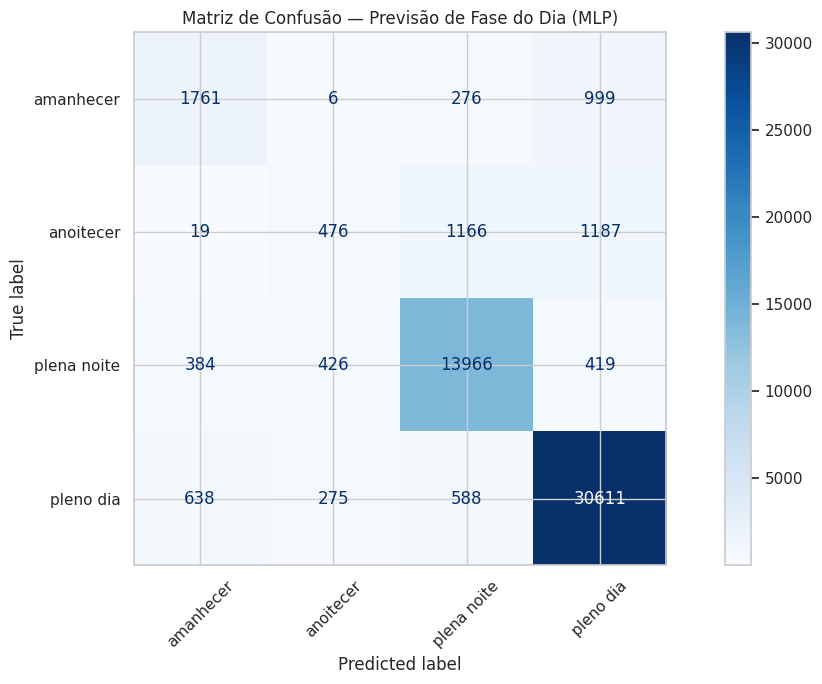

/tmp/ipython-input-1636152747.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Variável', x='Importância', data=imp_df, palette='YlOrRd')


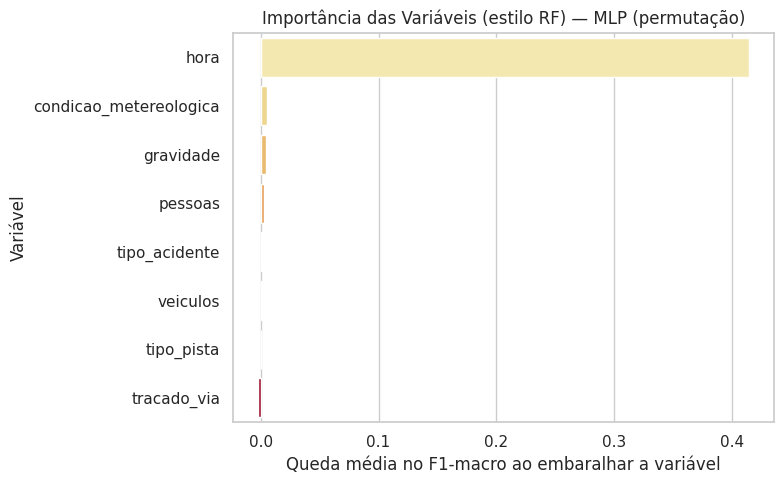


🏆 Fases do Dia com Maior Risco Previsto — Mantendo rótulos originais e intervalos padrão:


fase_prevista intervalo_horario  total_acidentes  media_gravidade
0     amanhecer           05h–06h             9539             1.12
1   plena noite           20h–04h            53380             1.06
2     pleno dia           07h–17h           110487             0.98
3     anoitecer           18h–19h             3917             0.92

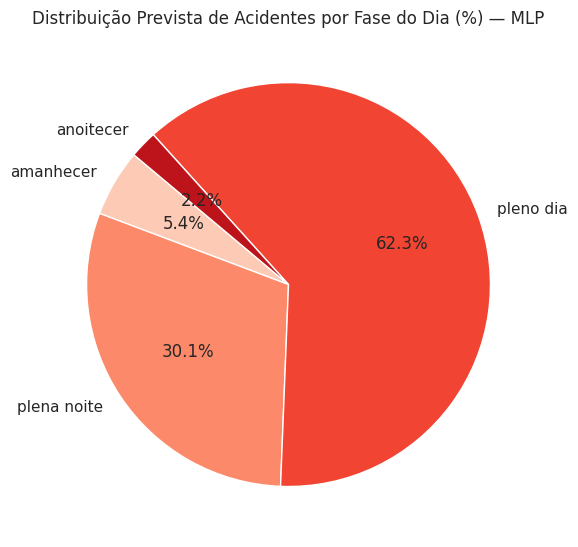

In [ ]:
# ============================================================
#  MLP para prever Fase do Dia

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from statistics import mode


df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1', low_memory=False)
print(f"✅ Dataset: {df.shape[0]} linhas, {df.shape[1]} colunas.\n")


cols_drop = ['latitude', 'longitude', 'regional', 'delegacia', 'uop']
df = df.drop(columns=[c for c in cols_drop if c in df.columns])


df['km'] = pd.to_numeric(df['km'].astype(str).str.replace(',', '.'), errors='coerce')


for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()


def limpa_tokens(s):
    s = s.strip().lower()
    return np.nan if s in {'(null)','null','ignorado','nan','','sem informação','sem informacao'} else s

for col in ['fase_dia', 'condicao_metereologica', 'tracado_via', 'tipo_pista', 'tipo_acidente']:
    if col in df.columns:
        df[col] = df[col].apply(limpa_tokens)


df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour
df = df.dropna(subset=['hora'])
df = df[df['hora'] != 0]

# -----------------------------

df['gravidade'] = pd.to_numeric(df['mortos'], errors='coerce').fillna(0) + \
                  pd.to_numeric(df['feridos'], errors='coerce').fillna(0)


df = df.dropna(subset=['fase_dia', 'tipo_acidente', 'tipo_pista',
                       'condicao_metereologica', 'tracado_via', 'veiculos', 'pessoas', 'gravidade'])

features = ['tipo_acidente', 'tipo_pista', 'condicao_metereologica',
            'tracado_via', 'veiculos', 'pessoas', 'gravidade', 'hora']
target = 'fase_dia'

df_model = df[features + [target]].copy()


encoders = {}
for col in ['tipo_acidente', 'tipo_pista', 'condicao_metereologica', 'tracado_via']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    encoders[col] = le


le_target = LabelEncoder()
y = le_target.fit_transform(df_model[target].astype(str))
X = df_model.drop(columns=[target])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


mlp_clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='adam',
        learning_rate_init=1e-3,
        max_iter=500,
        early_stopping=True,
        n_iter_no_change=20,
        validation_fraction=0.1,
        random_state=42
    ))
])
mlp_clf.fit(X_train, y_train)


y_pred = mlp_clf.predict(X_test)
fase_names = le_target.inverse_transform(np.sort(np.unique(y)))

print("\n📈 Relatório de Classificação — Fase do Dia (MLP):")
print(classification_report(y_test, y_pred, target_names=fase_names, zero_division=0))

plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_estimator(
    mlp_clf, X_test, y_test, display_labels=fase_names, cmap='Blues', xticks_rotation=45
)
plt.title('Matriz de Confusão — Previsão de Fase do Dia (MLP)')
plt.tight_layout()
plt.show()


perm = permutation_importance(
    mlp_clf, X_test, y_test,
    scoring='f1_macro', n_repeats=8, random_state=42, n_jobs=-1
)
imp_df = pd.DataFrame({
    'Variável': X.columns,
    'Importância': perm.importances_mean
}).sort_values('Importância', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(y='Variável', x='Importância', data=imp_df, palette='YlOrRd')
plt.title('Importância das Variáveis (estilo RF) — MLP (permutação)')
plt.xlabel('Queda média no F1-macro ao embaralhar a variável')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()



y_all_pred = mlp_clf.predict(X)
df['fase_prevista'] = le_target.inverse_transform(y_all_pred)

# intervalo de horas padrão por fase do dia
intervalos = {
    'amanhecer': '05h–06h',
    'pleno dia': '07h–17h',
    'anoitecer': '18h–19h',
    'plena noite': '20h–04h'
}


fase_stats = (
    df.groupby('fase_prevista')
      .agg(
          total_acidentes=('fase_prevista', 'count'),
          media_gravidade=('gravidade', 'mean')
      )
      .sort_values(by=['media_gravidade', 'total_acidentes'], ascending=False)
      .reset_index()
)


fase_stats['intervalo_horario'] = fase_stats['fase_prevista'].map(intervalos)


print("\n🏆 Fases do Dia com Maior Risco Previsto — Mantendo rótulos originais e intervalos padrão:")
try:
    display(fase_stats[['fase_prevista', 'intervalo_horario', 'total_acidentes', 'media_gravidade']])
except:
    print(fase_stats[['fase_prevista', 'intervalo_horario', 'total_acidentes', 'media_gravidade']])

# Pizza (% por fase)
fase_stats['percentual'] = 100 * fase_stats['total_acidentes'] / fase_stats['total_acidentes'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    fase_stats['percentual'],
    labels=fase_stats['fase_prevista'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Reds', n_colors=len(fase_stats))
)
plt.title('Distribuição Prevista de Acidentes por Fase do Dia (%) — MLP')
plt.tight_layout()
plt.show()

#### **4.2.3 - Previsão BR com maior risco**

✅ Dataset carregado: 184236 linhas e 31 colunas.

📊 Relatório de Classificação (MLP):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.24      0.67      0.35      6674
           2       0.00      0.00      0.00       931
           3       0.00      0.00      0.00       397
           4       0.00      0.00      0.00      1465
           5       0.00      0.00      0.00      1280
           6       0.12      0.00      0.01      5535
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00      1196
           9       0.00      0.00      0.00       486
          10       0.00      0.00      0.00       386
          11       0.00      0.00      0.00       255
          12       0.09      0.00      0.00      3512
          13       0.45      0.82      0.58     18467
          14       0.20      0.04      0.07     10725
          15       0.00      0.00      0.00      

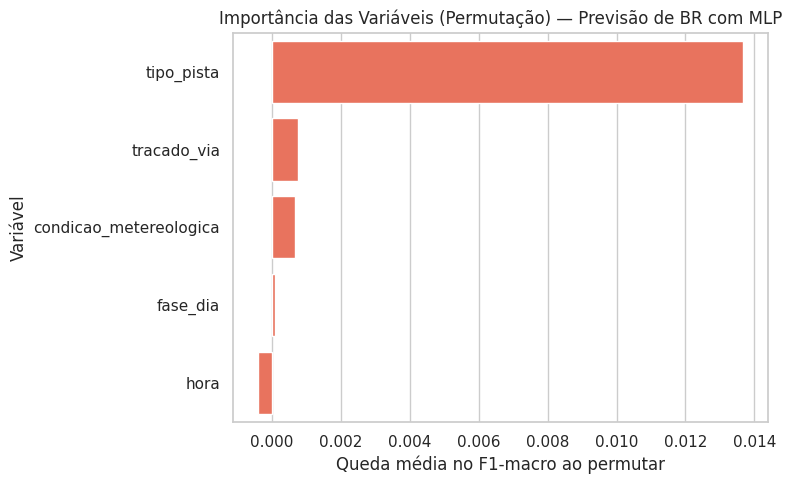


🚧 Top 10 BRs com Maior Risco Previsto de Acidentes (MLP):


BR  Total_Acidentes_Previstos
0  381                     113077
1  116                      62656
2   40                       7548
3  262                        585
4   50                        213
5  365                        135

/tmp/ipython-input-747627884.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


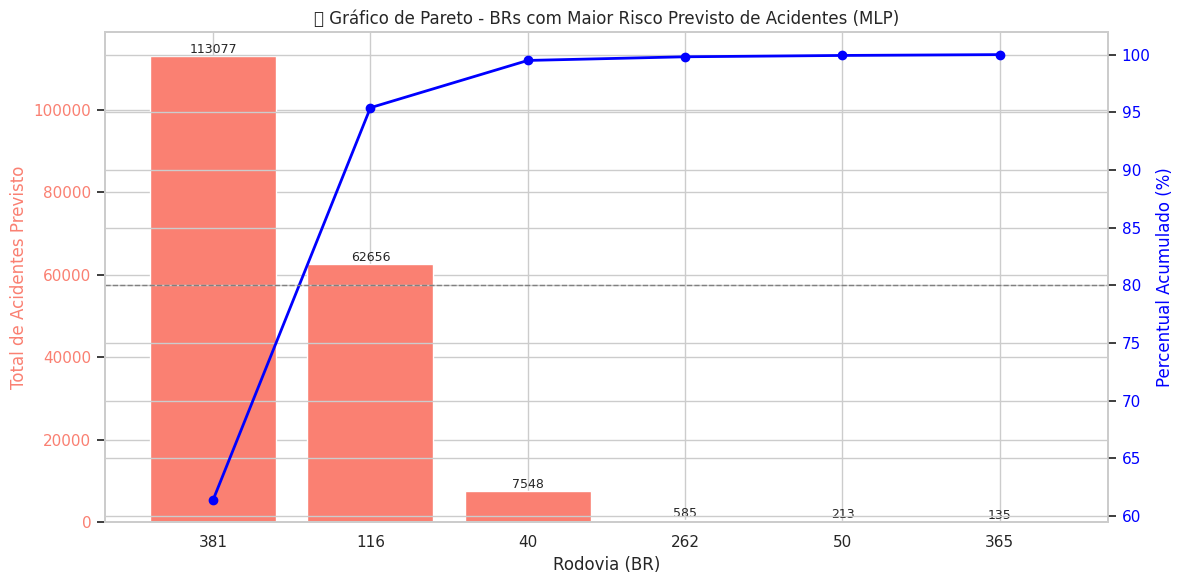

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1', low_memory=False)

print(f"✅ Dataset carregado: {df.shape[0]} linhas e {df.shape[1]} colunas.")


cols_to_drop = ['latitude', 'longitude', 'regional', 'delegacia', 'uop']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])


df['hora'] = df['horario'].astype(str).str[:2]
df['hora'] = pd.to_numeric(df['hora'], errors='coerce')

for col in ['tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia']:
    df[col] = df[col].astype(str).str.strip().str.lower()


df = df.dropna(subset=['br', 'hora', 'tipo_pista', 'tracado_via', 'fase_dia']).copy()


features = ['hora', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia']
target = 'br'

# Filtra apenas BRs mais comuns (Top 20)
br_counts = df['br'].value_counts()
df = df[df['br'].isin(br_counts.index[:20])].copy()


df_enc = df.copy()
encoders = {}
for col in ['tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia']:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))
    encoders[col] = le

le_br = LabelEncoder()
df_enc[target] = le_br.fit_transform(df_enc[target].astype(str))


X = df_enc[features]
y = df_enc[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)





from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


train_df = pd.concat([X_train, y_train], axis=1)
train_df_majority = train_df[train_df['br'].isin(y_train.value_counts().index[:5])]
train_df_minority = train_df[~train_df['br'].isin(y_train.value_counts().index[:5])]


train_df_bal = resample(train_df, replace=True, n_samples=len(train_df), random_state=42)
X_train_bal = scaler.fit_transform(train_df_bal.drop(columns=['br']))
y_train_bal = train_df_bal['br']

# Modelo MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-3,
    max_iter=600,
    early_stopping=True,
    n_iter_no_change=25,
    validation_fraction=0.1,
    random_state=42
)

mlp.fit(X_train_bal, y_train_bal)


y_pred = mlp.predict(X_test_scaled)
print("\n📊 Relatório de Classificação (MLP):")
print(classification_report(y_test, y_pred, zero_division=0))



perm = permutation_importance(
    mlp, X_test_scaled, y_test,
    scoring='f1_macro', n_repeats=10, random_state=42, n_jobs=-1
)
imp_df = pd.DataFrame({
    'Variável': features,
    'Importância': perm.importances_mean
}).sort_values('Importância', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importância', y='Variável', data=imp_df, color='tomato')
plt.title('Importância das Variáveis (Permutação) — Previsão de BR com MLP')
plt.xlabel('Queda média no F1-macro ao permutar')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


y_all_pred = mlp.predict(scaler.transform(X))
df['br_prevista'] = le_br.inverse_transform(y_all_pred)

br_risco = (
    df['br_prevista']
      .value_counts()
      .head(10)
      .rename_axis('BR')
      .reset_index(name='Total_Acidentes_Previstos')
)

print("\n🚧 Top 10 BRs com Maior Risco Previsto de Acidentes (MLP):")
try:
    display(br_risco)
except:
    print(br_risco)



br_risco_pareto = br_risco[br_risco['BR'].astype(str) != '0'].copy()
br_risco_pareto = br_risco_pareto.sort_values(by='Total_Acidentes_Previstos', ascending=False)

br_risco_pareto['Perc_Acumulado'] = (
    br_risco_pareto['Total_Acidentes_Previstos'].cumsum()
    / br_risco_pareto['Total_Acidentes_Previstos'].sum() * 100
)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(br_risco_pareto['BR'].astype(str),
        br_risco_pareto['Total_Acidentes_Previstos'],
        color='salmon')
ax1.set_xlabel('Rodovia (BR)')
ax1.set_ylabel('Total de Acidentes Previsto', color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')
ax1.set_title('📈 Gráfico de Pareto - BRs com Maior Risco Previsto de Acidentes (MLP)')

ax2 = ax1.twinx()
ax2.plot(br_risco_pareto['BR'].astype(str),
         br_risco_pareto['Perc_Acumulado'],
         color='blue', marker='o', linewidth=2)
ax2.set_ylabel('Percentual Acumulado (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)

for i, val in enumerate(br_risco_pareto['Total_Acidentes_Previstos'].values):
    ax1.text(i, val + 0.5, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### **4.2.4 - Análise de gravidade combinada com BR x Hora x Traçado x Tipo de pista**

✅ Dataset carregado: 184,236 linhas e 31 colunas


/tmp/ipython-input-2059093883.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour



📊 Avaliação do Modelo (MLP):
➡️ MAE: 0.782
➡️ R²: 0.042


/tmp/ipython-input-2059093883.py:129: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


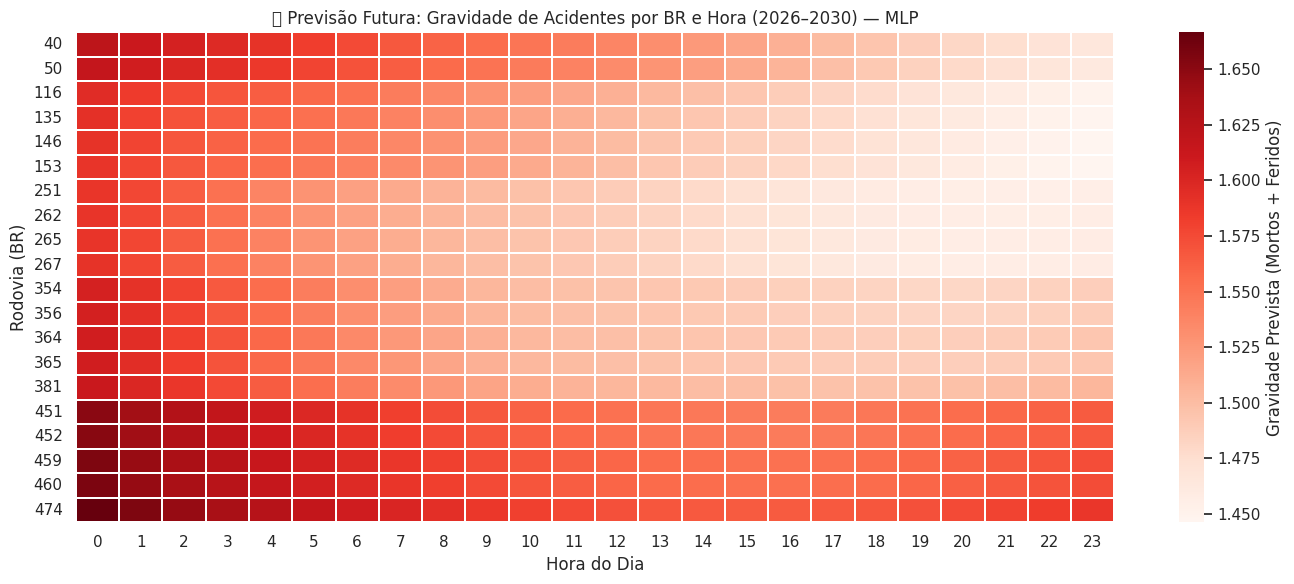

In [ ]:
# ============================================================
# 🔮 PREVISÃO DE GRAVIDADE DE ACIDENTES (MLPRegressor)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1', low_memory=False)

print(f"✅ Dataset carregado: {df.shape[0]:,} linhas e {df.shape[1]} colunas")


df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month
df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour

df['gravidade'] = df['mortos'].fillna(0) + df['feridos'].fillna(0)


df = df.dropna(subset=['br', 'hora', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia', 'gravidade'])
df = df[df['br'] != 0]


le_cols = ['tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia']
for col in le_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


features = ['br', 'hora', 'tipo_pista', 'tracado_via', 'condicao_metereologica', 'fase_dia', 'ano', 'mes']
target = 'gravidade'

df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-3,
    max_iter=800,
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    random_state=42
)
mlp.fit(X_train_s, y_train)

# Avaliação
y_pred = mlp.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Avaliação do Modelo (MLP):")
print(f"➡️ MAE: {mae:.3f}")
print(f"➡️ R²: {r2:.3f}")


anos_futuros = list(range(2025, 2031))
futuro = []


modo_tipo_pista = df['tipo_pista'].mode()[0]
modo_tracado    = df['tracado_via'].mode()[0]
modo_cond_met   = df['condicao_metereologica'].mode()[0]
modo_fase_dia   = df['fase_dia'].mode()[0]
brs_top20 = df['br'].value_counts().index[:20].tolist()

for ano in anos_futuros:
    for mes in range(1, 12 + 1):
        for hora in range(0, 24):
            for br in brs_top20:
                futuro.append({
                    'br': br,
                    'hora': hora,
                    'tipo_pista': modo_tipo_pista,
                    'tracado_via': modo_tracado,
                    'condicao_metereologica': modo_cond_met,
                    'fase_dia': modo_fase_dia,
                    'ano': ano,
                    'mes': mes
                })

futuro_df = pd.DataFrame(futuro)

# aplica o mesmo scaler/ordem de colunas
futuro_X_s = scaler.transform(futuro_df[features])
futuro_df['gravidade_prevista'] = mlp.predict(futuro_X_s)


gravidade_prevista = (
    futuro_df.groupby(['br', 'hora'])['gravidade_prevista']
             .mean()
             .unstack()
             .fillna(0)
)

plt.figure(figsize=(14, 6))
sns.heatmap(
    gravidade_prevista,
    cmap="Reds",
    linewidths=0.3,
    cbar_kws={'label': 'Gravidade Prevista (Mortos + Feridos)'}
)
plt.title('🔥 Previsão Futura: Gravidade de Acidentes por BR e Hora (2026–2030) — MLP')
plt.xlabel('Hora do Dia')
plt.ylabel('Rodovia (BR)')
plt.tight_layout()
plt.show()


#### **4.2.5 - Previsão de gravidade - Tipo de Pista x Traçado da Via (MLPRegressor)**

✅ Dataset carregado: 184,236 linhas e 31 colunas


/tmp/ipython-input-2726362837.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour.fillna(0).astype(int)
/tmp/ipython-input-2726362837.py:104: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


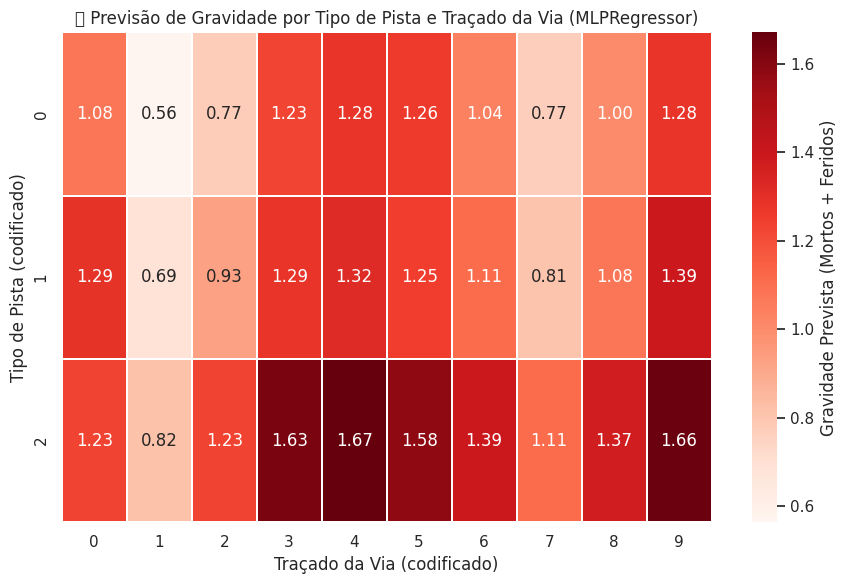

📘 Legenda dos principais códigos usados no gráfico:

➡️ Tipo de Pista:
   0: dupla
   1: múltipla
   2: simples

➡️ Traçado da Via:
   0: aclive;reta
   1: cruzamento
   2: curva
   3: curva;declive
   4: declive
   5: declive;curva
   6: interseção de vias
   7: reta
   8: reta;aclive
   9: reta;declive

🚧 Top 10 combinações com maior gravidade prevista:


tipo_pista_original tracado_via_original  gravidade_prevista
24             simples              declive                1.67
29             simples         reta;declive                1.66
23             simples        curva;declive                1.63
25             simples        declive;curva                1.58
26             simples   interseção de vias                1.39
19            múltipla         reta;declive                1.39
28             simples          reta;aclive                1.37
14            múltipla              declive                1.32
10            múltipla          aclive;reta                1.29
13            múltipla        curva;declive                1.29

In [ ]:
# ============================================================
#  Previsão de Gravidade - Tipo de Pista x Traçado da Via (MLPRegressor)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1', low_memory=False)
print(f"✅ Dataset carregado: {df.shape[0]:,} linhas e {df.shape[1]} colunas")



for col in ['tipo_pista', 'tracado_via']:
    df[col] = df[col].astype(str).str.lower().str.strip()
    df[col] = df[col].replace(['nan', 'na', 'none', 'não informado', 'null', 'sem informação'], pd.NA)


df = df.dropna(subset=['tipo_pista', 'tracado_via', 'horario', 'mortos', 'feridos'])


df['gravidade'] = df['mortos'] + df['feridos']


df['hora'] = pd.to_datetime(df['horario'], errors='coerce').dt.hour.fillna(0).astype(int)


top_tracados = df['tracado_via'].value_counts().head(10).index
top_tipos = df['tipo_pista'].value_counts().head(5).index
df = df[df['tracado_via'].isin(top_tracados) & df['tipo_pista'].isin(top_tipos)]

le_tipo = LabelEncoder()
le_tracado = LabelEncoder()

df['tipo_pista_original'] = df['tipo_pista']
df['tracado_via_original'] = df['tracado_via']

df['tipo_pista'] = le_tipo.fit_transform(df['tipo_pista'])
df['tracado_via'] = le_tracado.fit_transform(df['tracado_via'])


legenda_tipo = dict(zip(le_tipo.transform(le_tipo.classes_), le_tipo.classes_))
legenda_tracado = dict(zip(le_tracado.transform(le_tracado.classes_), le_tracado.classes_))


features = ['tipo_pista', 'tracado_via', 'hora']
target = 'gravidade'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=800,
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    random_state=42
)

mlp.fit(X_train_s, y_train)


df['gravidade_prevista'] = mlp.predict(scaler.transform(X))


heat_data = (
    df.groupby(['tipo_pista', 'tracado_via'])['gravidade_prevista']
    .mean()
    .unstack()
    .fillna(0)
)


plt.figure(figsize=(9, 6))
sns.heatmap(
    heat_data,
    cmap="Reds",
    annot=True,
    fmt=".2f",
    linewidths=0.3,
    cbar_kws={'label': 'Gravidade Prevista (Mortos + Feridos)'}
)
plt.title("🔥 Previsão de Gravidade por Tipo de Pista e Traçado da Via (MLPRegressor)")
plt.xlabel("Traçado da Via (codificado)")
plt.ylabel("Tipo de Pista (codificado)")
plt.tight_layout()
plt.show()


print("📘 Legenda dos principais códigos usados no gráfico:\n")

print("➡️ Tipo de Pista:")
for k, v in legenda_tipo.items():
    print(f"   {k}: {v}")

print("\n➡️ Traçado da Via:")
for k, v in legenda_tracado.items():
    print(f"   {k}: {v}")


top_comb = (
    df.groupby(['tipo_pista_original', 'tracado_via_original'])['gravidade_prevista']
    .mean()
    .reset_index()
    .sort_values('gravidade_prevista', ascending=False)
    .head(10)
)
print("\n🚧 Top 10 combinações com maior gravidade prevista:")
display(top_comb)

#### **4.2.6 - Análise e previsão de acidentes em feriados nacionais Brasileiros nas rodovias de MG**


🔎 Top feriados com mais acidentes (dados reais):
feriado
Confraternização Universal    577
Independência do Brasil       539
Dia do Trabalhador            495
Nossa Senhora Aparecida       474
Finados                       428
Carnaval (2º dia)             243
Páscoa                        234
Carnaval                      220
Corpus Christi                188
Sexta-feira Santa             185
Name: count, dtype: int64


/tmp/ipython-input-4196261400.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4196261400.py:85: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


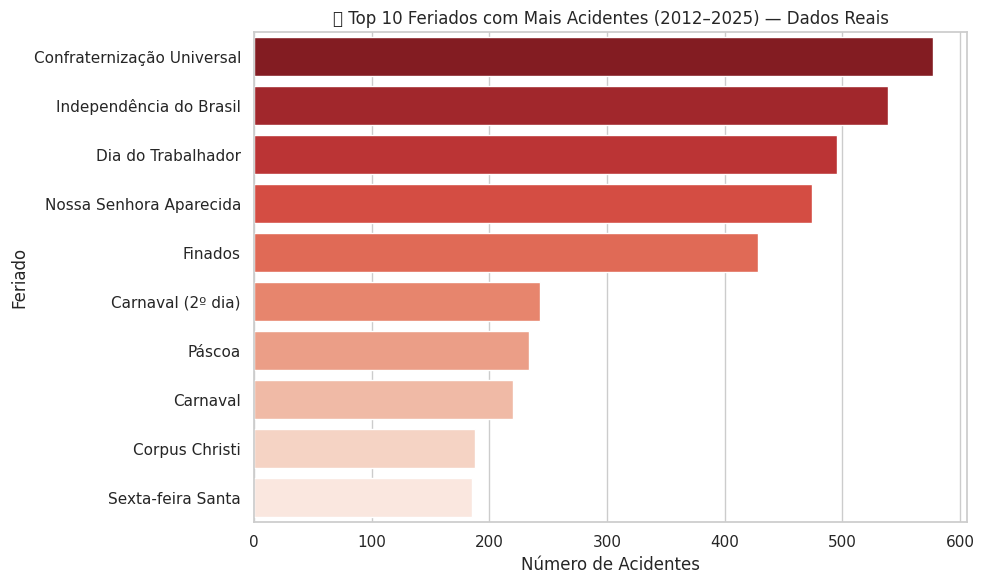

/tmp/ipython-input-4196261400.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4196261400.py:161: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


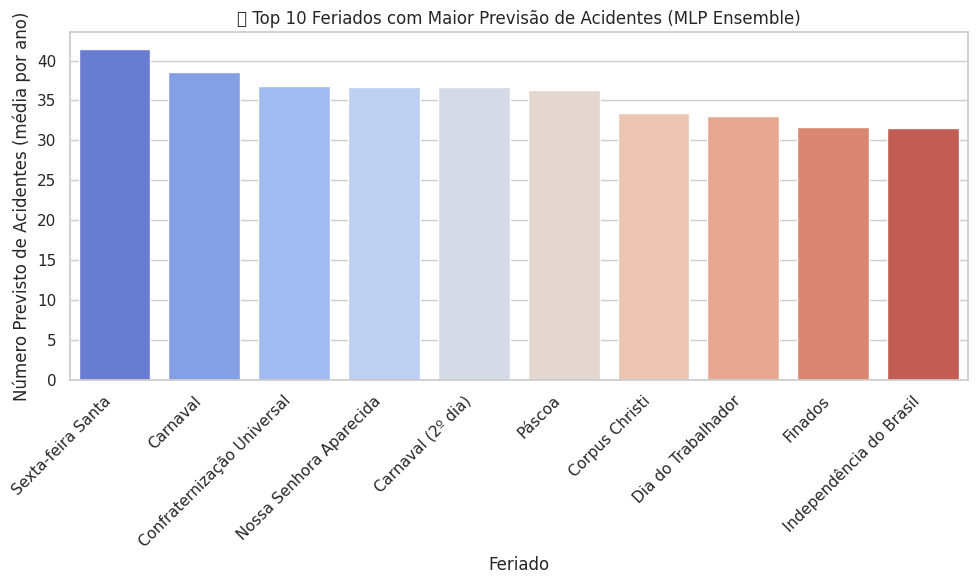


🤖 Feriado com maior previsão de acidentes (MLP Ensemble): Sexta-feira Santa


In [ ]:
# =====================================================
#  Previsão de Acidentes em Feriados — MLP Ensemble

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from datetime import date, timedelta
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")



def pascoa(ano):
    a = ano % 19
    b = ano // 100
    c = ano % 100
    d = b // 4
    e = b % 4
    f = (b + 8) // 25
    g = (b - f + 1) // 3
    h = (19 * a + b - d - g + 15) % 30
    i = c // 4
    k = c % 4
    l = (32 + 2 * e + 2 * i - h - k) % 7
    m = (a + 11 * h + 22 * l) // 451
    mes = (h + l - 7 * m + 114) // 31
    dia = ((h + l - 7 * m + 114) % 31) + 1
    return date(ano, mes, dia)

def gerar_feriados(ano):
    pascoa_dia = pascoa(ano)
    return {
        date(ano, 1, 1): "Confraternização Universal",
        pascoa_dia - timedelta(days=48): "Carnaval",
        pascoa_dia - timedelta(days=47): "Carnaval (2º dia)",
        pascoa_dia - timedelta(days=2): "Sexta-feira Santa",
        pascoa_dia: "Páscoa",
        pascoa_dia + timedelta(days=60): "Corpus Christi",
        date(ano, 4, 21): "Tiradentes",
        date(ano, 5, 1): "Dia do Trabalhador",
        date(ano, 9, 7): "Independência do Brasil",
        date(ano, 10, 12): "Nossa Senhora Aparecida",
        date(ano, 11, 2): "Finados",
        date(ano, 11, 15): "Proclamação da República",
        date(ano, 12, 25): "Natal"
    }


df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
df = df.dropna(subset=['data_inversa']).copy()
df['data'] = df['data_inversa'].dt.date
df['ano'] = df['data_inversa'].dt.year

def identificar_feriado(data):
    data = pd.to_datetime(data).date()
    feriados_ano = gerar_feriados(data.year)
    return feriados_ano.get(data, 'Dia Normal')

df['feriado'] = df['data'].apply(identificar_feriado)
df_feriados = df[df['feriado'] != 'Dia Normal'].copy()


top_feriados = df_feriados['feriado'].value_counts().head(10)
print("\n🔎 Top feriados com mais acidentes (dados reais):")
print(top_feriados)

top_feriados_df = top_feriados.reset_index()
top_feriados_df.columns = ['feriado', 'num_acidentes']

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_feriados_df,
    x='num_acidentes',
    y='feriado',
    palette='Reds_r'
)
plt.title("📊 Top 10 Feriados com Mais Acidentes (2012–2025) — Dados Reais")
plt.xlabel("Número de Acidentes")
plt.ylabel("Feriado")
plt.tight_layout()
plt.show()


df_pred = (
    df_feriados.groupby(['ano', 'feriado'])
    .size()
    .reset_index(name='num_acidentes')
)

df_pred['tipo_pista'] = df_feriados.groupby(['ano', 'feriado'])['tipo_pista'].agg(lambda x: x.mode()[0]).values
df_pred['condicao_metereologica'] = df_feriados.groupby(['ano', 'feriado'])['condicao_metereologica'].agg(lambda x: x.mode()[0]).values
df_pred['tracado_via'] = df_feriados.groupby(['ano', 'feriado'])['tracado_via'].agg(lambda x: x.mode()[0]).values
df_pred['fase_dia'] = df_feriados.groupby(['ano', 'feriado'])['fase_dia'].agg(lambda x: x.mode()[0]).values
df_pred['br'] = df_feriados.groupby(['ano', 'feriado'])['br'].agg(lambda x: x.mode()[0]).values

le = LabelEncoder()
for col in ['tipo_pista', 'condicao_metereologica', 'tracado_via', 'fase_dia', 'br', 'feriado']:
    df_pred[col] = le.fit_transform(df_pred[col].astype(str))

X = df_pred[['ano', 'feriado', 'tipo_pista', 'condicao_metereologica', 'tracado_via', 'fase_dia', 'br']]
y = df_pred['num_acidentes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_s, X_test_s = scaler.fit_transform(X_train), scaler.transform(X_test)


def build_mlp(seed):
    return MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        learning_rate_init=1e-3,
        max_iter=800,
        early_stopping=True,
        validation_fraction=0.15,
        n_iter_no_change=20,
        random_state=seed
    )

n_models = 12
preds = []
for s in range(n_models):
    model = build_mlp(1000 + s)
    Xb, yb = resample(X_train_s, y_train, replace=True, random_state=42 + s)
    model.fit(Xb, yb)
    preds.append(model.predict(scaler.transform(X)))

preds = np.vstack(preds)
df_pred['num_acidentes_previstos'] = preds.mean(axis=0)
df_pred['low'] = np.percentile(preds, 10, axis=0)
df_pred['high'] = np.percentile(preds, 90, axis=0)


prev_feriados = (
    df_pred.groupby('feriado')['num_acidentes_previstos']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

feriado_labels = dict(enumerate(le.classes_))
prev_feriados['feriado_nome'] = prev_feriados['feriado'].map(feriado_labels)

plt.figure(figsize=(10,6))
sns.barplot(
    data=prev_feriados.head(10),
    x='feriado_nome',
    y='num_acidentes_previstos',
    palette='coolwarm'
)
plt.title("🔮 Top 10 Feriados com Maior Previsão de Acidentes (MLP Ensemble)")
plt.xlabel("Feriado")
plt.ylabel("Número Previsto de Acidentes (média por ano)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


feriado_pred_num = prev_feriados.iloc[0]['feriado']
feriado_pred_nome = le.classes_[int(feriado_pred_num)]

print(f"\n🤖 Feriado com maior previsão de acidentes (MLP Ensemble): {feriado_pred_nome}")

  #### **4.2.7 - Projeção mensal de acidentes(2026 a 2030)**

Dataset carregado: 184236 linhas, 31 colunas.
Treino MLP Ensemble -> MAE: 114.270 | R²: 0.926


/tmp/ipython-input-1215397125.py:130: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


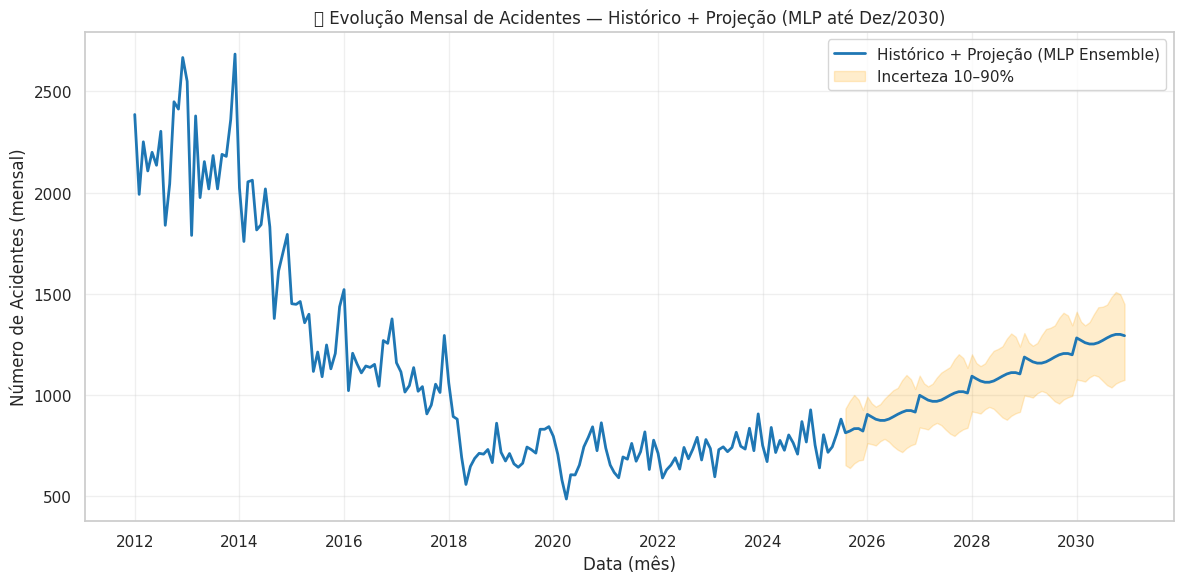


Observações:
- Mantida a linha contínua (histórico e projeção unificados).
- A incerteza é derivada da dispersão entre as 15 redes MLP do ensemble (10–90%).
- Hipótese: crescimento da frota de 2.50%/ano.
- O modelo captura padrão sazonal via sin/cos e tendência temporal do histórico.


In [ ]:
# =====================================================
# Projeção mensal de acidentes — MLP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


df = pd.read_csv('/content/drive/MyDrive/Dataset/datatran2012a2025(datatran2012a2025).csv',
                 delimiter=';', encoding='latin-1', low_memory=False)

print(f"Dataset carregado: {df.shape[0]} linhas, {df.shape[1]} colunas.")


df['data_inversa'] = pd.to_datetime(df['data_inversa'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['data_inversa']).copy()
df['data_mes'] = df['data_inversa'].values.astype('datetime64[M]')

acidentes_mensais = (
    df.groupby('data_mes').size().reset_index(name='qtd_acidentes')
      .sort_values('data_mes')
      .reset_index(drop=True)
)


periodo_full = pd.date_range(start=acidentes_mensais['data_mes'].min(),
                             end=acidentes_mensais['data_mes'].max(),
                             freq='MS')
acidentes_mensais = (
    acidentes_mensais.set_index('data_mes')
                     .reindex(periodo_full)
                     .fillna(0)
                     .rename_axis('data_mes')
                     .reset_index()
)
acidentes_mensais['qtd_acidentes'] = acidentes_mensais['qtd_acidentes'].astype(int)


acidentes_mensais['ano'] = acidentes_mensais['data_mes'].dt.year
acidentes_mensais['mes'] = acidentes_mensais['data_mes'].dt.month
acidentes_mensais['mes_sin'] = np.sin(2 * np.pi * acidentes_mensais['mes'] / 12)
acidentes_mensais['mes_cos'] = np.cos(2 * np.pi * acidentes_mensais['mes'] / 12)


ano_min = acidentes_mensais['ano'].min()
growth_rate = 0.025
acidentes_mensais['frota_indice'] = 1 + growth_rate * (acidentes_mensais['ano'] - ano_min)

feature_cols = ['ano', 'mes_sin', 'mes_cos', 'frota_indice']
X_hist = acidentes_mensais[feature_cols]
y_hist = acidentes_mensais['qtd_acidentes']


scaler = StandardScaler()
X_hist_s = scaler.fit_transform(X_hist)

def build_mlp(seed):
    return MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        learning_rate_init=1e-3,
        max_iter=800,
        early_stopping=True,
        n_iter_no_change=20,
        validation_fraction=0.1,
        random_state=seed
    )

n_ensemble = 15
mlps, preds_train = [], []

for s in range(n_ensemble):
    Xb, yb = resample(X_hist_s, y_hist, replace=True, random_state=42 + s)
    model = build_mlp(1000 + s)
    model.fit(Xb, yb)
    mlps.append(model)
    preds_train.append(model.predict(X_hist_s))

preds_train = np.vstack(preds_train)
y_pred_mean = preds_train.mean(axis=0)
mae = np.mean(np.abs(y_hist - y_pred_mean))
r2 = 1 - np.sum((y_hist - y_pred_mean)**2) / np.sum((y_hist - np.mean(y_hist))**2)
print(f"Treino MLP Ensemble -> MAE: {mae:.3f} | R²: {r2:.3f}")


start_proj = acidentes_mensais['data_mes'].max() + pd.offsets.MonthBegin(1)
end_proj = pd.Timestamp('2030-12-01')
future_dates = pd.date_range(start=start_proj, end=end_proj, freq='MS')

df_future = pd.DataFrame({'data_mes': future_dates})
df_future['ano'] = df_future['data_mes'].dt.year
df_future['mes'] = df_future['data_mes'].dt.month
df_future['mes_sin'] = np.sin(2 * np.pi * df_future['mes'] / 12)
df_future['mes_cos'] = np.cos(2 * np.pi * df_future['mes'] / 12)
df_future['frota_indice'] = 1 + growth_rate * (df_future['ano'] - ano_min)

X_future_s = scaler.transform(df_future[feature_cols])
preds_future = np.vstack([m.predict(X_future_s) for m in mlps])
pred_mean = preds_future.mean(axis=0)
lower = np.percentile(preds_future, 10, axis=0)
upper = np.percentile(preds_future, 90, axis=0)

df_future['qtd_prevista'] = pred_mean
df_future['qtd_lower'] = lower
df_future['qtd_upper'] = upper


all_df = pd.concat([
    acidentes_mensais[['data_mes', 'qtd_acidentes']].rename(columns={'qtd_acidentes': 'qtd_fim'}),
    df_future[['data_mes', 'qtd_prevista']].rename(columns={'qtd_prevista': 'qtd_fim'})
], ignore_index=True)


plt.figure(figsize=(12,6))
plt.plot(all_df['data_mes'], all_df['qtd_fim'], color='tab:blue', linewidth=2, label='Histórico + Projeção (MLP Ensemble)')
plt.fill_between(df_future['data_mes'], df_future['qtd_lower'], df_future['qtd_upper'],
                 color='orange', alpha=0.2, label='Incerteza 10–90%')

plt.title('📈 Evolução Mensal de Acidentes — Histórico + Projeção (MLP até Dez/2030)')
plt.xlabel('Data (mês)')
plt.ylabel('Número de Acidentes (mensal)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


print("\nObservações:")
print("- Mantida a linha contínua (histórico e projeção unificados).")
print("- A incerteza é derivada da dispersão entre as 15 redes MLP do ensemble (10–90%).")
print(f"- Hipótese: crescimento da frota de {growth_rate*100:.2f}%/ano.")
print("- O modelo captura padrão sazonal via sin/cos e tendência temporal do histórico.")

## 4.3 - Ccomparação do desempenho entre os modelos

## Comparação Crítica dos Modelos (Random Forest × MLP × XGBoost)  
**Métrica principal considerada na classificação: F1-Score**

A análise comparativa entre os três modelos — **Random Forest**, **Rede Neural MLP** e **XGBoost** — evidencia diferenças importantes tanto em desempenho quanto em características estruturais de cada algoritmo. A seguir, apresentamos uma avaliação crítica considerando exclusivamente o **F1-Score**, métrica escolhida por equilibrar precisamente *precisão* e *recall*, especialmente útil em cenários com classes desbalanceadas.

---

## 1. Random Forest (RF)

**F1-Score obtido:** 0.53  
Desempenho mais fraco entre os três modelos, servindo como baseline para comparação.

**Vantagens**
- Alta robustez e estabilidade.
- Interpretação mais simples (importância de variáveis).
- Treinamento mais rápido que MLP e XGBoost.

**Limitações**
- Menor capacidade de generalização diante de padrões complexos.
- Sofre mais com classes desbalanceadas.
- Tendência a underfitting quando comparado aos demais modelos.

**Quando é melhor**
> Quando se precisa de um modelo rápido, estável e com boa interpretabilidade inicial.

---

## 2. Rede Neural MLP

**F1-Score obtido:** 0.87  
Mostrou desempenho **muito competitivo**, quase empatando com o XGBoost na classificação.  

Na tarefa de regressão (Gravidade), o MLP foi **o melhor**, apresentando o menor erro (MAE = 0.78).

**Vantagens**
- Excelente capacidade de modelar relações não lineares.
- Alta adaptabilidade a diferentes tipos de dados.
- Melhor desempenho geral na regressão.

**Limitações**
- Forte dependência de pré-processamento (normalização).
- Necessidade de tuning cuidadoso (épocas, camadas, neurônios).
- Menor interpretabilidade que árvores.

**Quando é melhor**
> Quando há tempo para ajuste fino e os dados estão bem normalizados.

---

## 3. XGBoost

**F1-Score obtido:** **0.88 (melhor resultado)**  
Foi o modelo com **maior acurácia na classificação**, superando MLP e RF.  
Também apresentou bom desempenho na regressão, com R² competitivo.

**Vantagens**
- Melhor desempenho geral em dados tabulares.
- Ótimo tratamento de desbalanceamento.
- Forte regularização e grande capacidade de generalização.
- Captura relações complexas com rapidez.

**Limitações**
- Tuning extenso, com muitos hiperparâmetros.
- Menor interpretabilidade que Random Forest.

**Quando é melhor**
> Quando se busca **o melhor desempenho em classificação**, com excelente equilíbrio entre precisão e recall.

---

# 📌 Conclusão Geral

| Modelo | F1-Score | Robustez | Complexidade | Necessidade de Tuning | Observação |
|-------|----------|-----------|---------------|------------------------|------------|
| **Random Forest** | 0.53 | Alta | Média | Baixa | Baseline estável, mas desempenho inferior. |
| **MLP** | 0.87 | Média | Alta | Alta | Destaque na regressão e ótimo desempenho na classificação. |
| **XGBoost** | **0.88 (melhor)** | Alta | Média–Alta | Média–Alta | Melhor modelo na classificação (F1-Score). |

### ✔ Modelo recomendado (Classificação): **XGBoost**  
Confirmado pelos resultados do slide: **melhor F1-Score (0.88)**.

### ✔ Modelo recomendado (Regressão): **MLP**  
Apresentou **menor MAE (0.78)** e estabilidade superior.

